In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
import datetime
%matplotlib inline
from matplotlib.pylab import rcParams

In [38]:
# test= pd.read_csv('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_01_Aug_2019.csv')
test=pd.read_csv('E:/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')

In [39]:
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M')
    str_time.append(convert_time)
# print(str_time)
test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added

C:\Users\atif\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [40]:
# It will print the type of value of each column
long_time = test_new.correct_longtime
print(type(long_time))
string_time = test_new.stringTime
print(type(string_time))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [41]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')
# test_new['dateTime_column'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [42]:
# making dateTime column as a index for the test_new panda dataframe
# test_new = test_new.set_index('dateTime')

In [43]:
test_new.head()

row ID       longTime  AEAGHOAWE2T1  AEAGHOAWE2A0  AEAGHOAWE2T0  \
0   Row0  1555311120000     74.451979     19.111606     98.371549   
1   Row1  1555311060000     73.933103     18.088026     98.186038   
2   Row2  1555311000000     73.471742     25.843589     98.371549   
3   Row3  1555310940000     73.010381     27.772137     98.371549   
4   Row4  1555310880000     72.549020     18.402556     98.186038   

   AEAGHOAWE1A0  AEAGHOAWE1T1  AEAGHOAWE1T0  AEAGHOAWE3T0  AEAGHOAWE3A0  ...  \
0     18.819155     93.337524     69.969526     95.445534      7.802471  ...   
1     18.943335     92.869960     69.969526     95.445534     12.856953  ...   
2     33.166077     92.343799     69.969526     95.628479     21.591973  ...   
3     35.991205     91.876236     69.850105     95.607810     19.492370  ...   
4     19.591687     91.408672     69.969526     95.607810      8.014898  ...   

   RWWIHOT9_RV0  RWWIHOT10RV0  RWWIHOTSURV0  RWWIHOTSUMV0  RWWIHO_VERV0  \
0     22.338103     75.685755     73.945394      0.000000      0.000000   
1     26.967692     75.685755     66.649583     56.385432     68.734584   
2     26.851837     75.685755     66.587330     56.402658     68.853203   
3     26.266369     75.685755     66.373907     56.527297     69.391059   
4     26.605640     75.685755     66.529224     56.640964     69.299560   

   RWWIHO_UESV0  RWWIHOSUMAV0        stringTime  correct_longtime  \
0      0.000000      0.000000  2019-04-15 08:52        1555311120   
1      9.127668      2.275890  2019-04-15 08:51        1555311060   
2      9.136596      2.275735  2019-04-15 08:50        1555311000   
3      9.138625      2.281882  2019-04-15 08:49        1555310940   
4      9.121256      2.269317  2019-04-15 08:48        1555310880   

             dateTime  
0 2019-04-15 08:52:00  
1 2019-04-15 08:51:00  
2 2019-04-15 08:50:00  
3 2019-04-15 08:49:00  
4 2019-04-15 08:48:00  

[5 rows x 4223 columns]

In [133]:
# multivariate_column_label=['DEWIHOBT9_I0','AEDATZ_HO_V0','AEDAHO_T9_V2','AEWIHO_T9AV2','RWWIHOB_HWT0'
#                            ,'RWWIHOB_MWT0']#rmse error 1.99

# multivariate_column_label = ['DEWIHOBT9_I0','AEDATZ_HONP0','AEDATZK_ASP0','AEDATZ_HO_V0',
#                              'AEDAHO_T9_V2','AEWIHO_T9AV2'] #rmse error 1.38

#RWDAKRWRS8V0
# 'AEDAHO_T8_V2','AEWIHO_T8AV2',
multivariate_column_label = ['dateTime_column','DEWIHOBT9_I0','AEDATZ_HONP0','AEDATZK_ASP0','AEDATZ_HO_V0',
                             'AEDATZ_TZCP2','AEDATZKA_8P0','AEDATZ_HO_P1','AEDAHO_T9_V2',
                             'RWWIHOB_HWT0','RWWIHOB_MWT0','AEWIHO_T9AV2'] #rmse error 1.94
size_column = len(multivariate_column_label)
print(size_column)

print(type(multivariate_column_label))

12
<class 'list'>


In [209]:
size_column = len(multivariate_column_label)
print(size_column)

12


In [44]:
# multivariate_data=test_new.iloc[0:25000][multivariate_column_label]
multivariate_data=test_new.iloc[0:25000][:]
multivariate_data=multivariate_data.loc[::-1]
multivariate_data.head()

row ID       longTime  AEAGHOAWE2T1  AEAGHOAWE2A0  AEAGHOAWE2T0  \
24999  Row24999  1552270440000     72.030143     21.542766     94.083085   
24998  Row24998  1552270500000     72.491504     26.431470     94.083085   
24997  Row24997  1552270560000     72.952865     16.340439     94.083085   
24996  Row24996  1552270620000     73.414226     25.111296     94.247637   
24995  Row24995  1552270680000     73.875587     26.183628     94.247637   

       AEAGHOAWE1A0  AEAGHOAWE1T1  AEAGHOAWE1T0  AEAGHOAWE3T0  AEAGHOAWE3A0  \
24999     22.656925     82.875638     67.650387     95.811415     11.299942   
24998     27.250685     82.875638     67.530966     95.648382     15.316148   
24997      9.402699     83.810765     67.501116     95.648382      7.900882   
24996     20.460754     84.336621     67.501116     95.648382      8.682349   
24995     26.243646     84.862783     67.635740     95.486096     16.656556   

       ...  RWWIHOT9_RV0  RWWIHOT10RV0  RWWIHOTSURV0  RWWIHOTSUMV0  \
24999  ...     28.127074     82.825607     78.104338     67.050713   
24998  ...     30.234661     82.718776     78.744878     67.904313   
24997  ...     33.680038     82.812397     79.820670     69.482925   
24996  ...     36.388113     82.644399     80.584952     69.763910   
24995  ...     35.372044     82.999752     80.398505     69.927938   

       RWWIHO_VERV0  RWWIHO_UESV0  RWWIHOSUMAV0        stringTime  \
24999     75.017129      0.385938      5.503583  2019-03-11 03:14   
24998     74.995147      0.391870      5.464381  2019-03-11 03:15   
24997     75.118191      0.391758      5.461172  2019-03-11 03:16   
24996     74.112424      0.396539      5.446945  2019-03-11 03:17   
24995     74.680827      0.390438      5.434438  2019-03-11 03:18   

       correct_longtime            dateTime  
24999        1552270440 2019-03-11 03:14:00  
24998        1552270500 2019-03-11 03:15:00  
24997        1552270560 2019-03-11 03:16:00  
24996        1552270620 2019-03-11 03:17:00  
24995        1552270680 2019-03-11 03:18:00  

[5 rows x 4223 columns]

In [57]:
# function for changing column order. pass dataframe, column name, which order you want to set for the column
def change_column_order(df, col_name, index):
    cols = df.columns.tolist()
    cols.remove(col_name)
    cols.insert(index, col_name)
    return df[cols]

multivariate_data_1 = change_column_order(multivariate_data,'AEWIHO_T9AV2',-1)
multivariate_data_2 = change_column_order(multivariate_data_1,'dateTime',0)

In [74]:
multivariate_data_drop = multivariate_data_2.drop([multivariate_data_2.columns[1],multivariate_data_2.columns[2],
                                                  multivariate_data_2.columns[-3],multivariate_data_2.columns[-2]], axis=1)

In [75]:
multivariate_data_drop.columns.get_loc("AEWIHO_T9AV2")

4218

In [77]:
multivariate_data_drop.columns[-1]

'AEWIHO_T9AV2'

In [120]:
multivariate_data_drop.tail()

dateTime  AEAGHOAWE2T1  AEAGHOAWE2A0  AEAGHOAWE2T0  AEAGHOAWE1A0  \
4 2019-04-15 08:48:00     72.549020     18.402556     98.186038     19.591687   
3 2019-04-15 08:49:00     73.010381     27.772137     98.371549     35.991205   
2 2019-04-15 08:50:00     73.471742     25.843589     98.371549     33.166077   
1 2019-04-15 08:51:00     73.933103     18.088026     98.186038     18.943335   
0 2019-04-15 08:52:00     74.451979     19.111606     98.371549     18.819155   

   AEAGHOAWE1T1  AEAGHOAWE1T0  AEAGHOAWE3T0  AEAGHOAWE3A0  AEAGHOAWE3T1  ...  \
4     91.408672     69.969526     95.607810      8.014898     58.697162  ...   
3     91.876236     69.850105     95.607810     19.492370     58.231774  ...   
2     92.343799     69.969526     95.628479     21.591973     58.231774  ...   
1     92.869960     69.969526     95.445534     12.856953     58.231774  ...   
0     93.337524     69.969526     95.445534      7.802471     57.766387  ...   

   RWWIHOT7_RV0  RWWIHOT8_RV0  RWWIHOT9_RV0  RWWIHOT10RV0  RWWIHOTSURV0  \
4     82.078296     53.172932     26.605640     75.685755     66.529224   
3     82.074011     53.015226     26.266369     75.685755     66.373907   
2     82.098144     53.029243     26.851837     75.685755     66.587330   
1     82.082055     53.182296     26.967692     75.685755     66.649583   
0     92.632593     44.620461     22.338103     75.685755     73.945394   

   RWWIHOTSUMV0  RWWIHO_VERV0  RWWIHO_UESV0  RWWIHOSUMAV0  AEWIHO_T9AV2  
4     56.640964     69.299560      9.121256      2.269317     78.780987  
3     56.527297     69.391059      9.138625      2.281882     78.450988  
2     56.402658     68.853203      9.136596      2.275735     78.361331  
1     56.385432     68.734584      9.127668      2.275890     78.222914  
0      0.000000      0.000000      0.000000      0.000000     78.101485  

[5 rows x 4219 columns]

In [121]:
multivariate_data_drop.loc[4]['AEAGHOAWE2T1']

72.54901960784316

In [79]:
multivariate_data_drop_dummy = multivariate_data_drop.set_index('dateTime')

In [117]:
multivariate_data_drop_dummy.head()

AEAGHOAWE2T1  AEAGHOAWE2A0  AEAGHOAWE2T0  AEAGHOAWE1A0  \
dateTime                                                                      
2019-03-11 03:14:00     72.030143     21.542766     94.083085     22.656925   
2019-03-11 03:15:00     72.491504     26.431470     94.083085     27.250685   
2019-03-11 03:16:00     72.952865     16.340439     94.083085      9.402699   
2019-03-11 03:17:00     73.414226     25.111296     94.247637     20.460754   
2019-03-11 03:18:00     73.875587     26.183628     94.247637     26.243646   

                     AEAGHOAWE1T1  AEAGHOAWE1T0  AEAGHOAWE3T0  AEAGHOAWE3A0  \
dateTime                                                                      
2019-03-11 03:14:00     82.875638     67.650387     95.811415     11.299942   
2019-03-11 03:15:00     82.875638     67.530966     95.648382     15.316148   
2019-03-11 03:16:00     83.810765     67.501116     95.648382      7.900882   
2019-03-11 03:17:00     84.336621     67.501116     95.648382      8.682349   
2019-03-11 03:18:00     84.862783     67.635740     95.486096     16.656556   

                     AEAGHOAWE3T1  AEAGHOAWE_A2  ...  RWWIHOT7_RV0  \
dateTime                                         ...                 
2019-03-11 03:14:00     60.849423    100.000000  ...     92.507129   
2019-03-11 03:15:00     60.849423     83.088535  ...     92.521725   
2019-03-11 03:16:00     60.384036     95.667996  ...     92.484799   
2019-03-11 03:17:00     60.384036     93.447307  ...     92.458005   
2019-03-11 03:18:00     60.384036     76.483634  ...     92.467179   

                     RWWIHOT8_RV0  RWWIHOT9_RV0  RWWIHOT10RV0  RWWIHOTSURV0  \
dateTime                                                                      
2019-03-11 03:14:00     44.620461     28.127074     82.825607     78.104338   
2019-03-11 03:15:00     44.620461     30.234661     82.718776     78.744878   
2019-03-11 03:16:00     44.620461     33.680038     82.812397     79.820670   
2019-03-11 03:17:00     44.620461     36.388113     82.644399     80.584952   
2019-03-11 03:18:00     44.620461     35.372044     82.999752     80.398505   

                     RWWIHOTSUMV0  RWWIHO_VERV0  RWWIHO_UESV0  RWWIHOSUMAV0  \
dateTime                                                                      
2019-03-11 03:14:00     67.050713     75.017129      0.385938      5.503583   
2019-03-11 03:15:00     67.904313     74.995147      0.391870      5.464381   
2019-03-11 03:16:00     69.482925     75.118191      0.391758      5.461172   
2019-03-11 03:17:00     69.763910     74.112424      0.396539      5.446945   
2019-03-11 03:18:00     69.927938     74.680827      0.390438      5.434438   

                     AEWIHO_T9AV2  
dateTime                           
2019-03-11 03:14:00     79.178306  
2019-03-11 03:15:00     81.659117  
2019-03-11 03:16:00     86.055430  
2019-03-11 03:17:00     87.113691  
2019-03-11 03:18:00     87.266264  

[5 rows x 4218 columns]

In [22]:
s.describe()

index      longTime  AEAGHOAWE2T1  AEAGHOAWE2A0  AEAGHOAWE2T0  \
count  25000.000000  2.500000e+04  25000.000000  25000.000000  25000.000000   
mean   12499.500000  1.553850e+12     67.997017     39.220029     92.377774   
std     7217.022701  7.671002e+08     11.155713     24.345055      4.061982   
min        0.000000  1.552270e+12      0.000000      0.000000      0.000000   
25%     6249.750000  1.553162e+12     58.592849     24.717624     91.381940   
50%    12499.500000  1.553958e+12     66.378161     30.763339     93.382181   
75%    18749.250000  1.554548e+12     77.105115     43.301196     94.887219   
max    24999.000000  1.555311e+12     98.673437    100.000000     98.680473   

       AEAGHOAWE1A0  AEAGHOAWE1T1  AEAGHOAWE1T0  AEAGHOAWE3T0  AEAGHOAWE3A0  \
count  25000.000000  25000.000000  25000.000000  25000.000000  25000.000000   
mean      30.507388     67.523724     67.557330     93.647461     33.591015   
std       25.233048     10.944442      1.945268      2.406731     24.559369   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       14.020559     59.205390     66.617847     92.496994     19.068867   
50%       25.821511     65.809568     67.889793     94.001884     26.066020   
75%       36.430580     75.862184     68.847415     95.180680     37.001789   
max      100.000000     95.324365     71.795206     99.328693    100.000000   

       ...  RWWIHOT7_RV0  RWWIHOT8_RV0  RWWIHOT9_RV0  RWWIHOT10RV0  \
count  ...  25000.000000  25000.000000  25000.000000  25000.000000   
mean   ...     90.622270     44.640703     23.647830     81.761030   
std    ...      4.593038      0.488247      6.020131      8.255352   
min    ...     62.620189     44.620461     12.174842      0.562594   
25%    ...     92.101215     44.620461     20.274344     81.496470   
50%    ...     92.266687     44.620461     22.001885     82.512603   
75%    ...     92.462271     44.620461     25.165596     83.997554   
max    ...     94.657578     58.231383     75.229529     97.116596   

       RWWIHOTSURV0  RWWIHOTSUMV0  RWWIHO_VERV0  RWWIHO_UESV0  RWWIHOSUMAV0  \
count  25000.000000  25000.000000  25000.000000  25000.000000  25000.000000   
mean      74.340406     63.073523     67.103055      2.099314     14.393304   
std        4.929393      7.831953     10.475470      4.126466      8.649518   
min       39.906474      0.000000      0.000000      0.000000      0.000000   
25%       74.836632     63.232061     63.091848      0.409632      9.101939   
50%       75.765867     65.003555     70.188421      0.427084     11.213391   
75%       76.983722     66.831828     73.148945      0.472741     21.310091   
max       82.457785     74.124841     82.076624     24.143982     80.343808   

       correct_longtime  
count      2.500000e+04  
mean       1.553851e+09  
std        7.677494e+05  
min        1.552270e+09  
25%        1.553163e+09  
50%        1.553958e+09  
75%        1.554548e+09  
max        1.555980e+09  

[8 rows x 4221 columns]

In [211]:
multivariate_data["a"] = pd.to_datetime(multivariate_data["dateTime_column"])

In [212]:
# checking column type
s = multivariate_data['dateTime_column'].dtype
print(s)

datetime64[ns]


In [213]:
# multivariate_data["a"] = pd.to_datetime(multivariate_data["dateTime_column"])
tr = multivariate_data.drop(multivariate_data.columns[-1], axis=1)

In [214]:
tr['Date'] = multivariate_data['dateTime_column'].dt.strftime('%d/%m/%Y')
tr['Time'] = multivariate_data['dateTime_column'].dt.strftime('%H:%M:%S')

date_type = tr['Date'].dtype
time_type = tr['Time'].dtype
print('date_type: ', date_type)
print('time_type: ',time_type)

date_type:  object
time_type:  object


In [183]:
# converting previously created date and time column to datetime type
tr['Date'] = pd.to_datetime(tr['Date'])
tr['Time'] = pd.to_datetime(tr['Time'])

date_type = tr['Date'].dtype
time_type = tr['Time'].dtype

print("to observe the difference look in the previous cell's output")
print('date_type: ', date_type)
print('time_type: ',time_type)

to observe the difference look in the previous cell's output
date_type:  datetime64[ns]
time_type:  datetime64[ns]


In [215]:
e1 = tr['Date'].dtype
print(type(e1))

<class 'numpy.dtype'>


In [216]:
# it will return a column with weekday name
tr['Weekday_name'] = tr.index.weekday_name

In [217]:
# It will return a column with number associated with DAY. like monday =0, Tuesday=1 and so on
tr['weekday'] = multivariate_data['dateTime_column'].apply(lambda x: x.weekday())

In [218]:
tr['TypeofDAY'] = np.where(multivariate_data['dateTime_column'].dt.dayofweek < 5, 'Weekday', 'weekend') # if the associated number less than 5 then weekend, otherwise weekday
tr['TypeofDAY_number'] = np.where(multivariate_data['dateTime_column'].dt.dayofweek < 5, 1, 0) # 1 for weekday, 0 for weekend

In [219]:
# make all the time(without date) to numeric value
tr['numric_time'] = pd.to_timedelta(tr['Time']).dt.total_seconds()

In [220]:
tr.head()

dateTime_column  DEWIHOBT9_I0  AEDATZ_HONP0  \
dateTime                                                              
2019-03-11 03:14:00 2019-03-11 03:14:00         100.0     97.304518   
2019-03-11 03:15:00 2019-03-11 03:15:00         100.0     96.950979   
2019-03-11 03:16:00 2019-03-11 03:16:00         100.0     96.722113   
2019-03-11 03:17:00 2019-03-11 03:17:00         100.0     96.671992   
2019-03-11 03:18:00 2019-03-11 03:18:00         100.0     96.717532   

                     AEDATZK_ASP0  AEDATZ_HO_V0  AEDATZ_TZCP2  AEDATZKA_8P0  \
dateTime                                                                      
2019-03-11 03:14:00     97.482960     46.119388     98.275765     92.911299   
2019-03-11 03:15:00     97.167113     46.534541     97.658591     92.709599   
2019-03-11 03:16:00     96.937628     46.555631     95.779320     92.519508   
2019-03-11 03:17:00     96.868238     45.940449     96.898266     92.876853   
2019-03-11 03:18:00     96.901785     44.218947     97.680386     92.997927   

                     AEDATZ_HO_P1  AEDAHO_T9_V2  RWWIHOB_HWT0  RWWIHOB_MWT0  \
dateTime                                                                      
2019-03-11 03:14:00     97.357811     83.327361     94.076290     96.594824   
2019-03-11 03:15:00     97.563494     84.314814     94.003521     96.529931   
2019-03-11 03:16:00     97.431268     84.380943     93.851567     96.404936   
2019-03-11 03:17:00     97.252133     83.279853     93.727603     96.295169   
2019-03-11 03:18:00     97.289250     79.963124     93.643636     96.264723   

                     AEWIHO_T9AV2        Date      Time Weekday_name  weekday  \
dateTime                                                                        
2019-03-11 03:14:00     79.178306  11/03/2019  03:14:00       Monday        0   
2019-03-11 03:15:00     81.659117  11/03/2019  03:15:00       Monday        0   
2019-03-11 03:16:00     86.055430  11/03/2019  03:16:00       Monday        0   
2019-03-11 03:17:00     87.113691  11/03/2019  03:17:00       Monday        0   
2019-03-11 03:18:00     87.266264  11/03/2019  03:18:00       Monday        0   

                    TypeofDAY  TypeofDAY_number  numric_time  
dateTime                                                      
2019-03-11 03:14:00   Weekday                 1      11640.0  
2019-03-11 03:15:00   Weekday                 1      11700.0  
2019-03-11 03:16:00   Weekday                 1      11760.0  
2019-03-11 03:17:00   Weekday                 1      11820.0  
2019-03-11 03:18:00   Weekday                 1      11880.0

In [221]:
tr.columns

Index(['dateTime_column', 'DEWIHOBT9_I0', 'AEDATZ_HONP0', 'AEDATZK_ASP0',
       'AEDATZ_HO_V0', 'AEDATZ_TZCP2', 'AEDATZKA_8P0', 'AEDATZ_HO_P1',
       'AEDAHO_T9_V2', 'RWWIHOB_HWT0', 'RWWIHOB_MWT0', 'AEWIHO_T9AV2', 'Date',
       'Time', 'Weekday_name', 'weekday', 'TypeofDAY', 'TypeofDAY_number',
       'numric_time'],
      dtype='object')

In [228]:
pr_1.head()

DEWIHOBT9_I0  AEDATZ_HONP0  AEDATZK_ASP0  AEDATZ_HO_V0  \
dateTime                                                                      
2019-03-11 03:14:00         100.0     97.304518     97.482960     46.119388   
2019-03-11 03:15:00         100.0     96.950979     97.167113     46.534541   
2019-03-11 03:16:00         100.0     96.722113     96.937628     46.555631   
2019-03-11 03:17:00         100.0     96.671992     96.868238     45.940449   
2019-03-11 03:18:00         100.0     96.717532     96.901785     44.218947   

                     AEDATZ_TZCP2  AEDATZKA_8P0  AEDATZ_HO_P1  AEDAHO_T9_V2  \
dateTime                                                                      
2019-03-11 03:14:00     98.275765     92.911299     97.357811     83.327361   
2019-03-11 03:15:00     97.658591     92.709599     97.563494     84.314814   
2019-03-11 03:16:00     95.779320     92.519508     97.431268     84.380943   
2019-03-11 03:17:00     96.898266     92.876853     97.252133     83.279853   
2019-03-11 03:18:00     97.680386     92.997927     97.289250     79.963124   

                     RWWIHOB_HWT0  RWWIHOB_MWT0  AEWIHO_T9AV2        Date  \
dateTime                                                                    
2019-03-11 03:14:00     94.076290     96.594824     79.178306  11/03/2019   
2019-03-11 03:15:00     94.003521     96.529931     81.659117  11/03/2019   
2019-03-11 03:16:00     93.851567     96.404936     86.055430  11/03/2019   
2019-03-11 03:17:00     93.727603     96.295169     87.113691  11/03/2019   
2019-03-11 03:18:00     93.643636     96.264723     87.266264  11/03/2019   

                         Time Weekday_name  weekday TypeofDAY  \
dateTime                                                        
2019-03-11 03:14:00  03:14:00       Monday        0   Weekday   
2019-03-11 03:15:00  03:15:00       Monday        0   Weekday   
2019-03-11 03:16:00  03:16:00       Monday        0   Weekday   
2019-03-11 03:17:00  03:17:00       Monday        0   Weekday   
2019-03-11 03:18:00  03:18:00       Monday        0   Weekday   

                     TypeofDAY_number  numric_time  
dateTime                                            
2019-03-11 03:14:00                 1      11640.0  
2019-03-11 03:15:00                 1      11700.0  
2019-03-11 03:16:00                 1      11760.0  
2019-03-11 03:17:00                 1      11820.0  
2019-03-11 03:18:00                 1      11880.0

In [322]:
my_array=[]
count = 0

for index_2, value_2 in tr.iterrows():
    for i_2 , v_2 in enumerate(value_2):
        if i_2 == 12 and v_2 != 0.0:
#             print(v_2)
            v_2_split = v_2.split('/')
            if v_2_split[0] == '11' and v_2_split[1]=='03' :
                my_array = np.append(my_array,index_2)
#                 print(v_2)
#                 print(count)
            
                count+=1
# print('-------',count)
print(len(my_array))

1192


In [323]:
tr_33 = tr.reset_index()

In [324]:
df2 = pd.DataFrame()
for idx , v_2 in enumerate(tr_33['Date']):
#     print(idx)
    if v_2 != 0.0:
        v_2_split = v_2.split('/')
        if v_2_split[0] == '11' and v_2_split[1]=='03':
            required_dataframe = pd.DataFrame(tr_33.iloc[idx:(idx+1),:], columns=tr_33.columns)
            df2 = pd.concat([df2, required_dataframe], axis=0)

In [326]:
df2.head()

dateTime     dateTime_column  DEWIHOBT9_I0  AEDATZ_HONP0  \
0 2019-03-11 03:14:00 2019-03-11 03:14:00         100.0     97.304518   
1 2019-03-11 03:15:00 2019-03-11 03:15:00         100.0     96.950979   
2 2019-03-11 03:16:00 2019-03-11 03:16:00         100.0     96.722113   
3 2019-03-11 03:17:00 2019-03-11 03:17:00         100.0     96.671992   
4 2019-03-11 03:18:00 2019-03-11 03:18:00         100.0     96.717532   

   AEDATZK_ASP0  AEDATZ_HO_V0  AEDATZ_TZCP2  AEDATZKA_8P0  AEDATZ_HO_P1  \
0     97.482960     46.119388     98.275765     92.911299     97.357811   
1     97.167113     46.534541     97.658591     92.709599     97.563494   
2     96.937628     46.555631     95.779320     92.519508     97.431268   
3     96.868238     45.940449     96.898266     92.876853     97.252133   
4     96.901785     44.218947     97.680386     92.997927     97.289250   

   AEDAHO_T9_V2  RWWIHOB_HWT0  RWWIHOB_MWT0  AEWIHO_T9AV2        Date  \
0     83.327361     94.076290     96.594824     79.178306  11/03/2019   
1     84.314814     94.003521     96.529931     81.659117  11/03/2019   
2     84.380943     93.851567     96.404936     86.055430  11/03/2019   
3     83.279853     93.727603     96.295169     87.113691  11/03/2019   
4     79.963124     93.643636     96.264723     87.266264  11/03/2019   

       Time Weekday_name  weekday TypeofDAY  TypeofDAY_number  numric_time  
0  03:14:00       Monday        0   Weekday                 1      11640.0  
1  03:15:00       Monday        0   Weekday                 1      11700.0  
2  03:16:00       Monday        0   Weekday                 1      11760.0  
3  03:17:00       Monday        0   Weekday                 1      11820.0  
4  03:18:00       Monday        0   Weekday                 1      11880.0

In [368]:
vvv = tr.groupby('TypeofDAY')
vvv.head(1)

tr['AEWIHO_T9AV2'].describe()

count    25000.000000
mean        76.649783
std          6.730645
min          0.000000
25%         75.026425
50%         76.773468
75%         78.349692
max         99.037058
Name: AEWIHO_T9AV2, dtype: float64

In [ ]:
dict_of_day_type = {k:v for k,v in tr.groupby('TypeofDAY')}
# plt.ioff()
key_value = collections.OrderedDict(dict_of_day_type)

for k_1 in key_value:
    print(k_1)
    my_week = dict_of_day_type[k_1]
    my_week.iloc[:].plot(y=['AEWIHO_T9AV2'])
    describe = my_week['AEWIHO_T9AV2'].describe()
    RMSE = 2
    textstr = 'describe=%.2f\nRMSE=%.2f\n'%(1, 2)
    plt.text(0.5, 0.5, textstr, fontsize=14)
    plt.savefig(path_1+str(k_1)+'_'+'.jpg')
#     plt.close()

C:\Users\atif\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=737152.6666666666, right=737152.6666666666
  'left=%s, right=%s') % (left, right))
C:\Users\atif\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=737153.3611111111, right=737153.3611111111
  'left=%s, right=%s') % (left, right))
C:\Users\atif\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=737162.3888888889, right=737162.3888888889
  'left=%s, right=%s') % (left, right))
C:\Users\atif\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatic

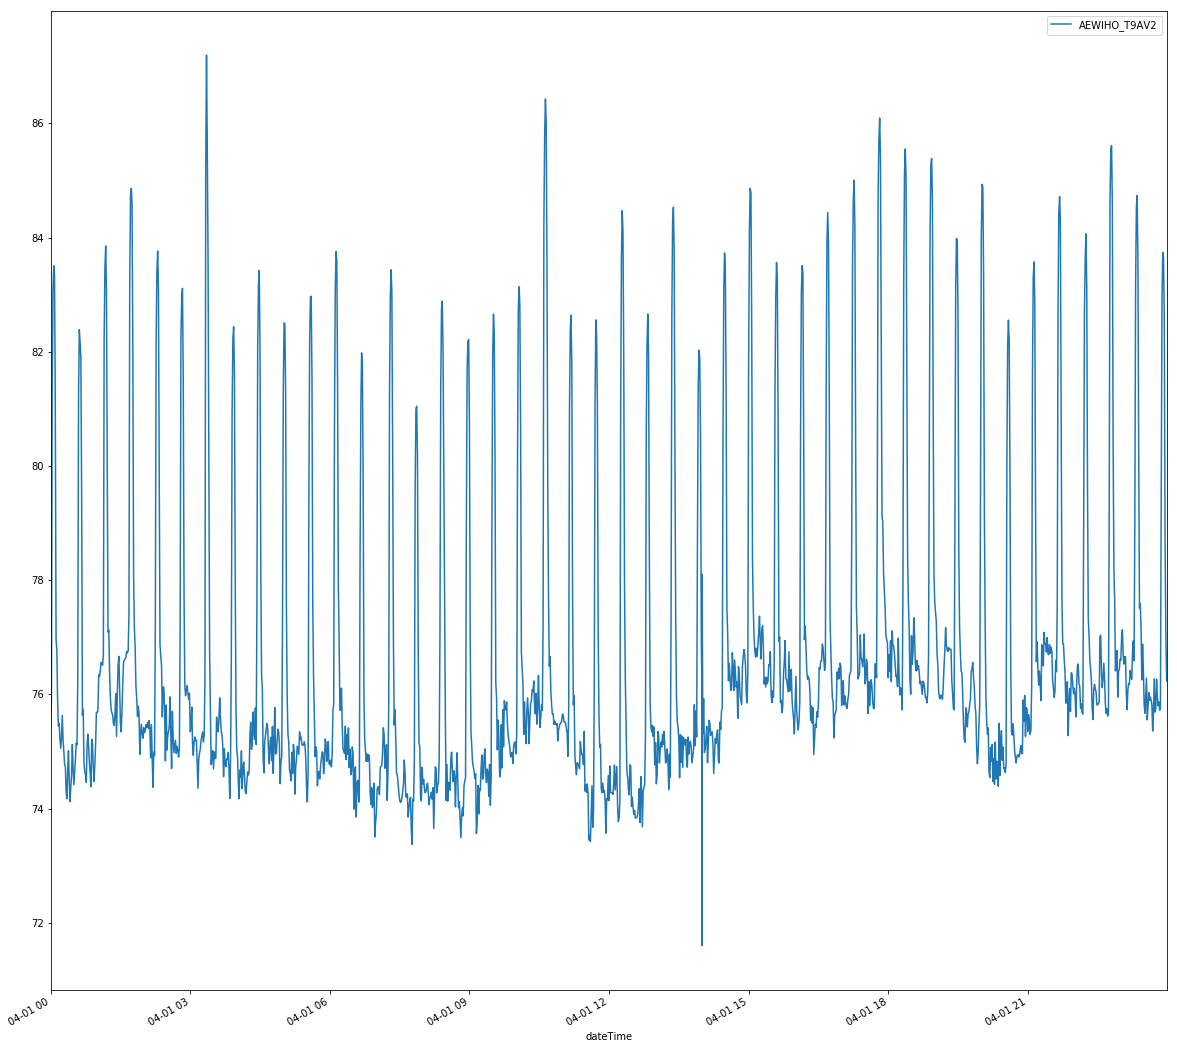

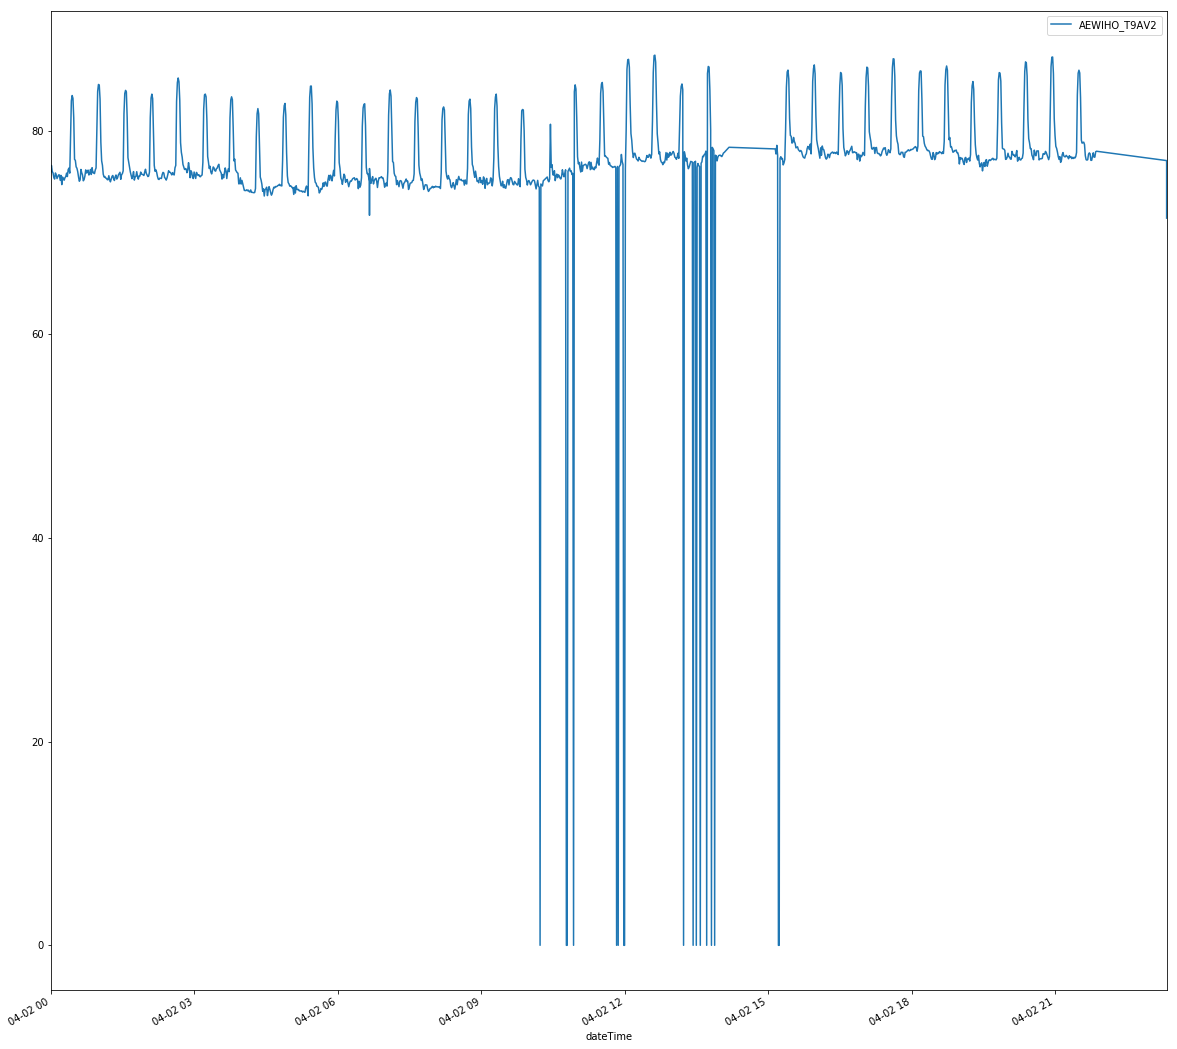

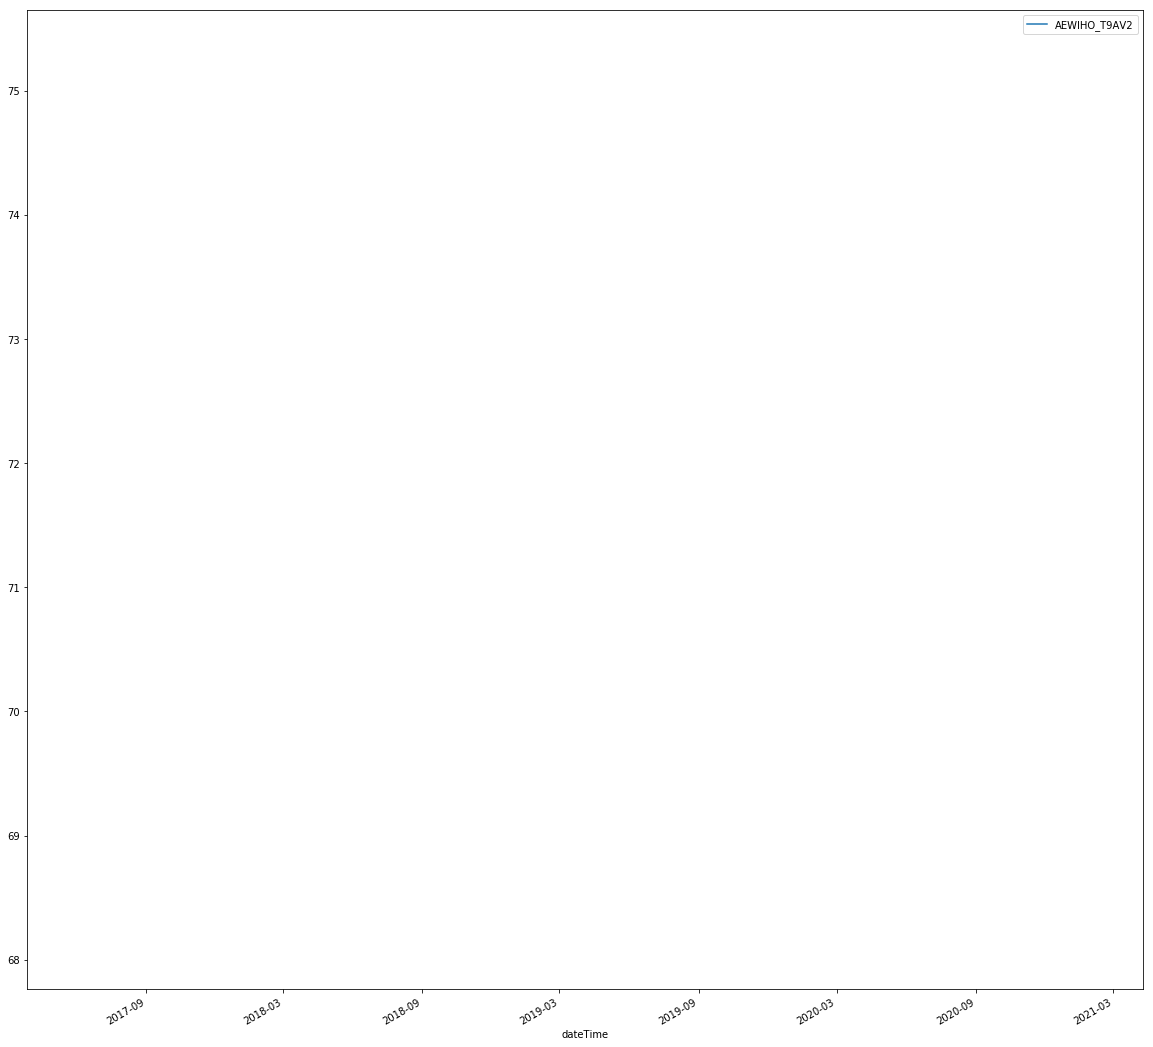

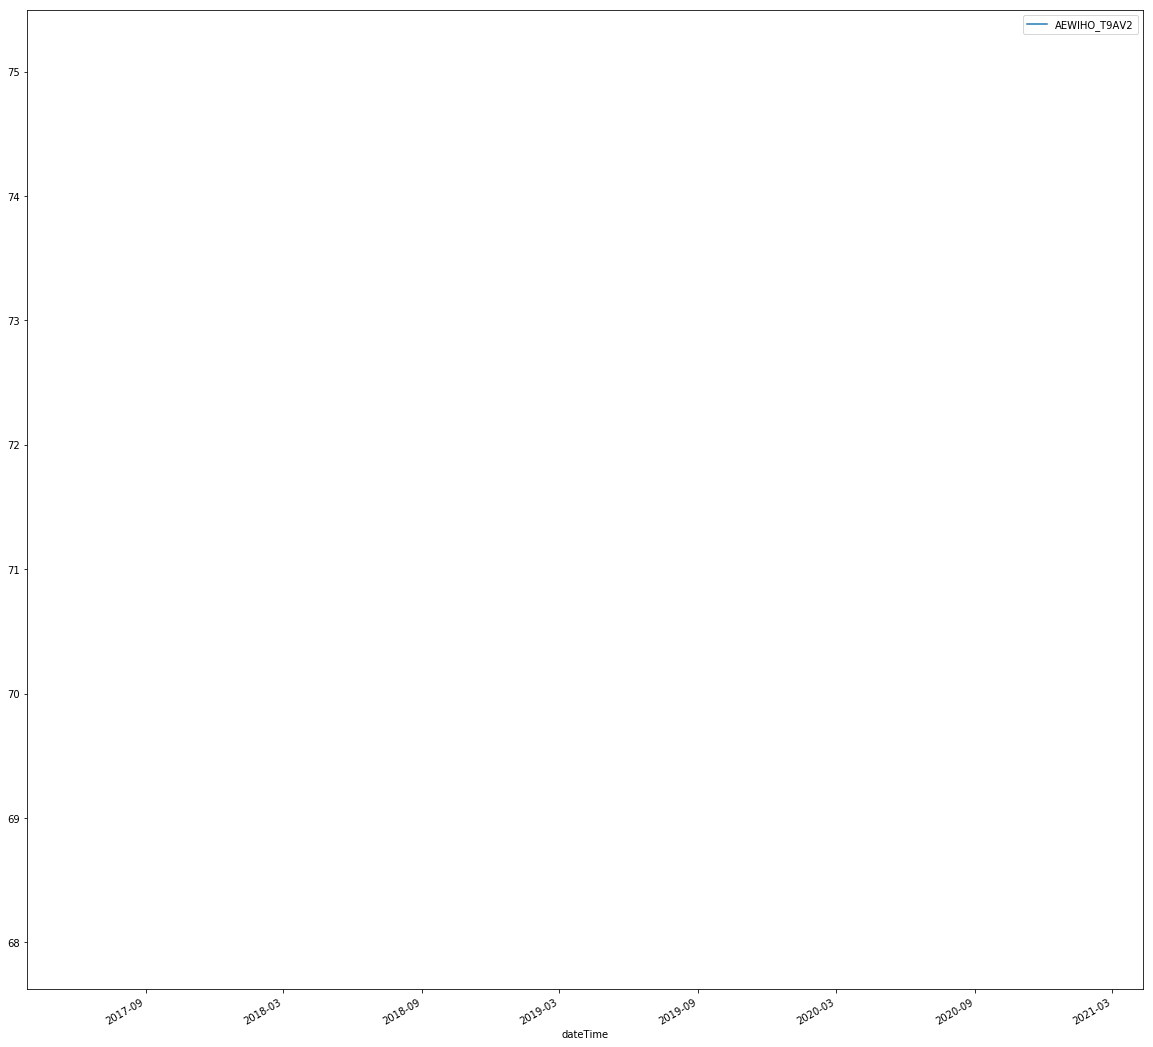

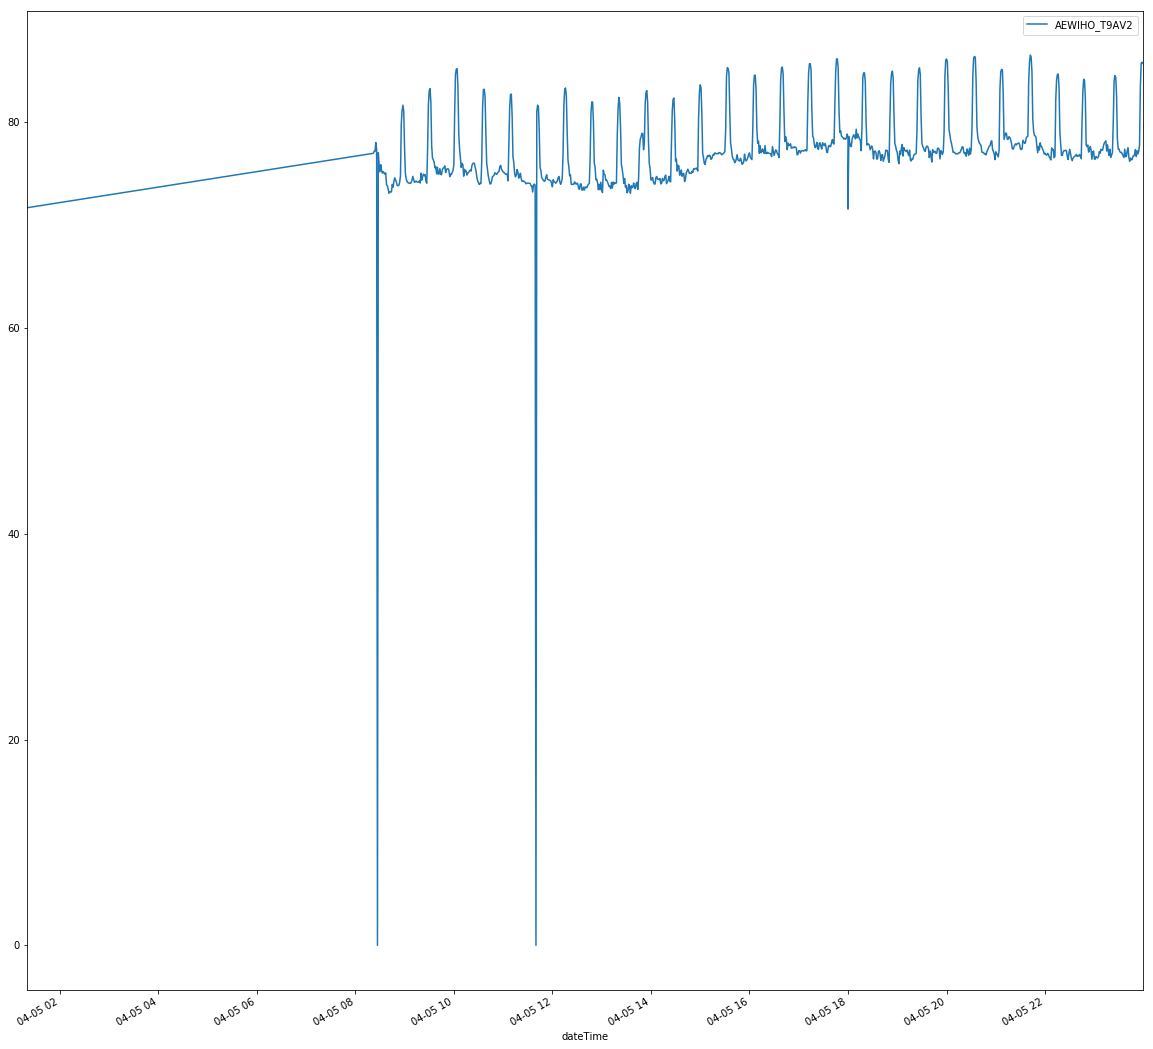

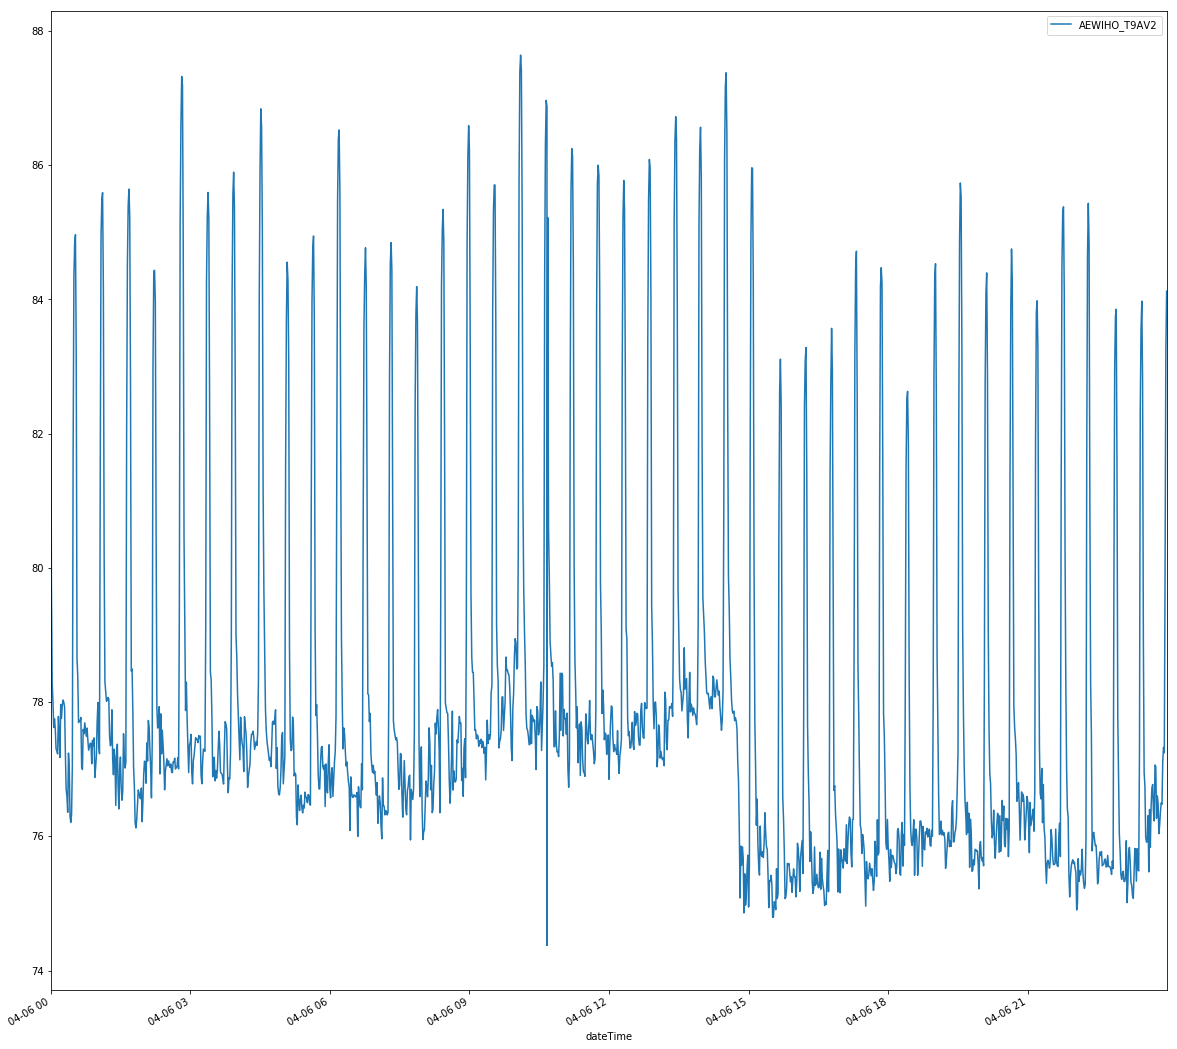

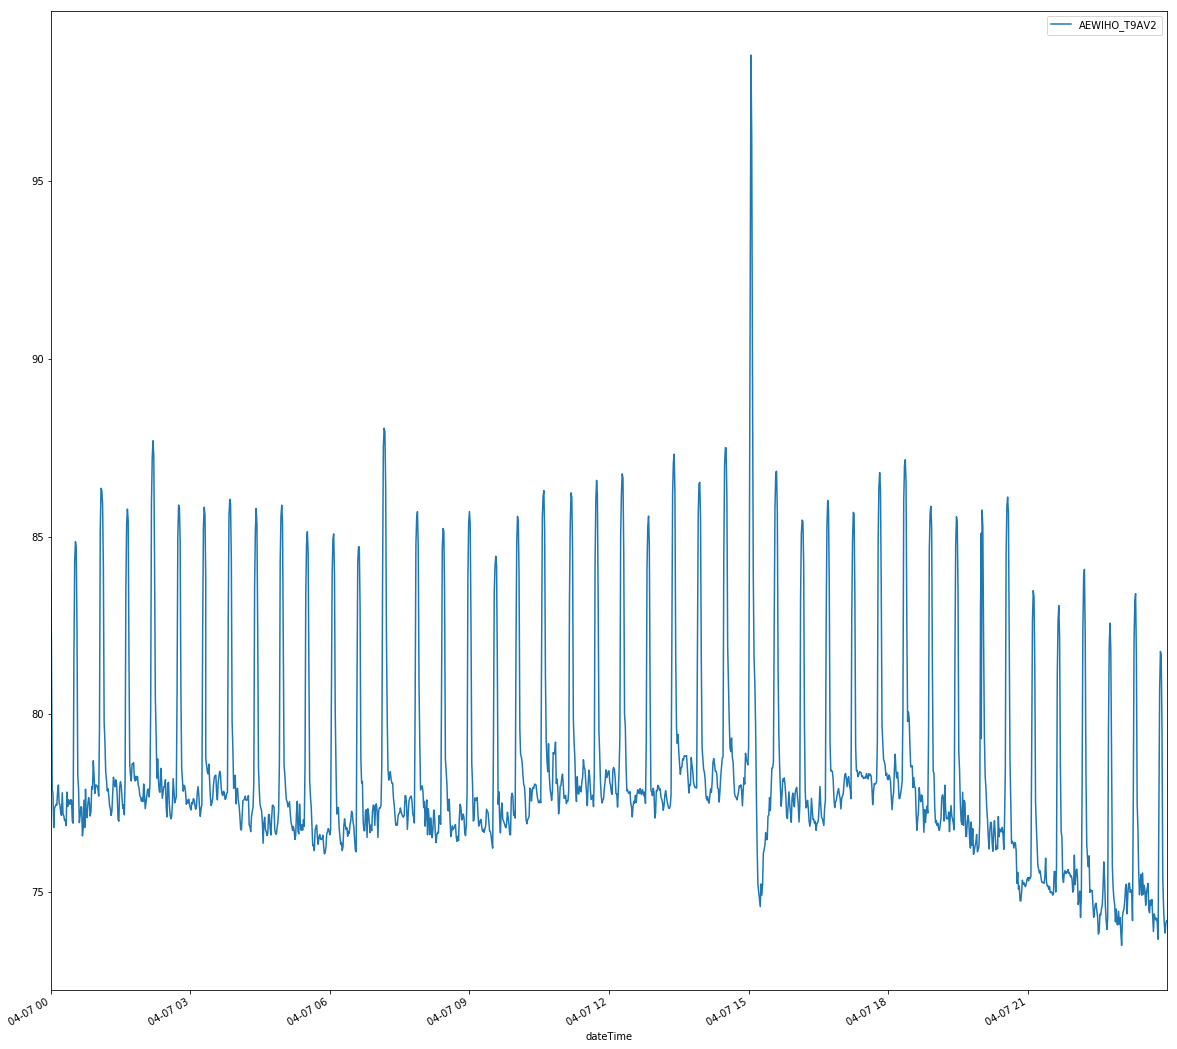

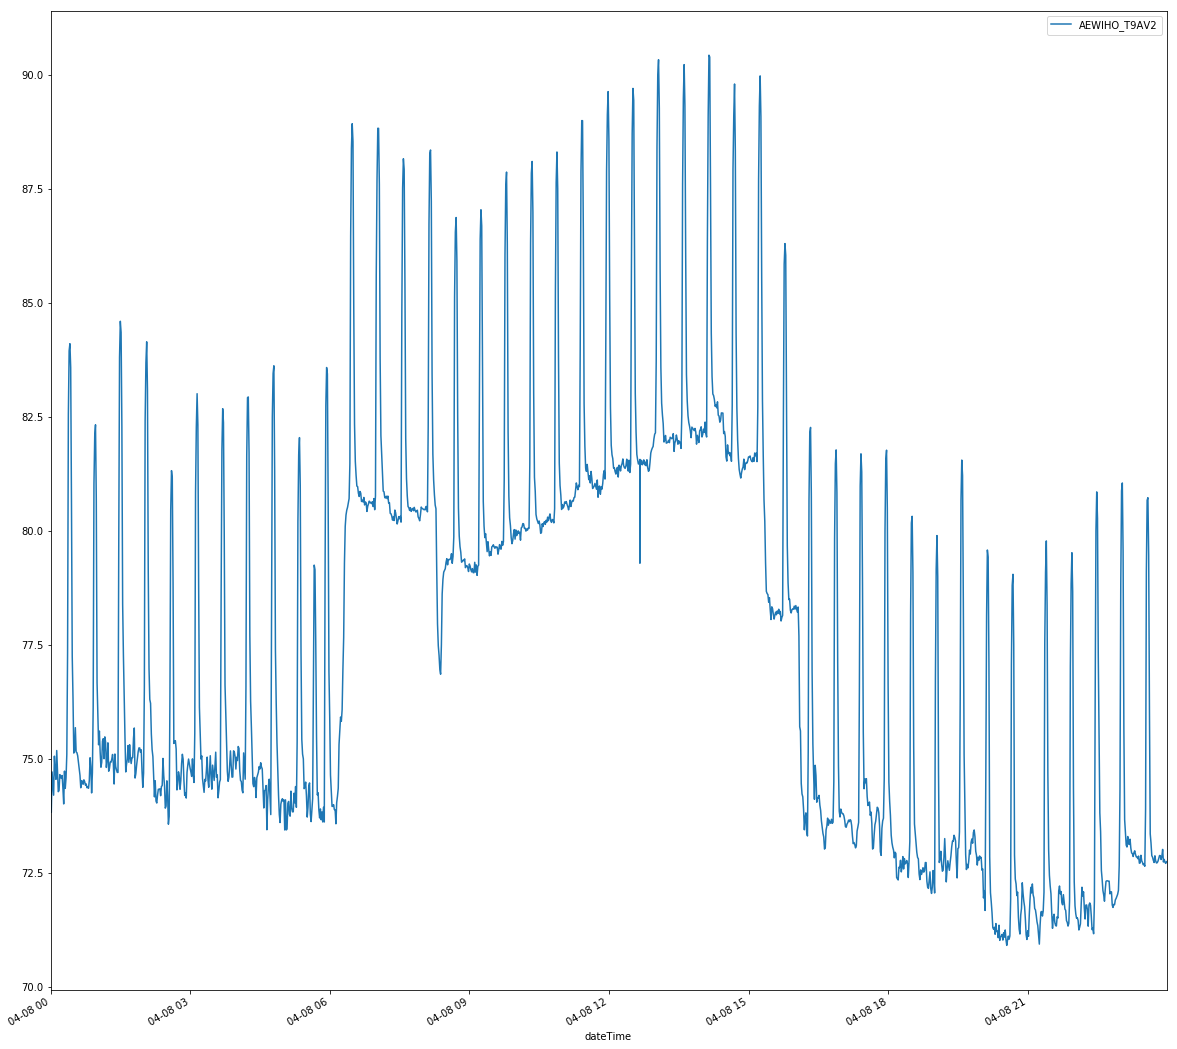

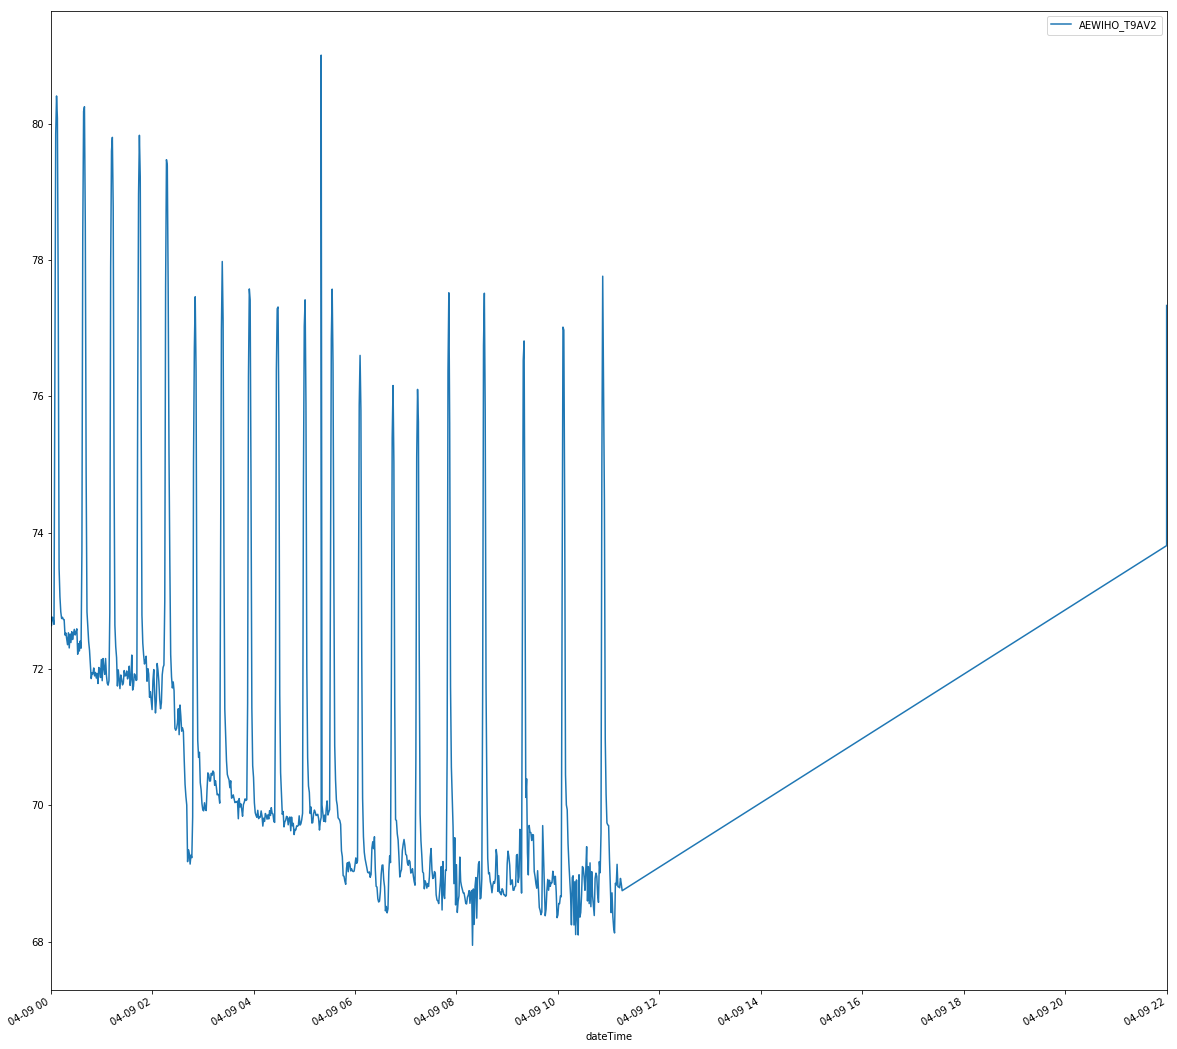

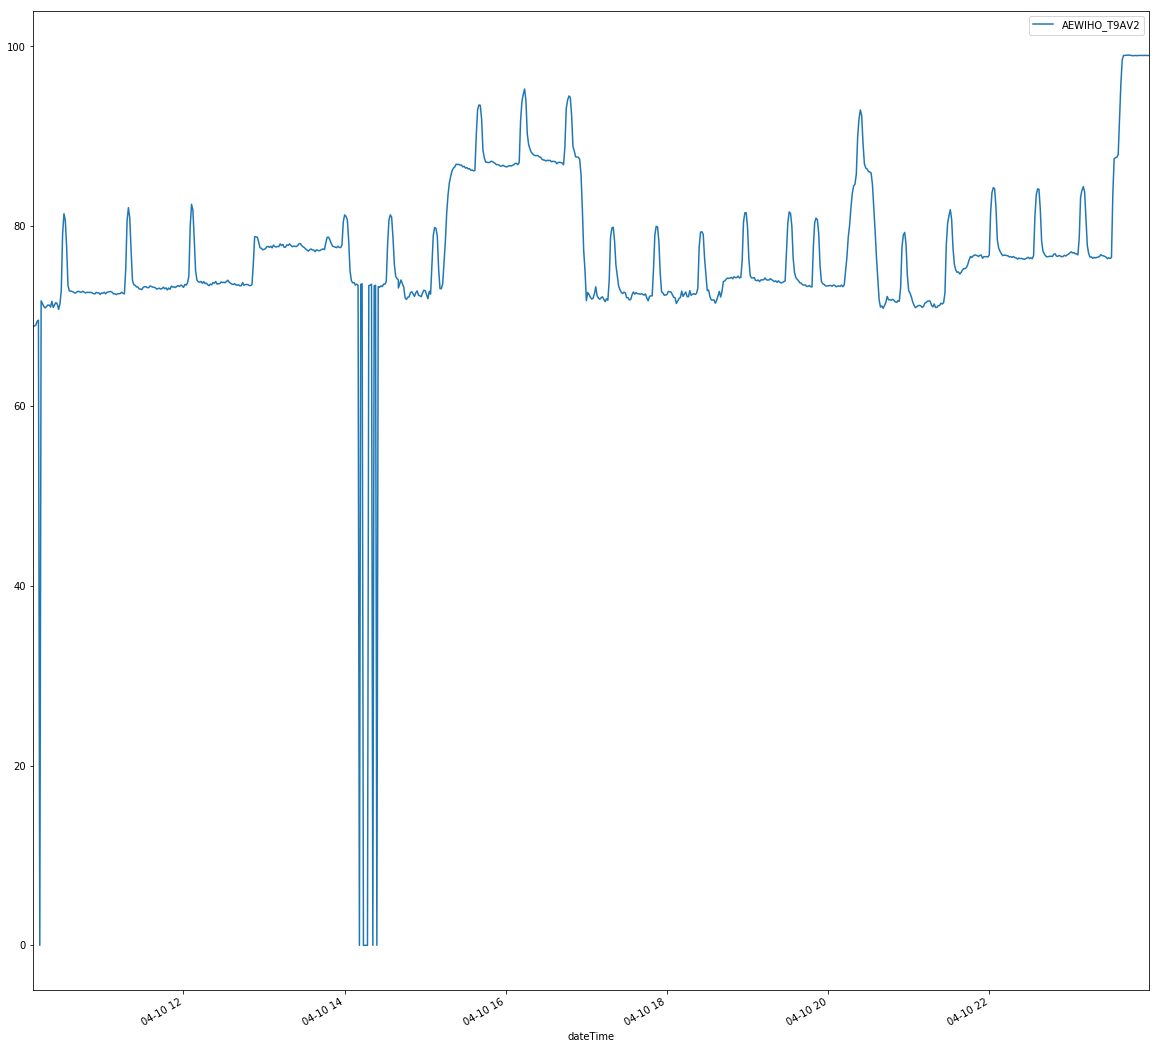

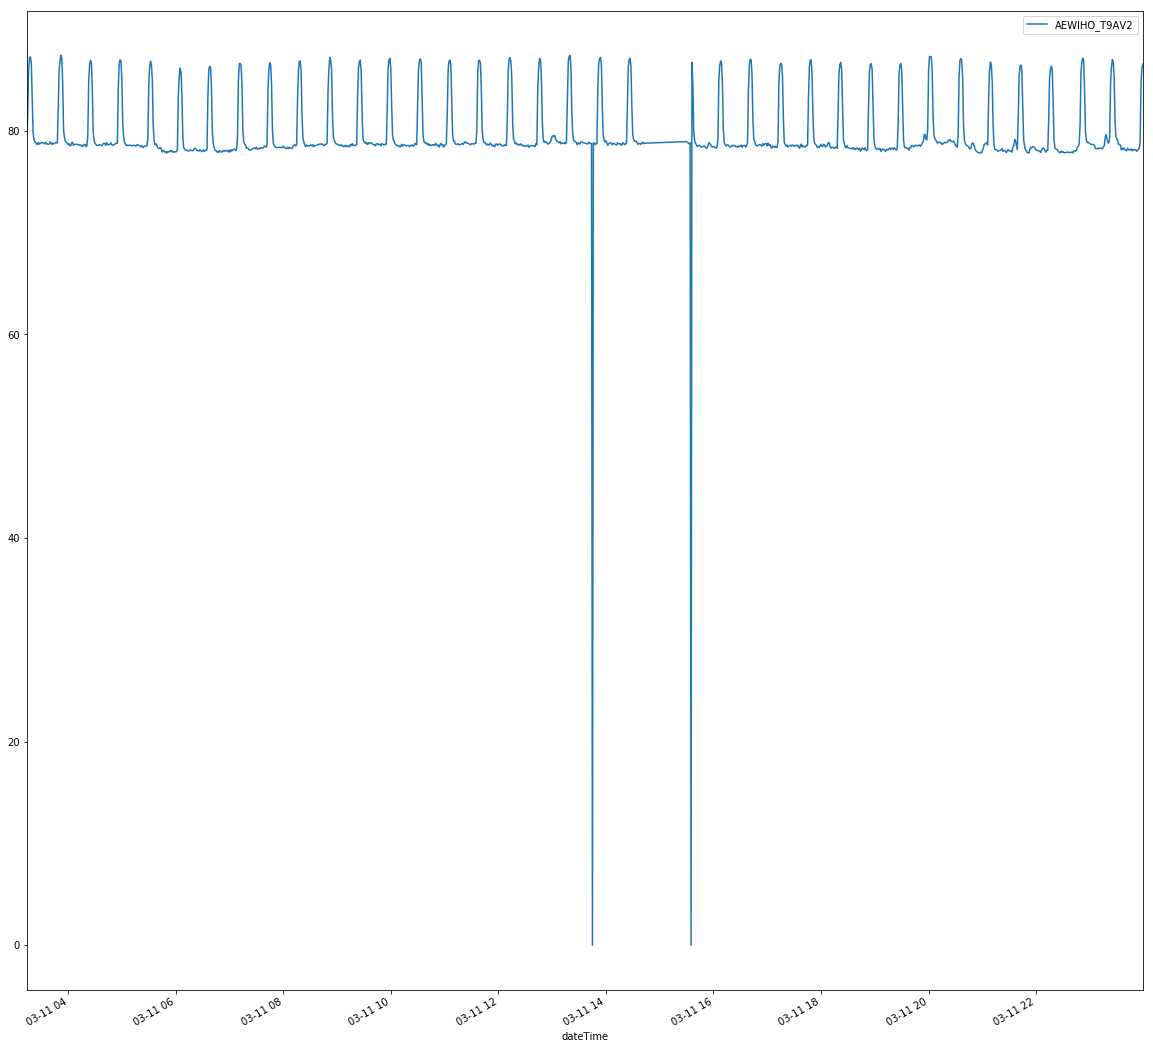

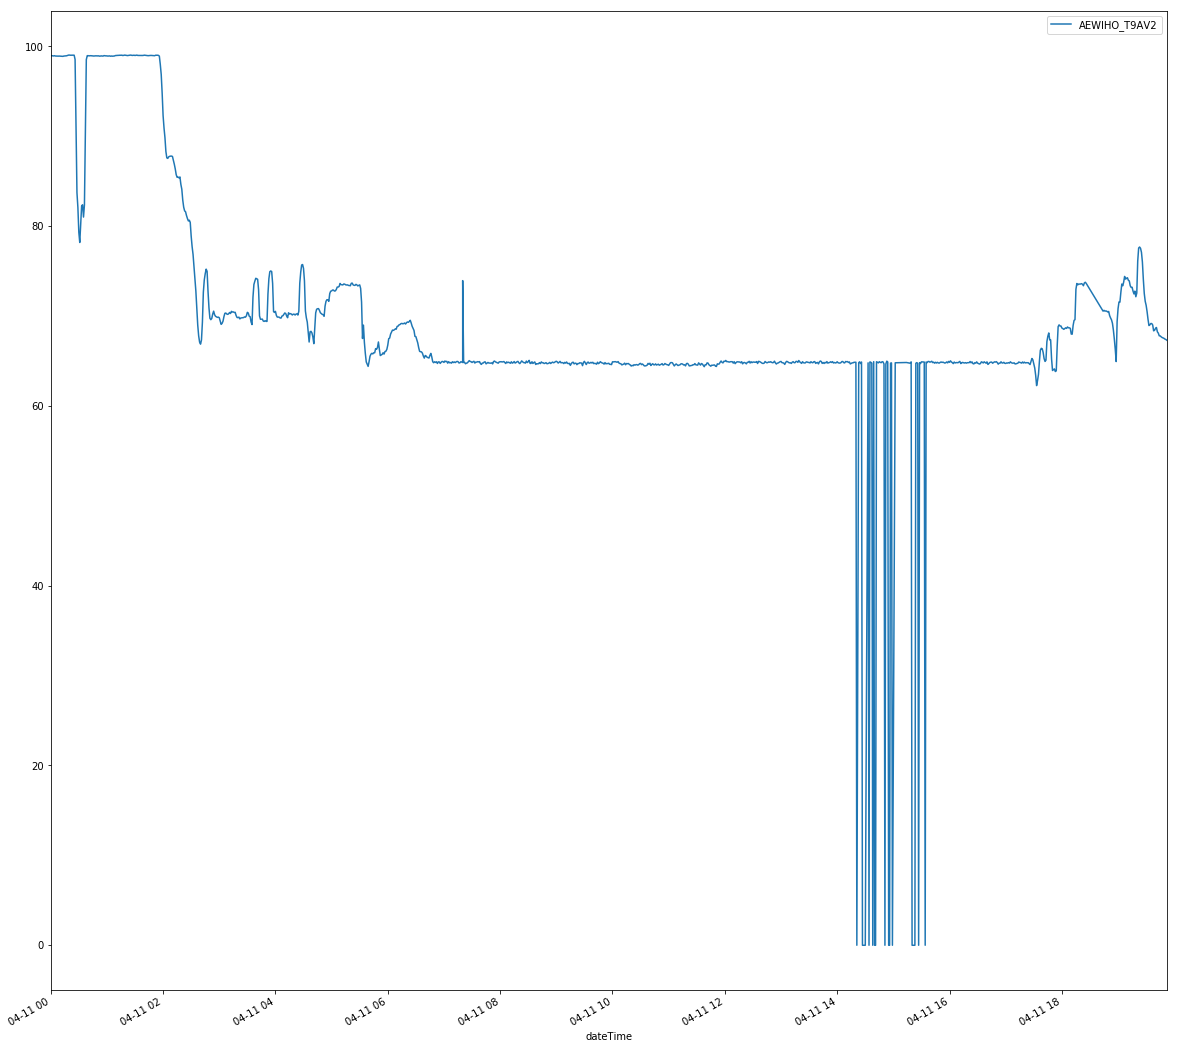

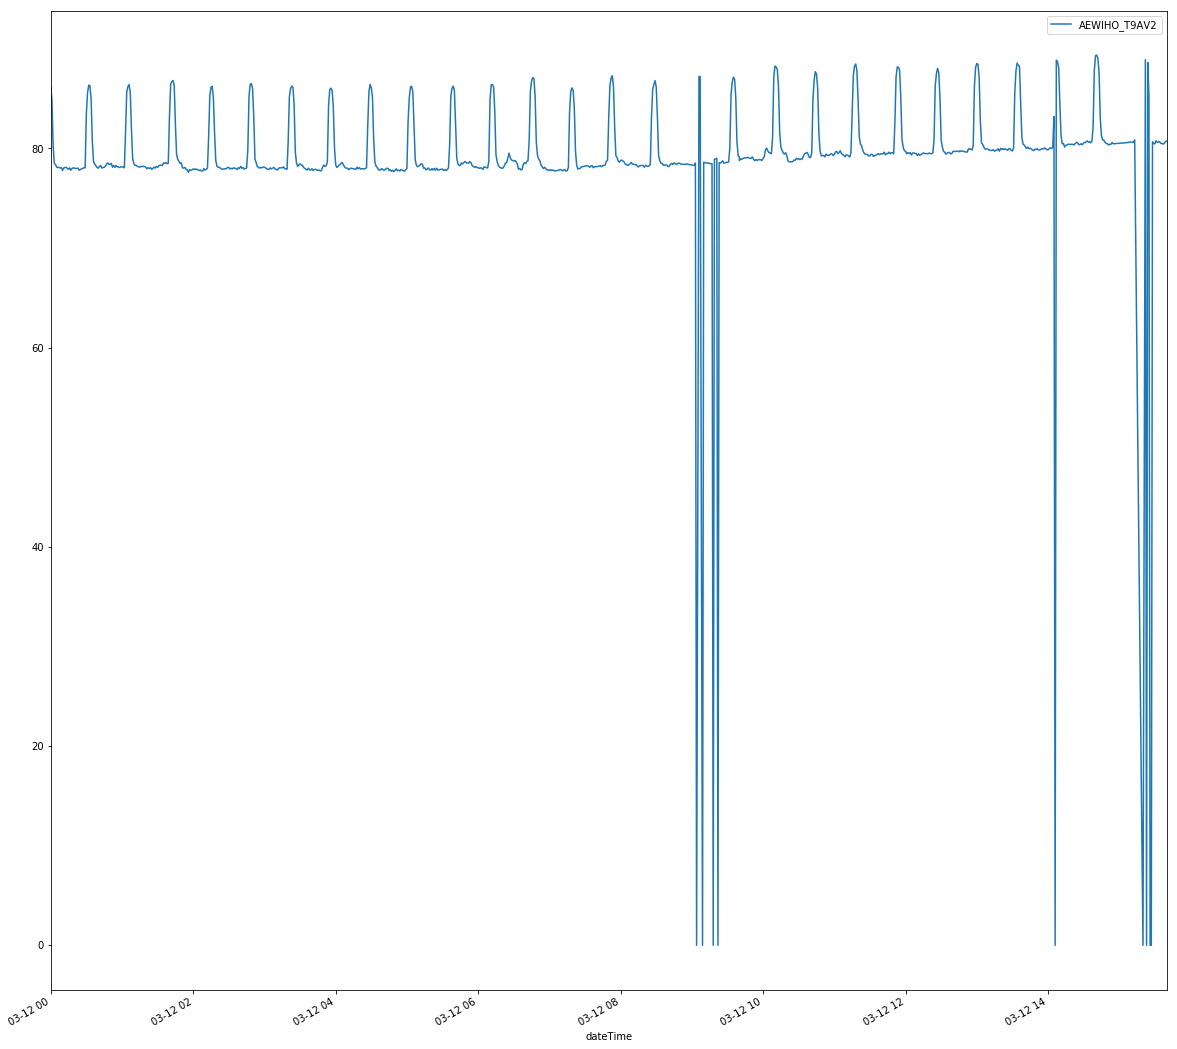

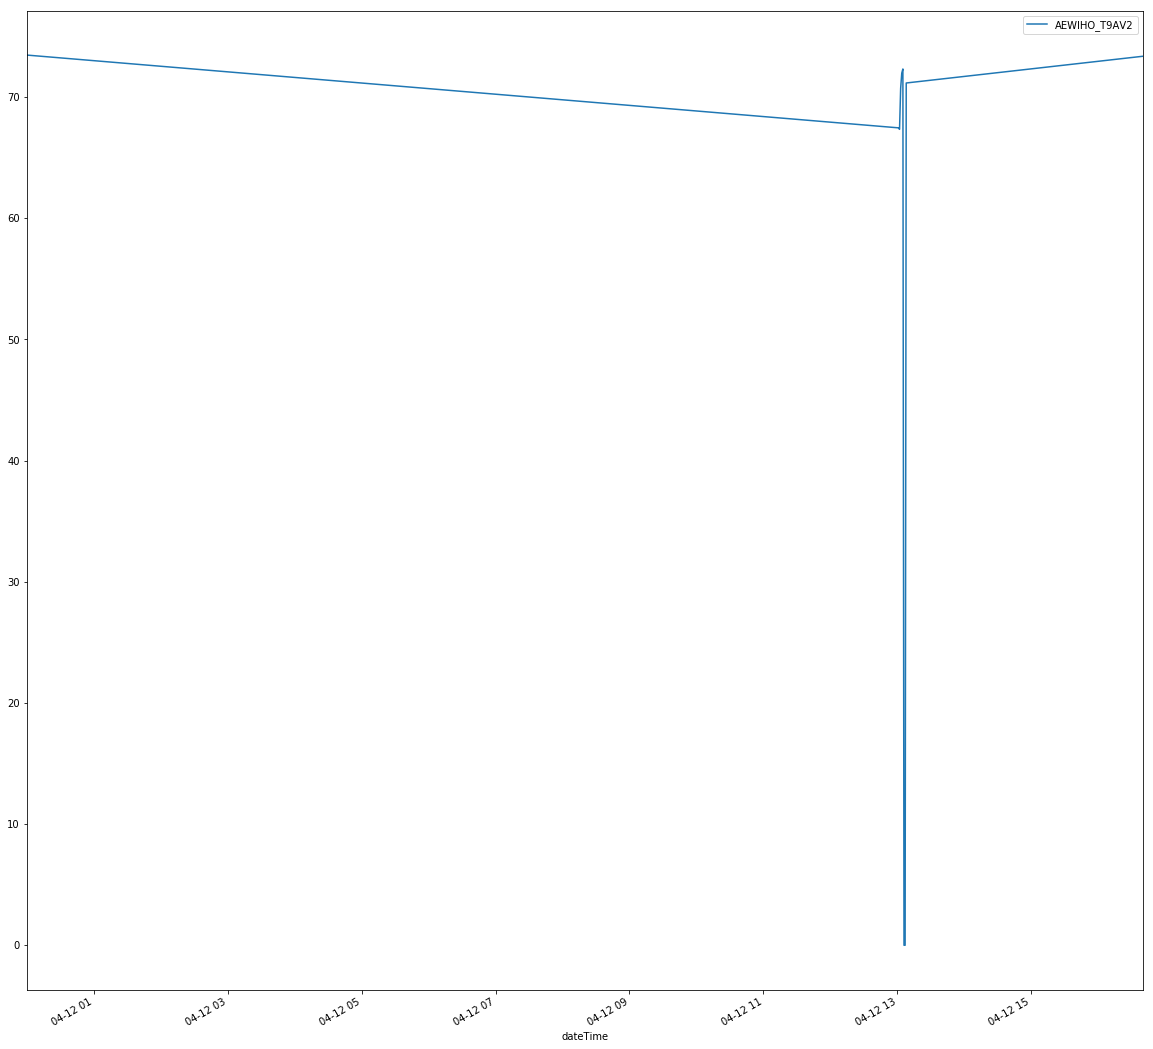

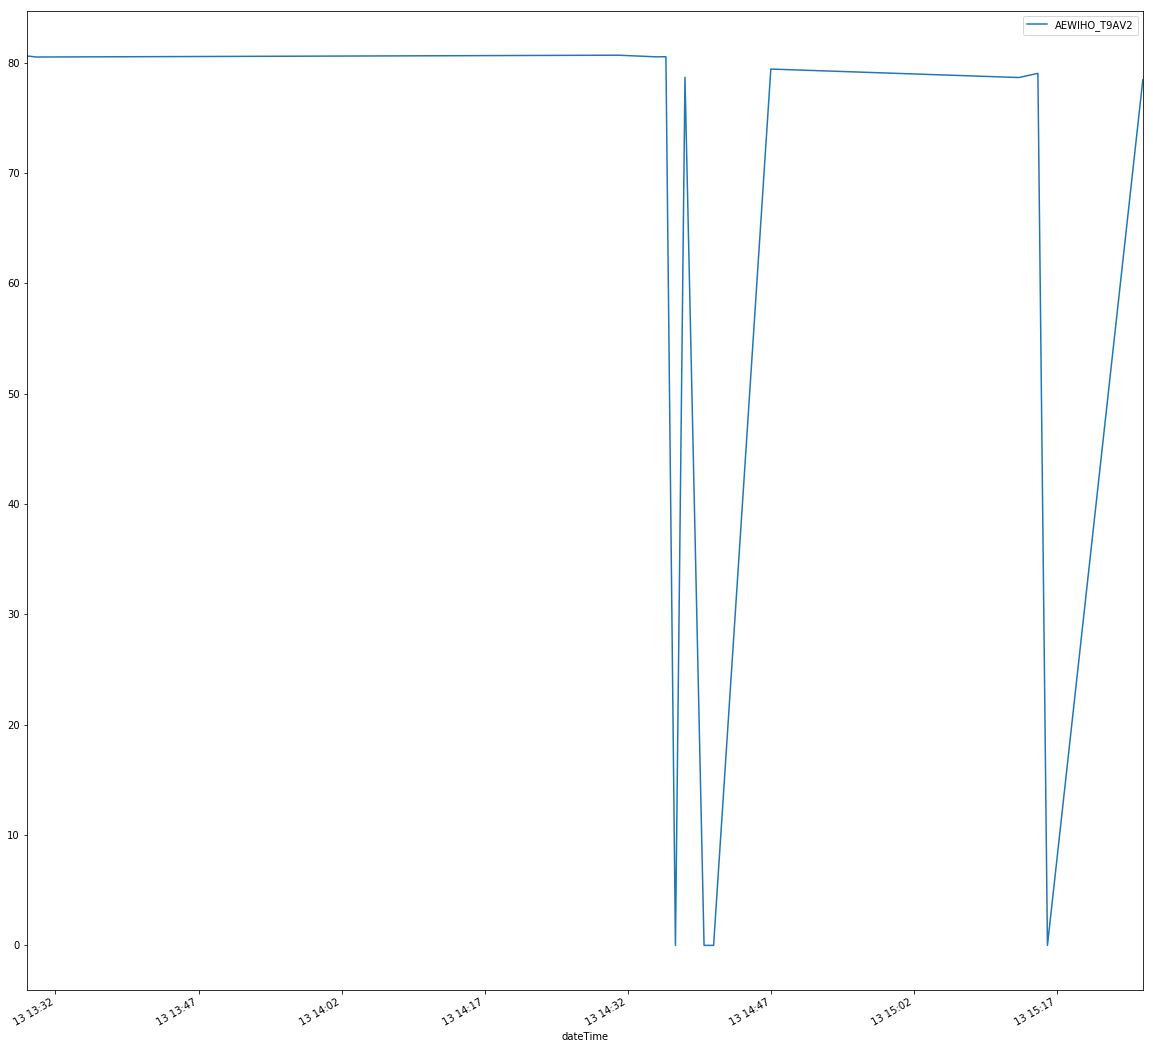

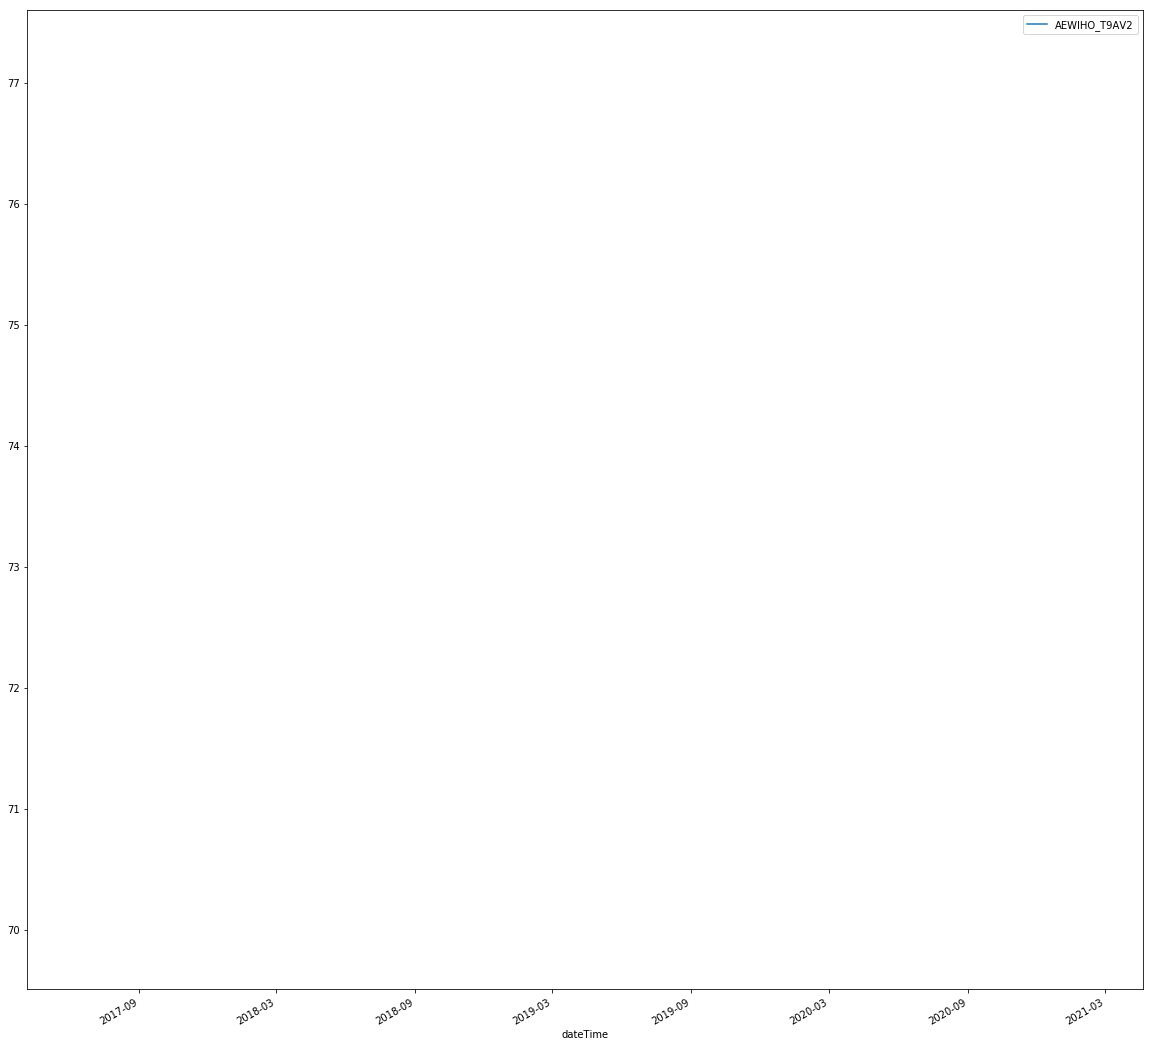

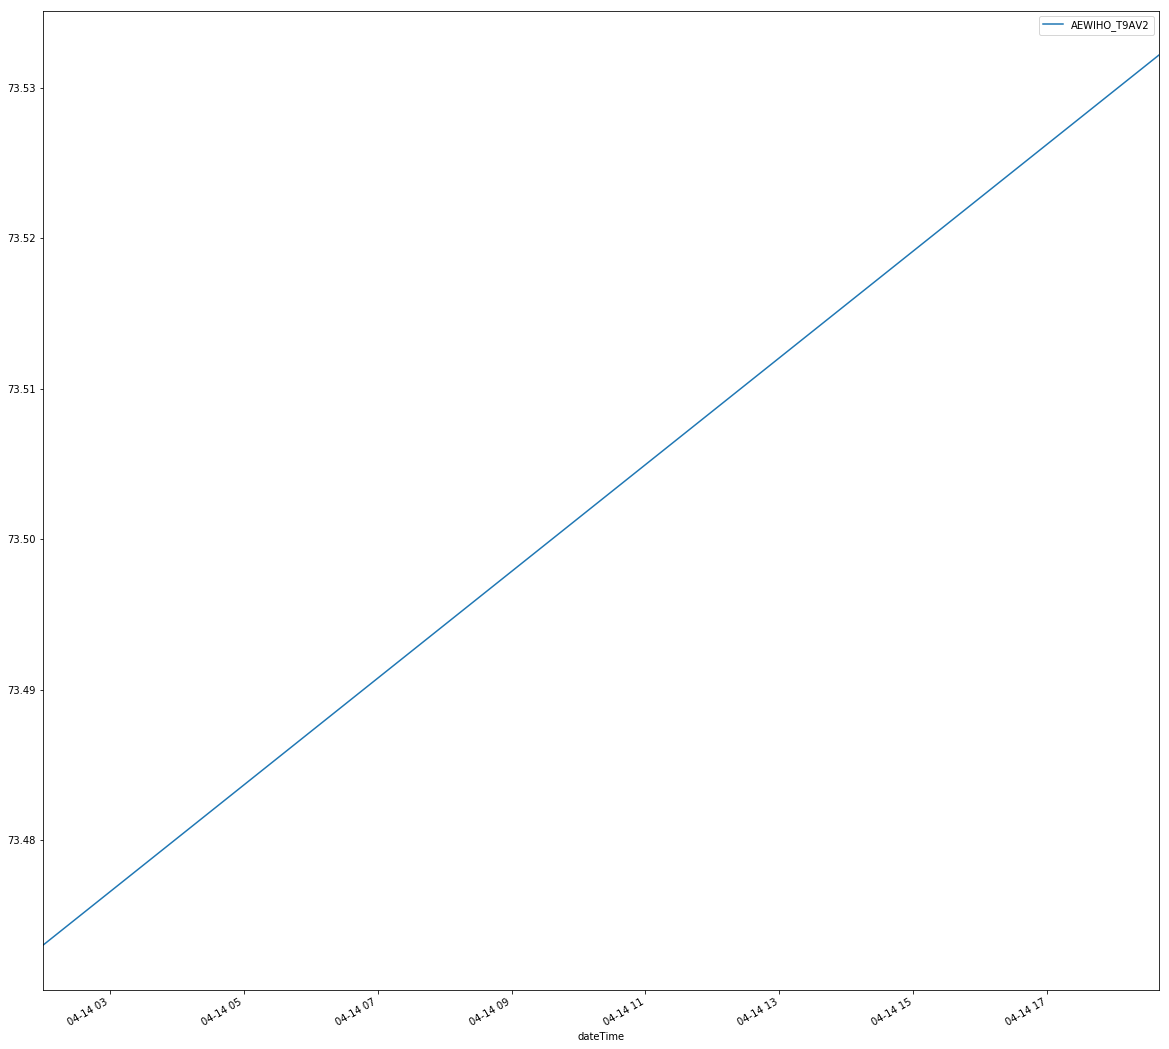

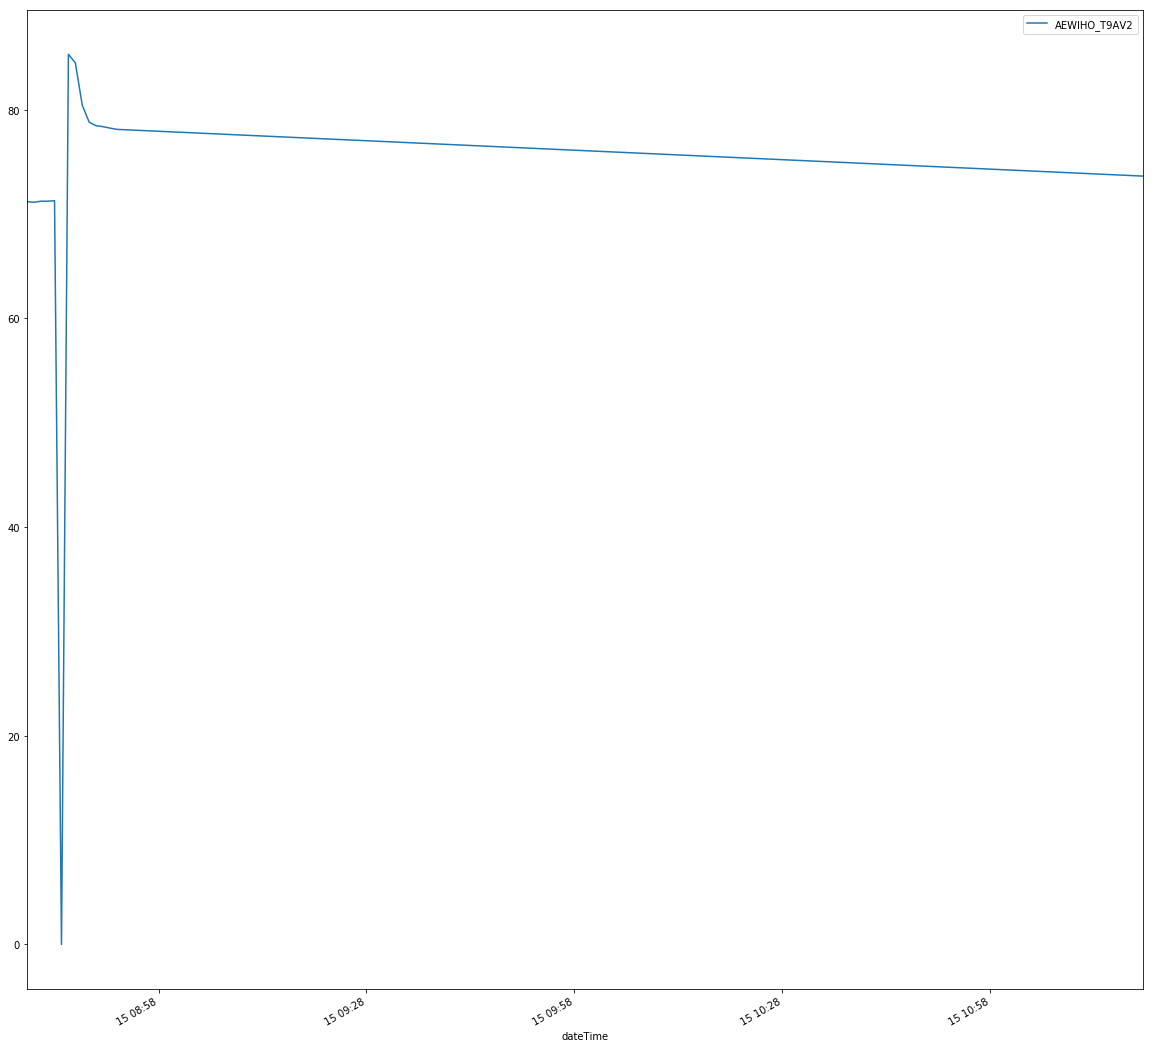

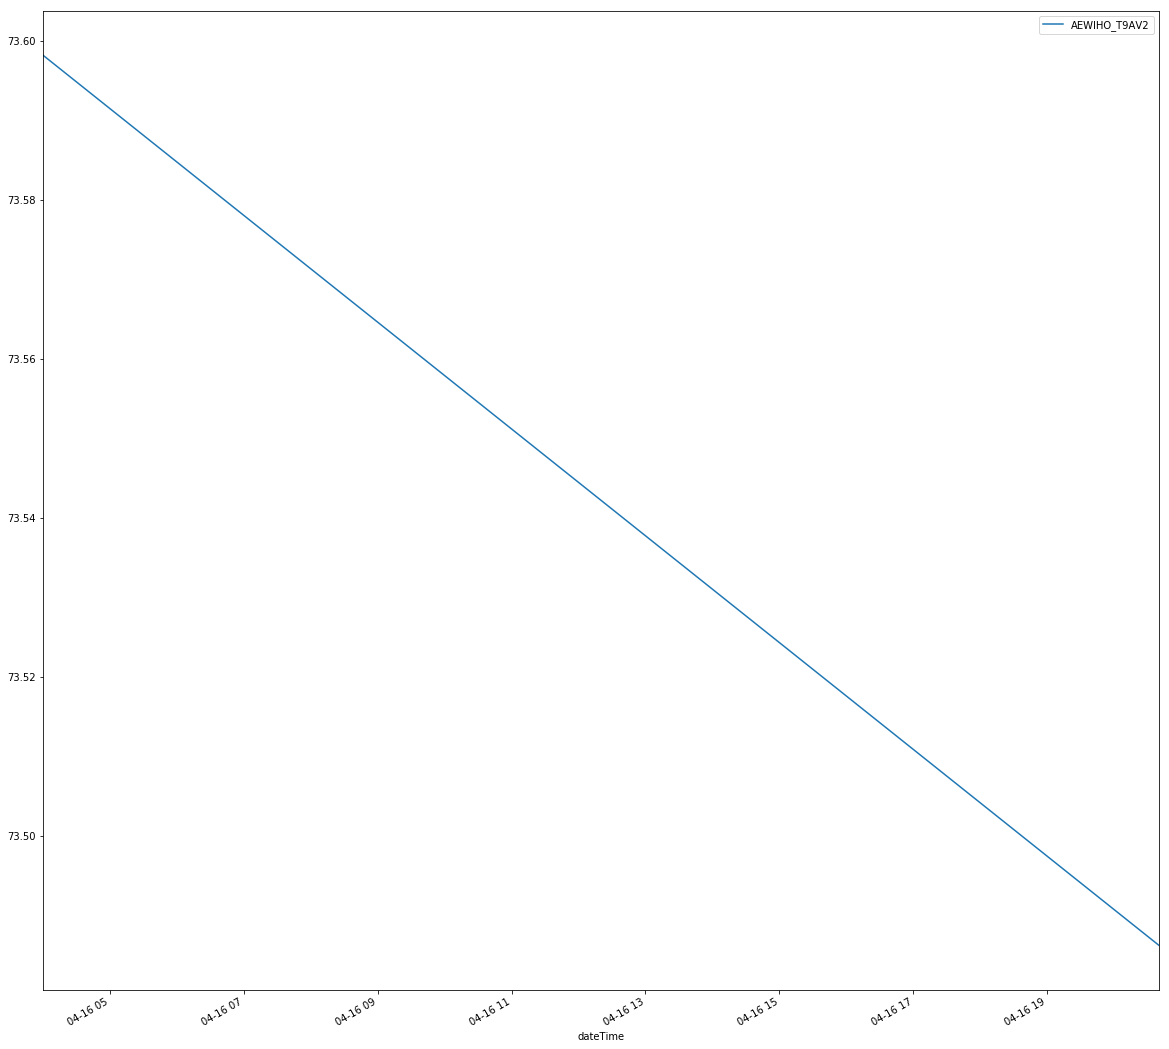

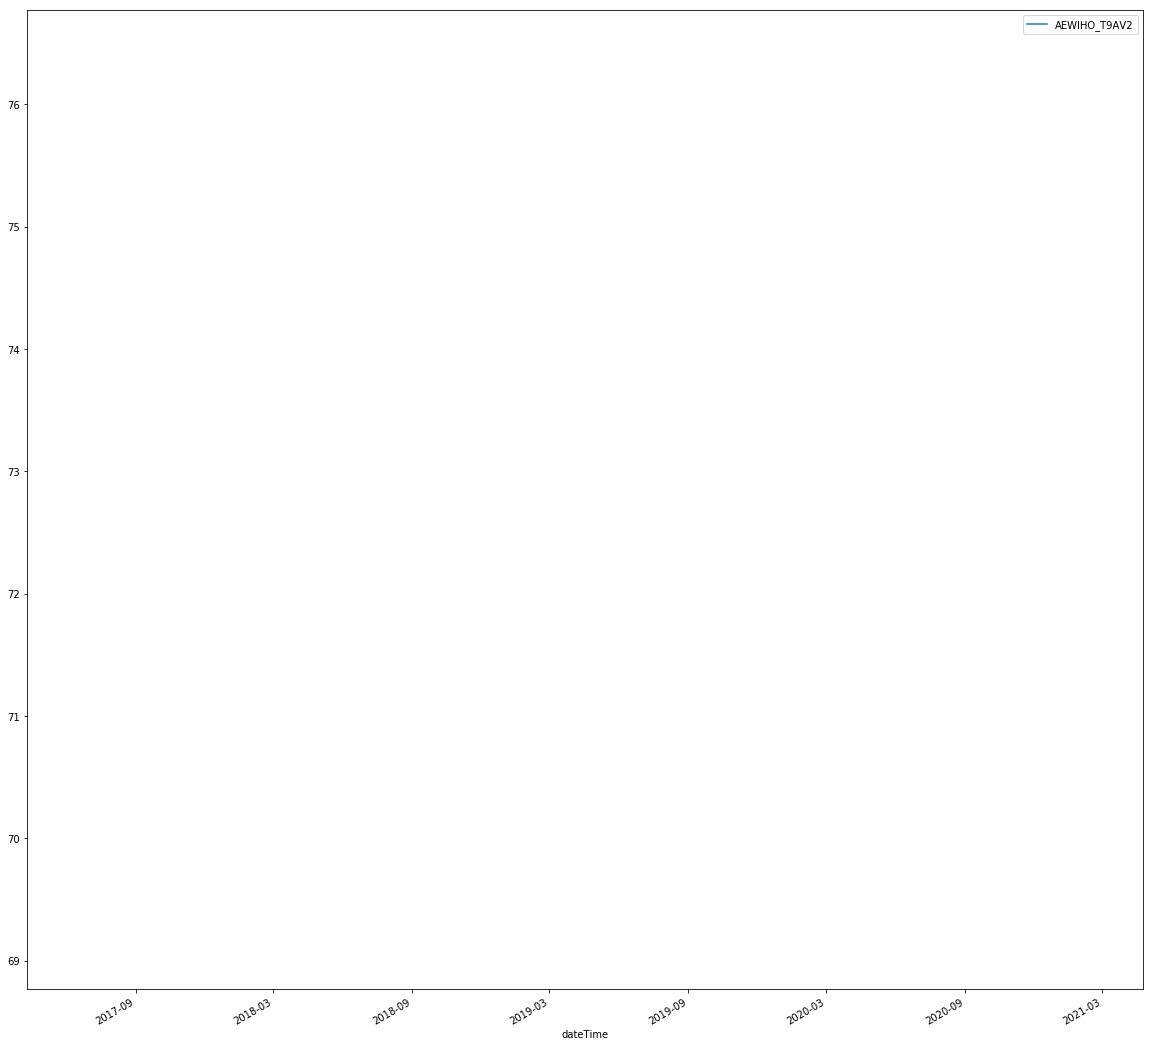

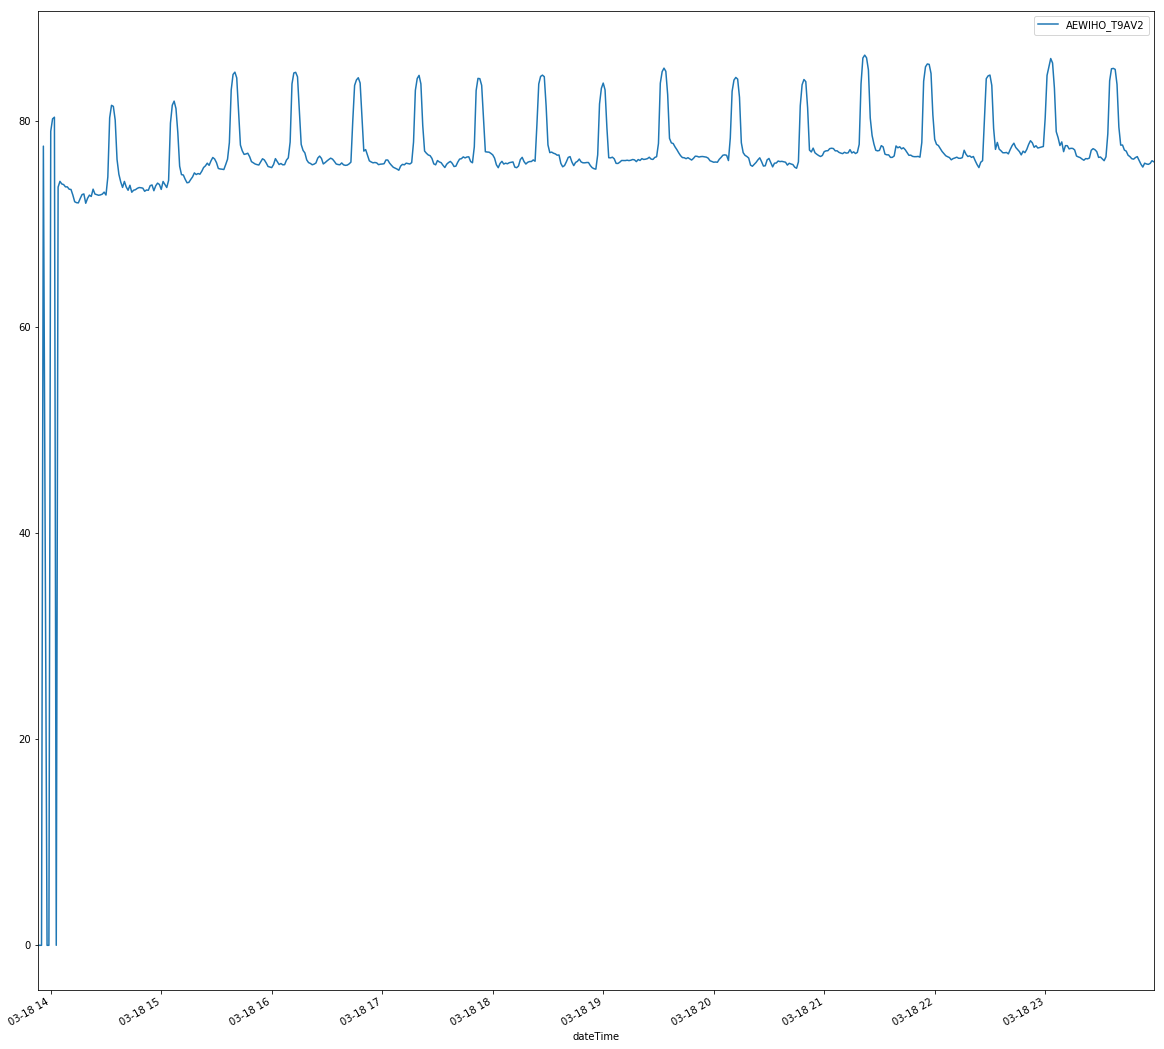

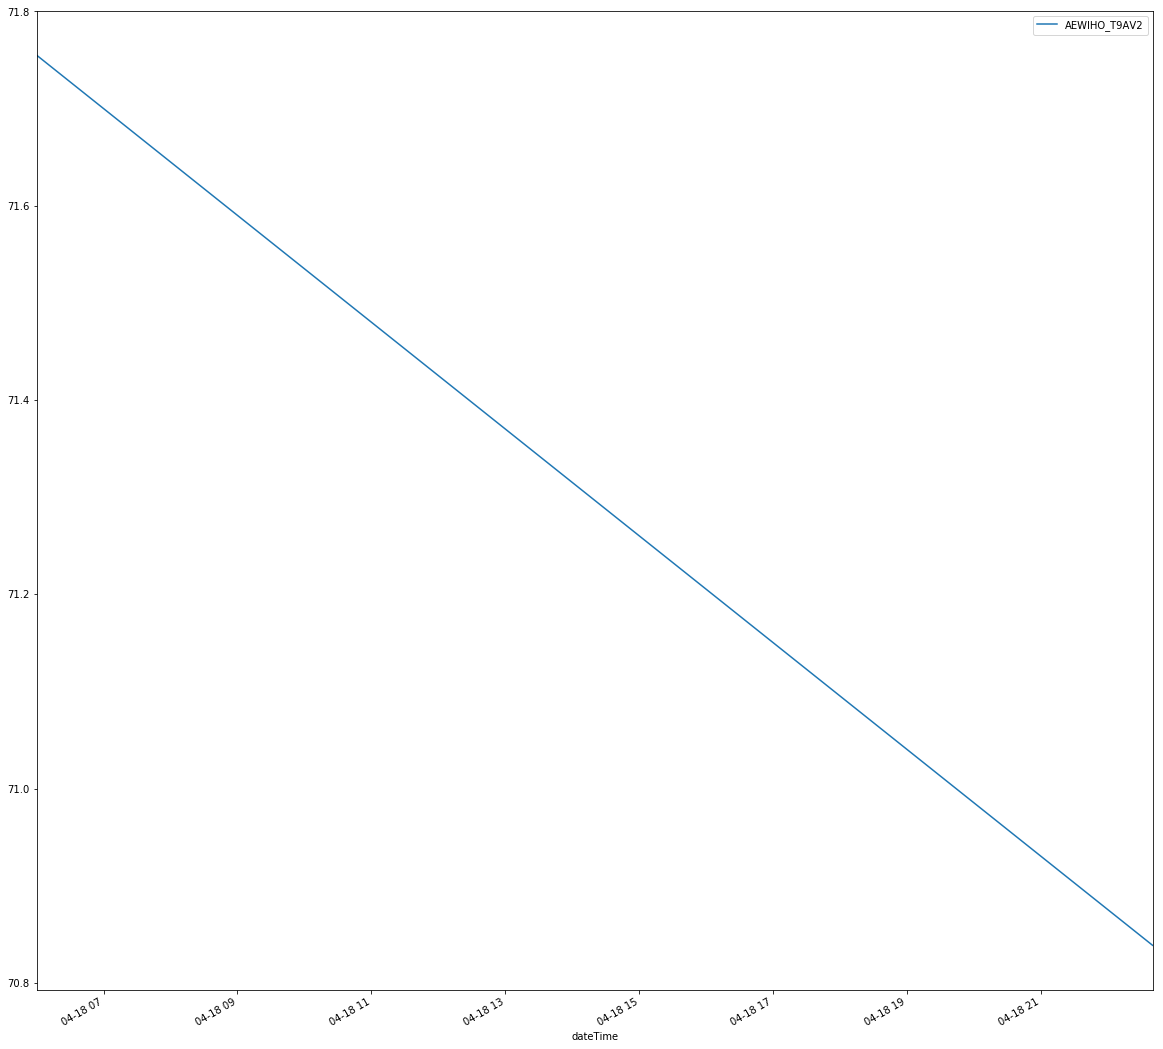

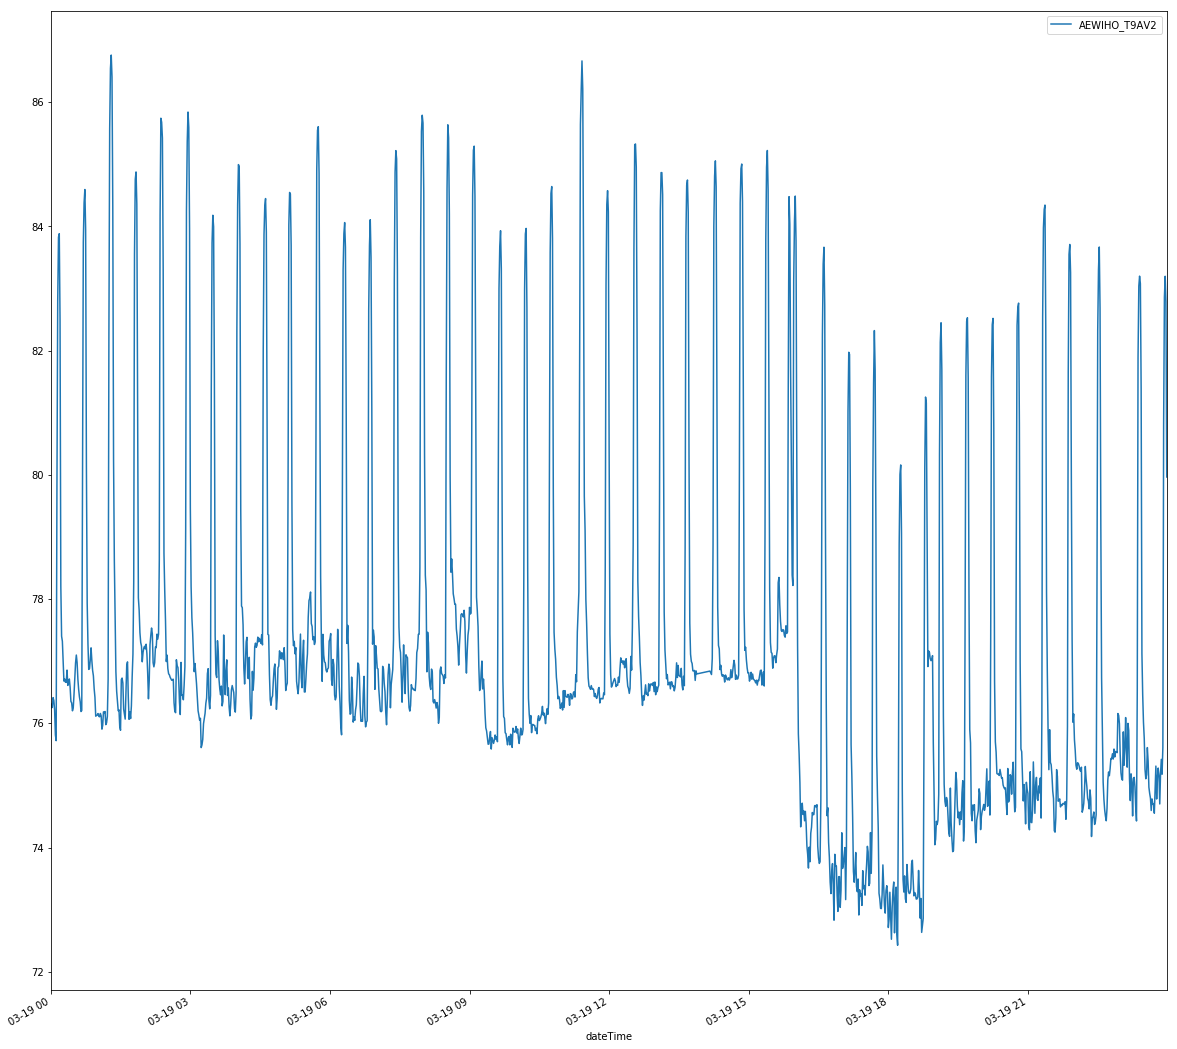

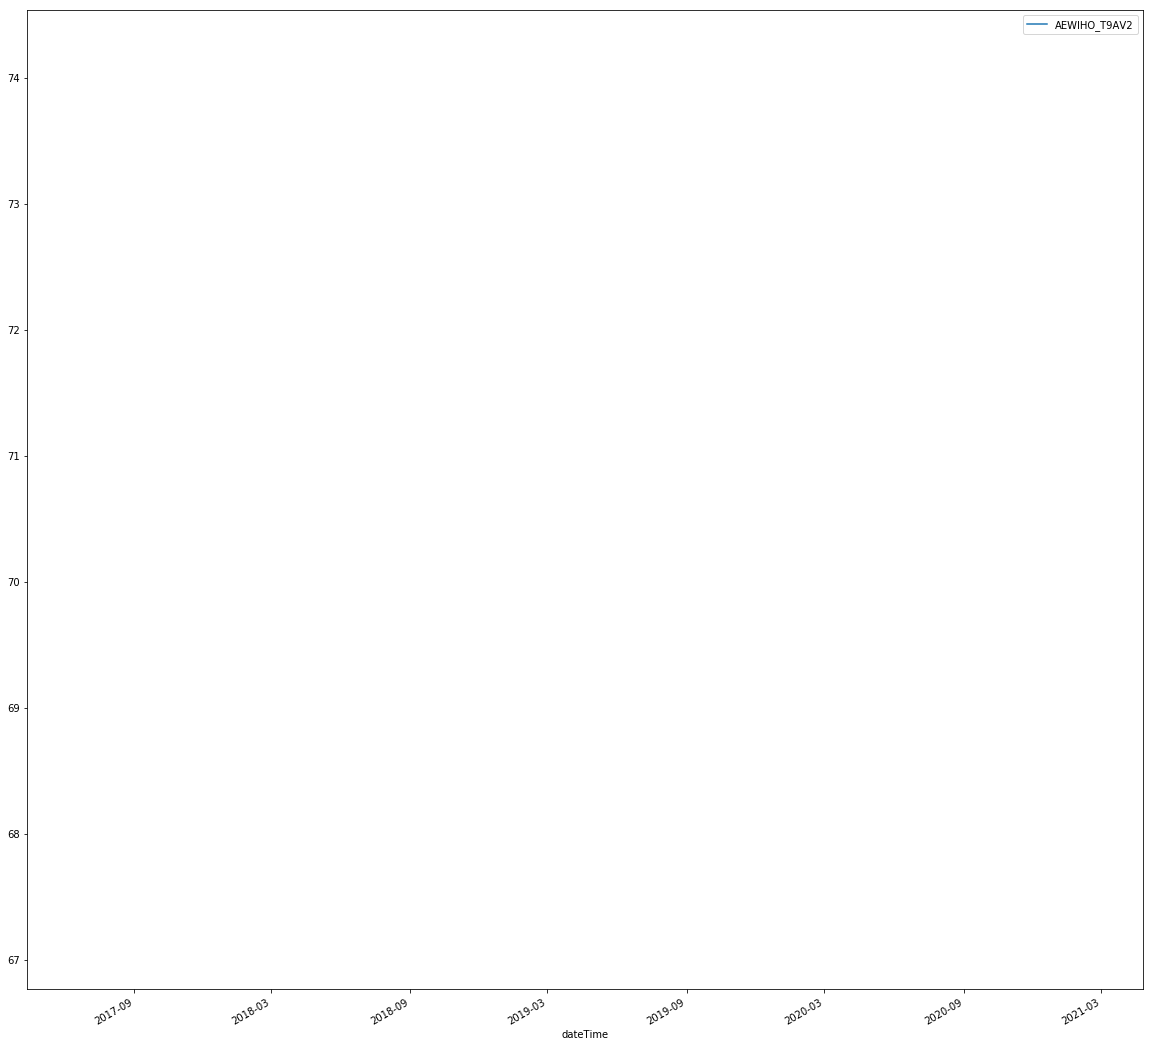

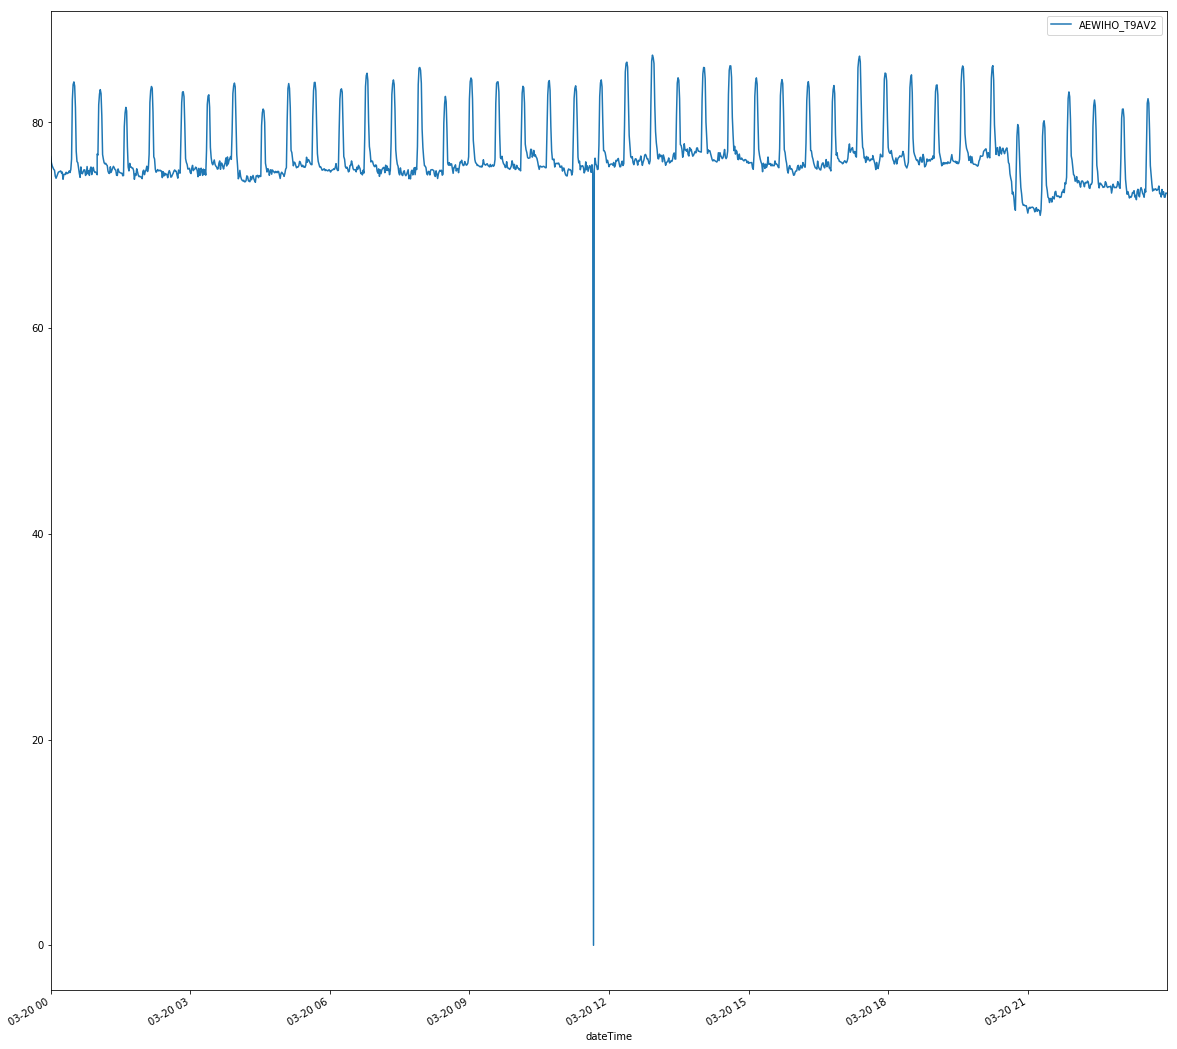

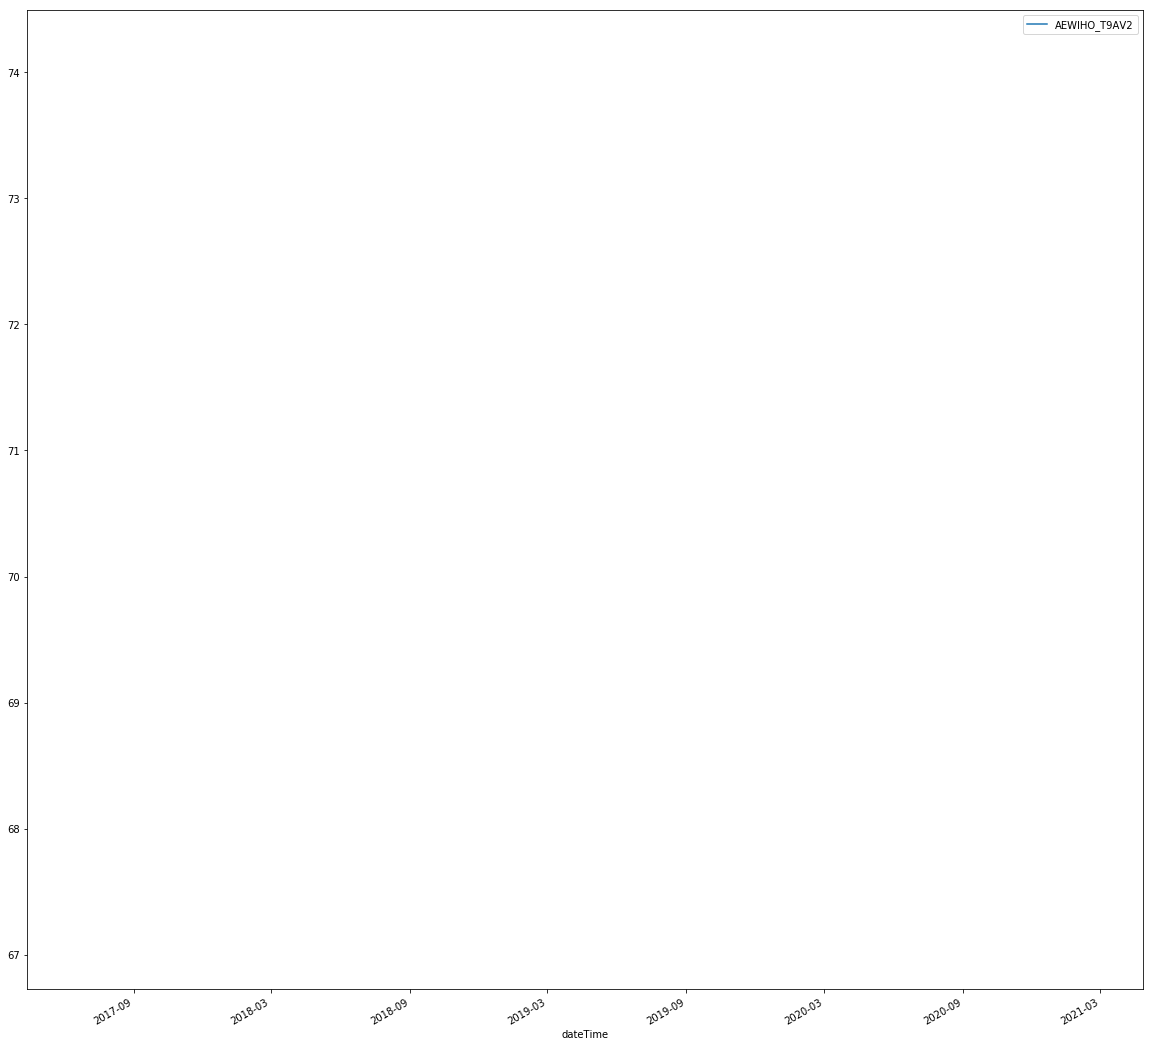

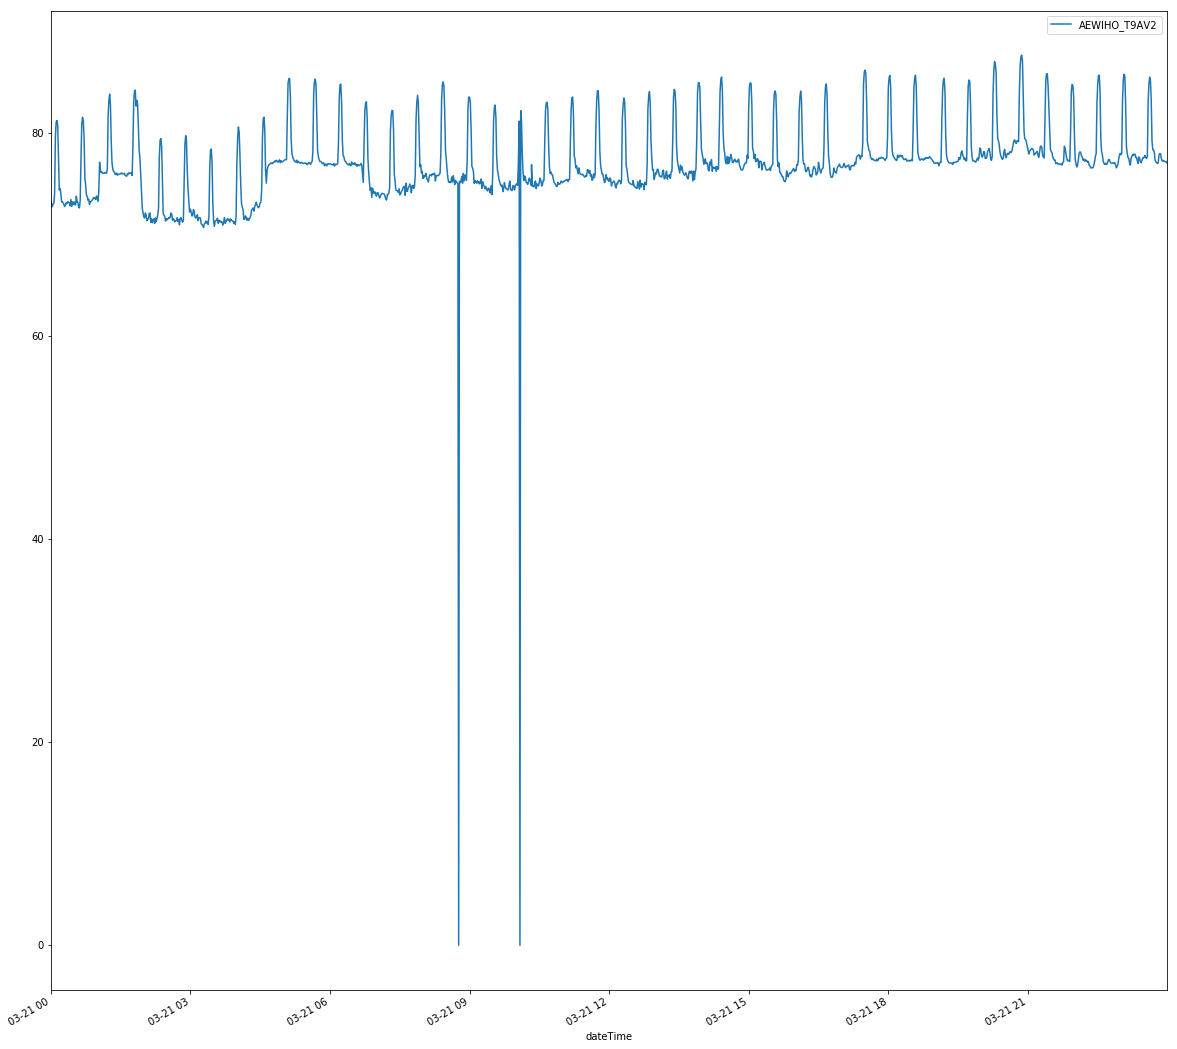

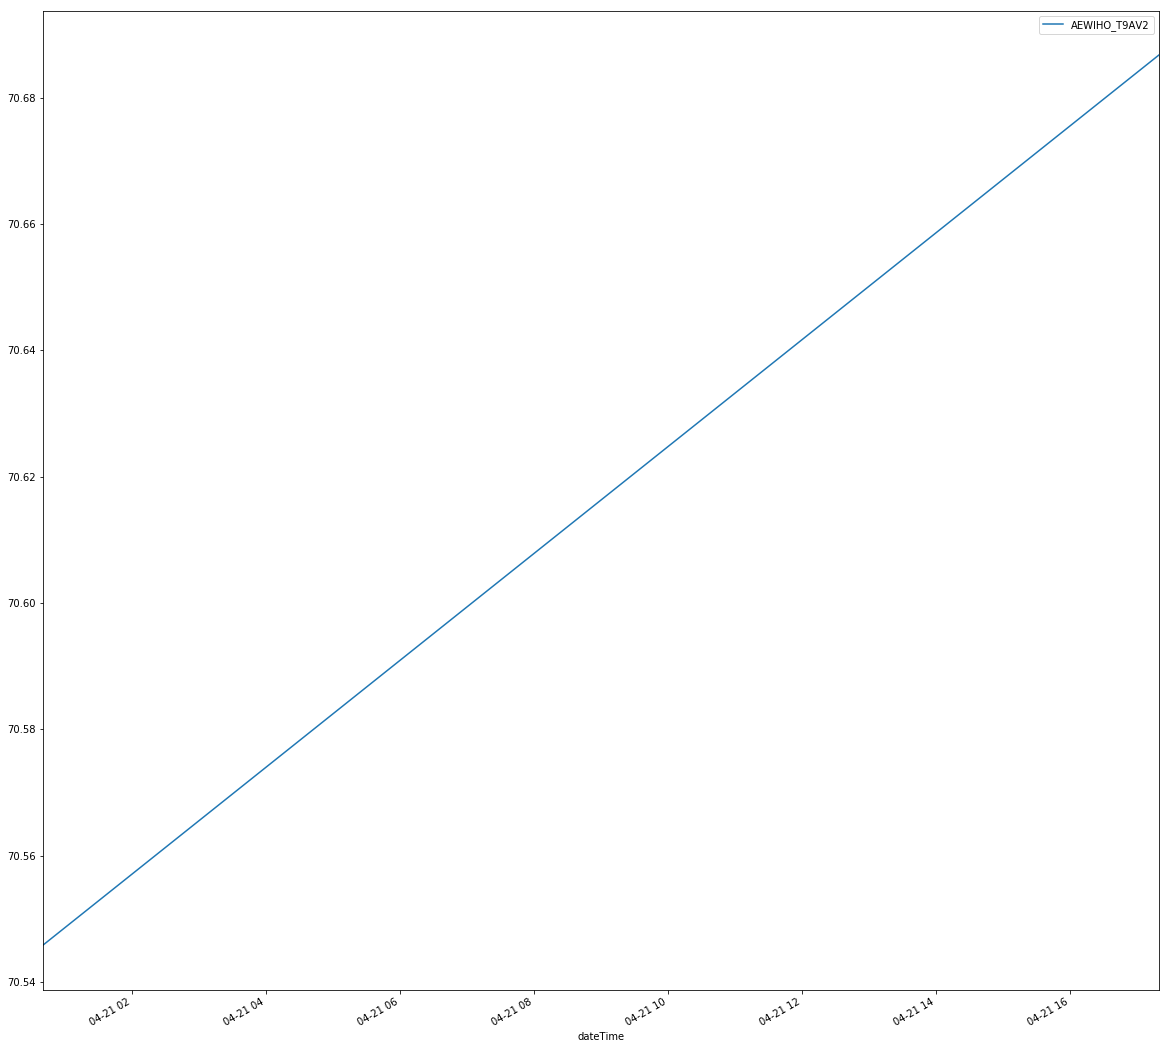

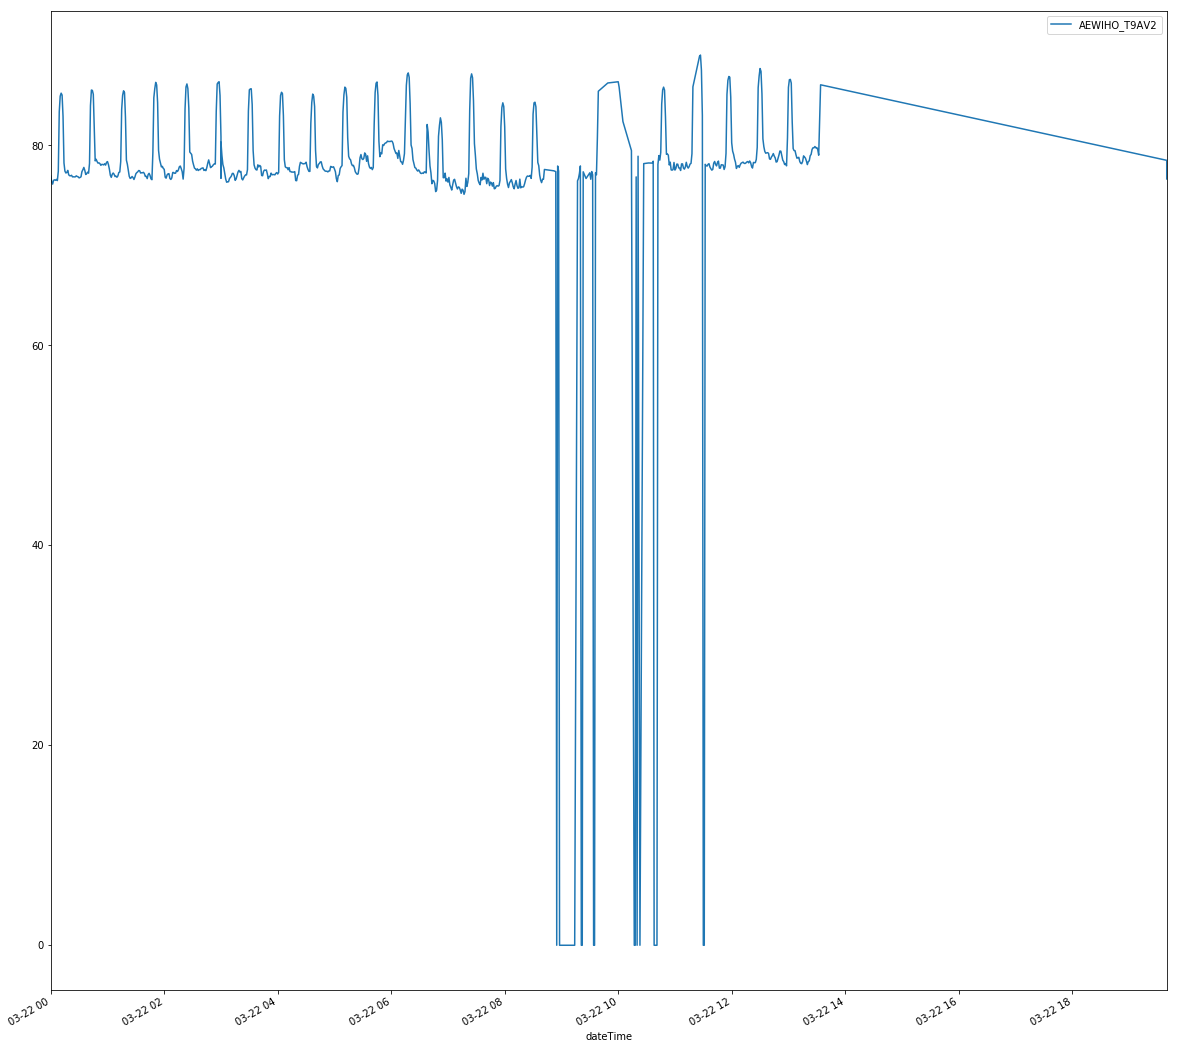

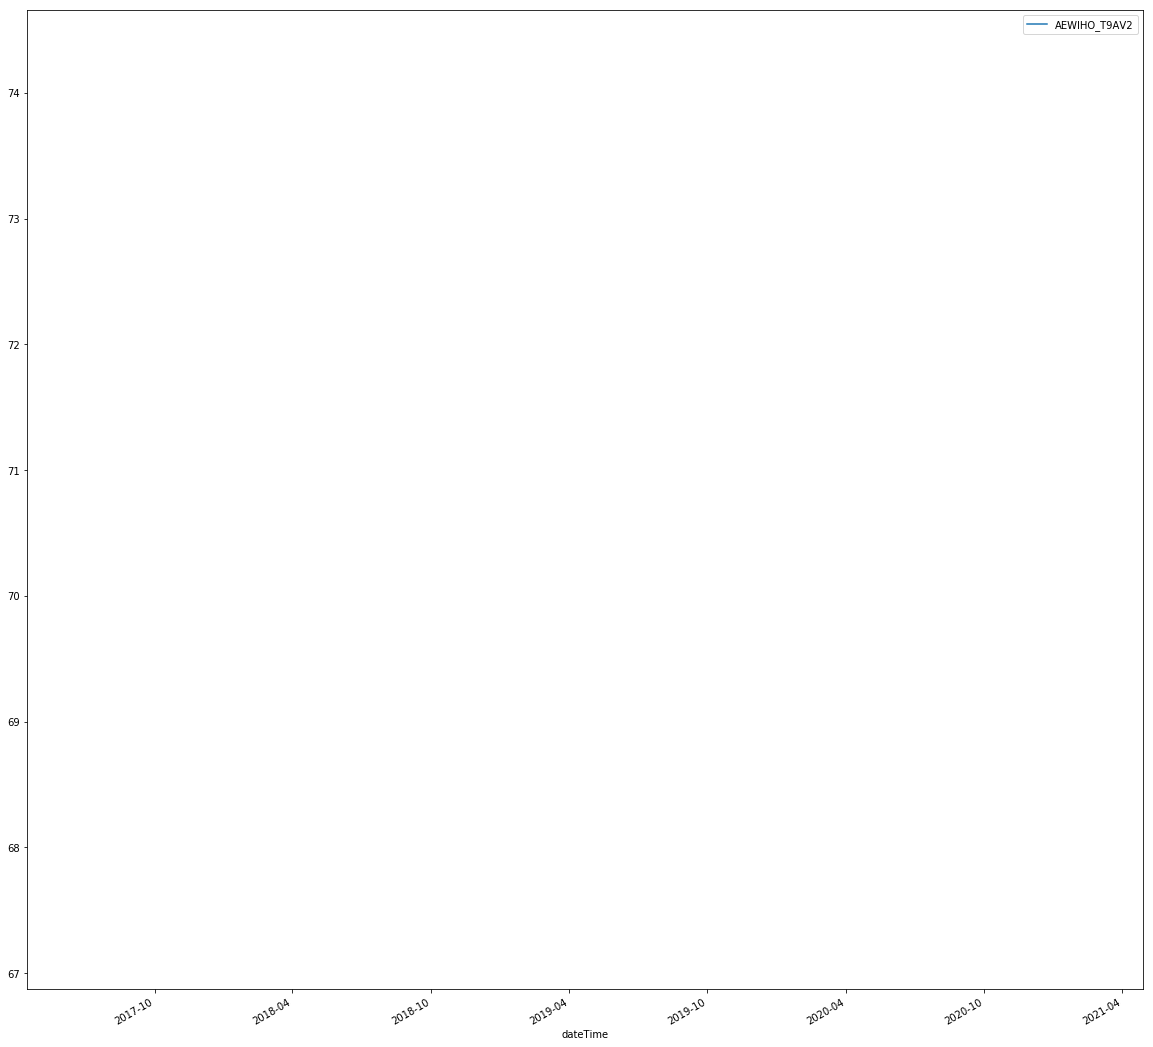

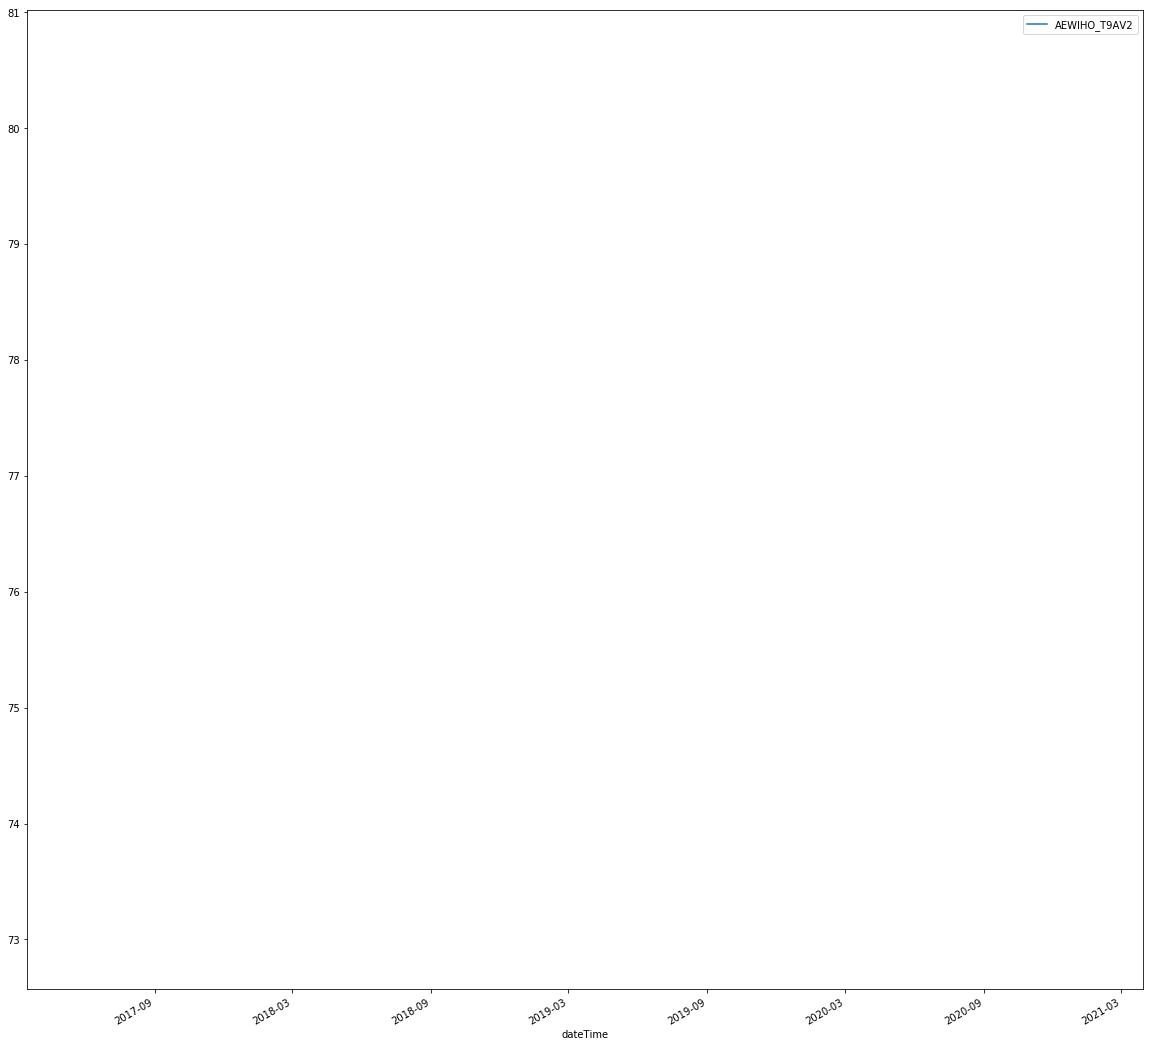

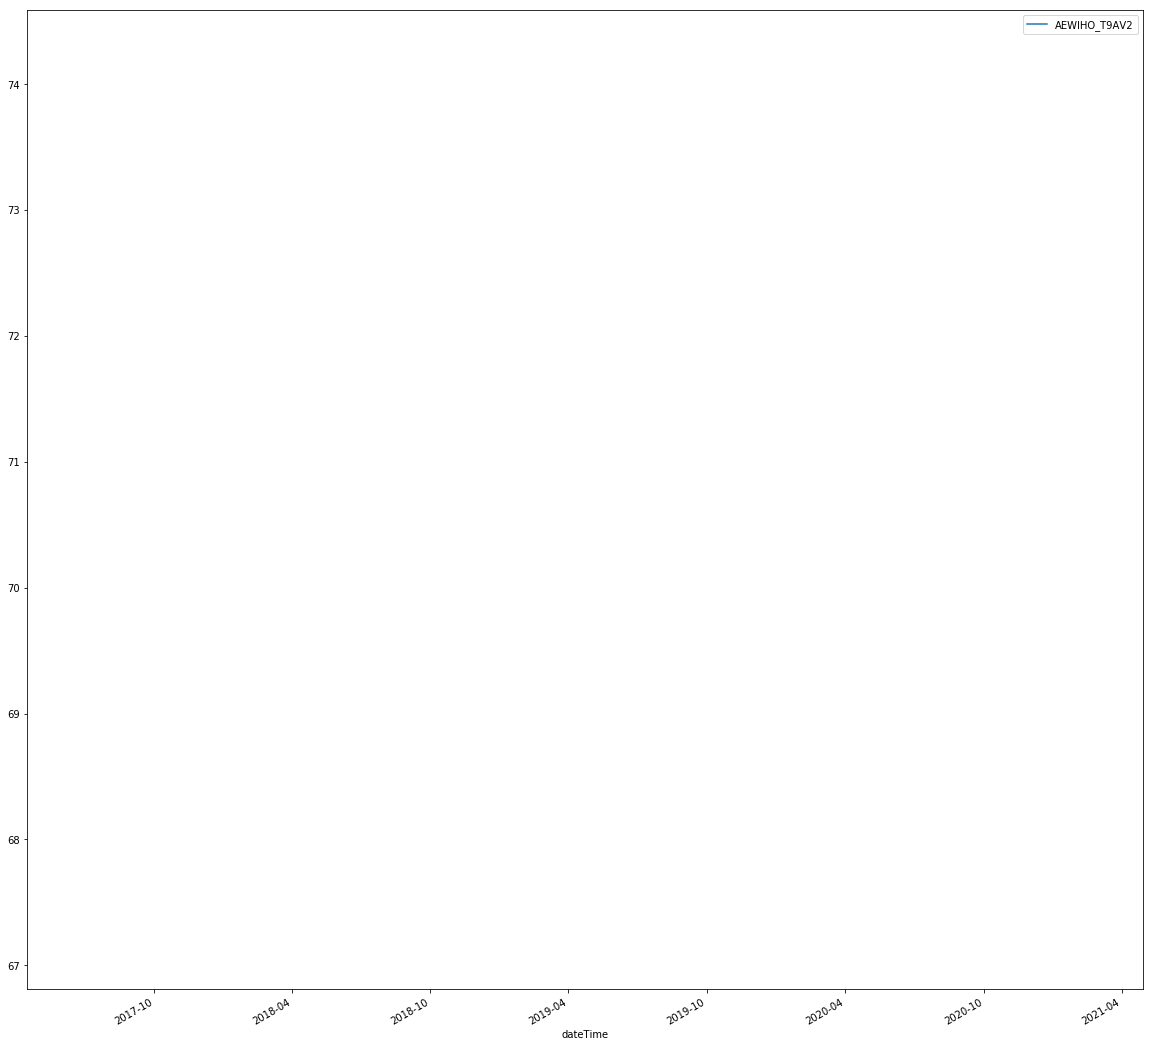

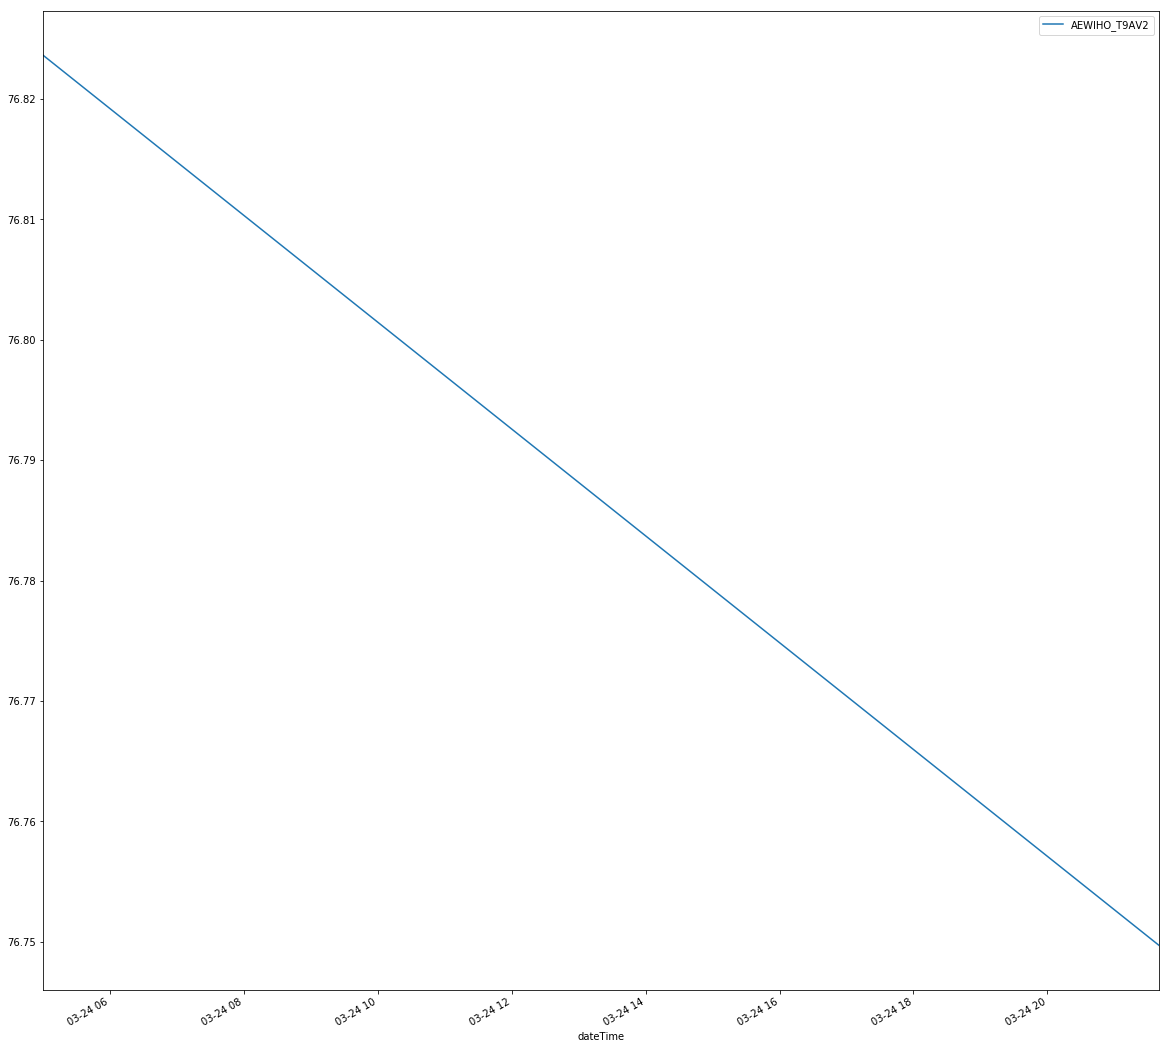

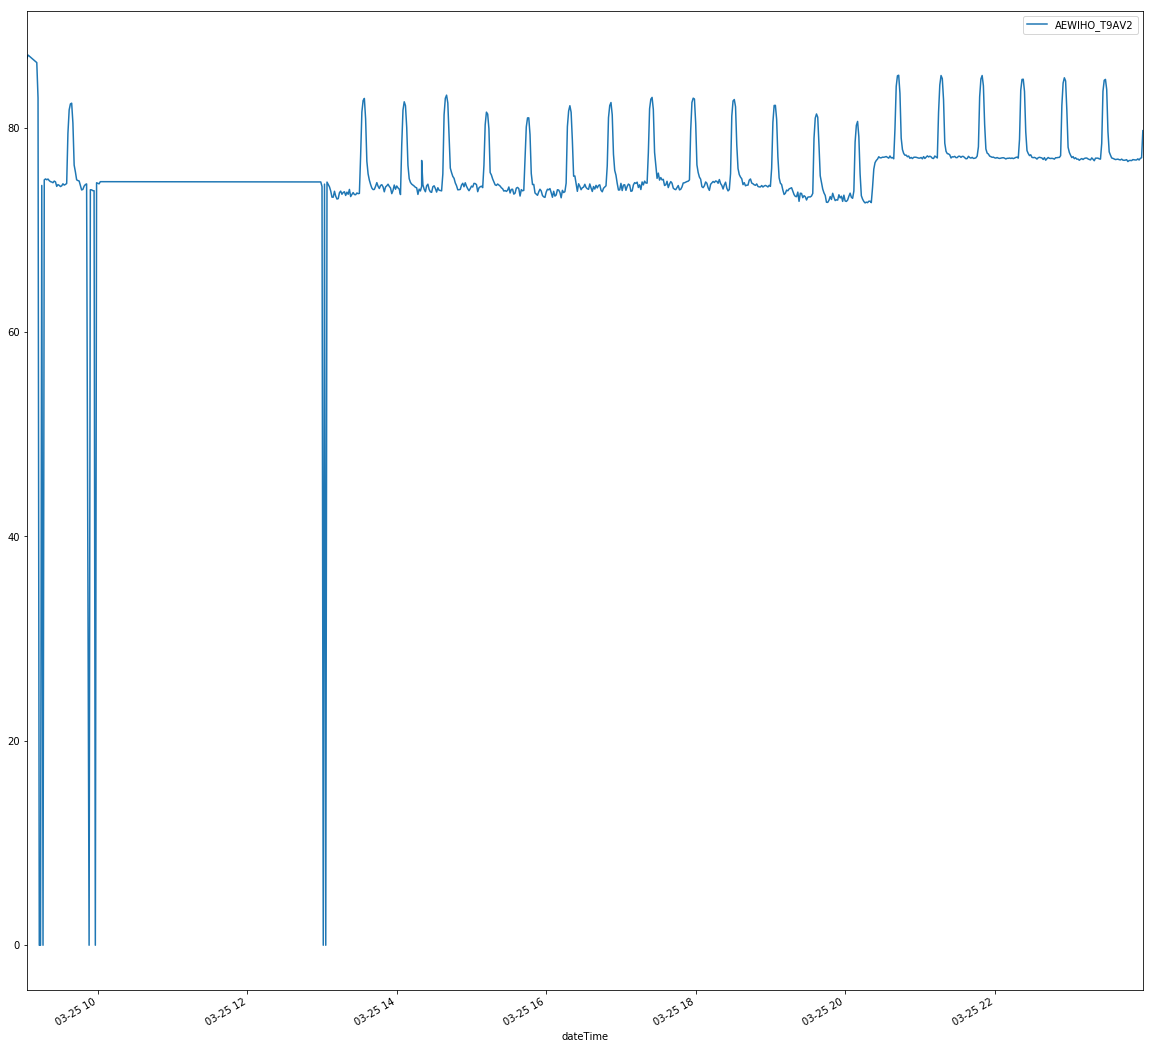

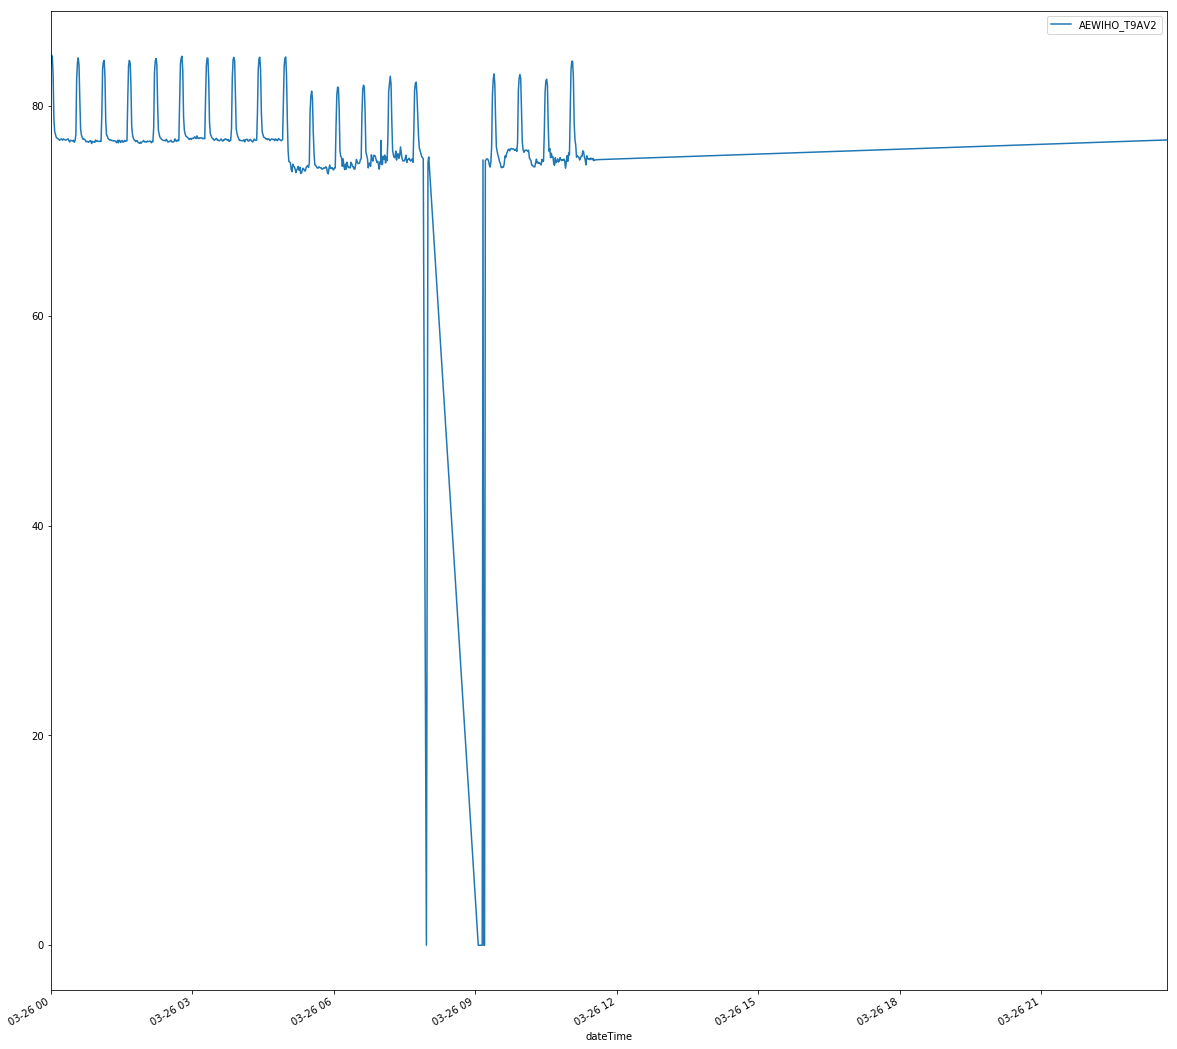

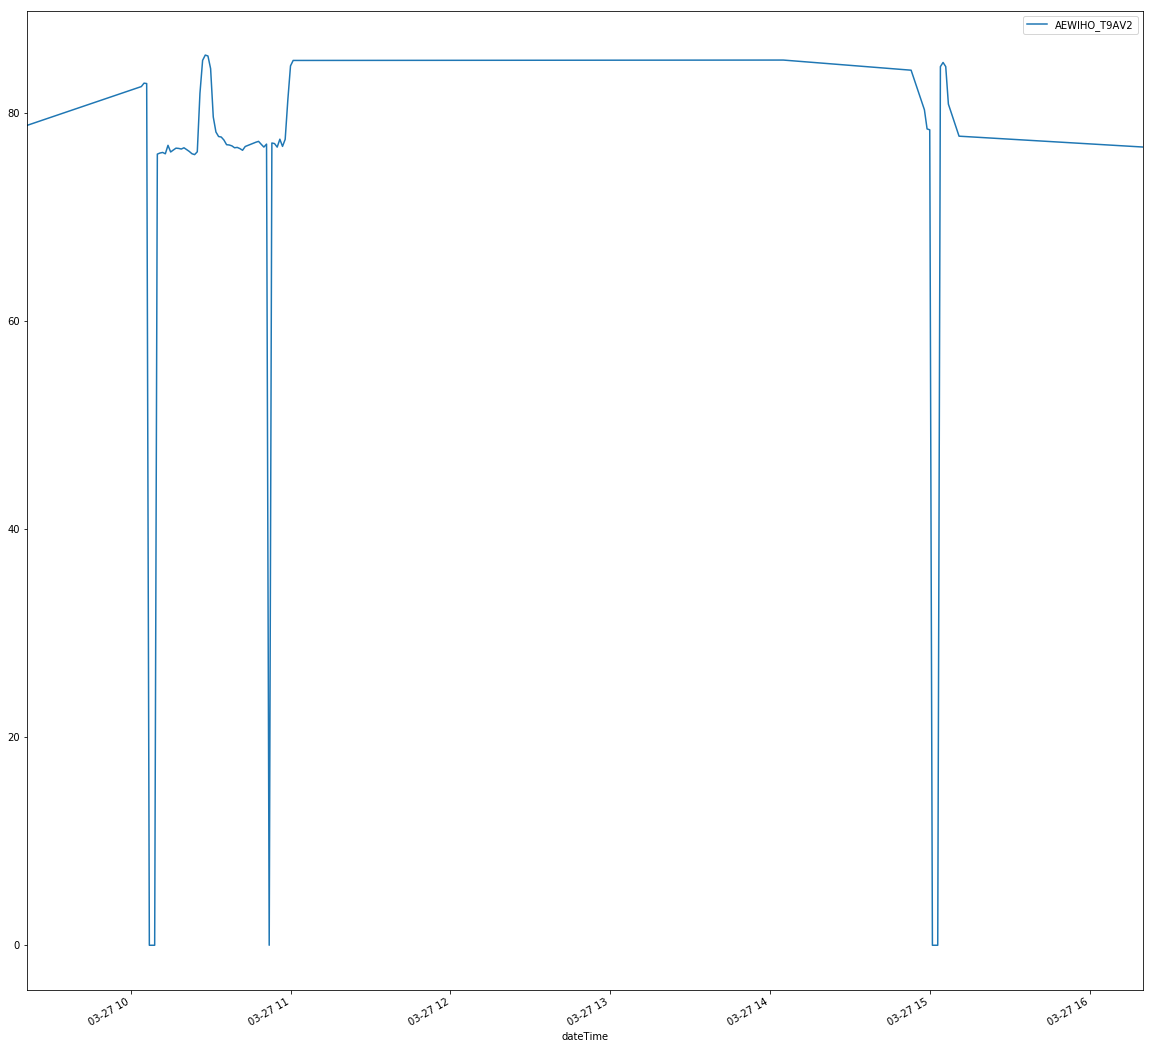

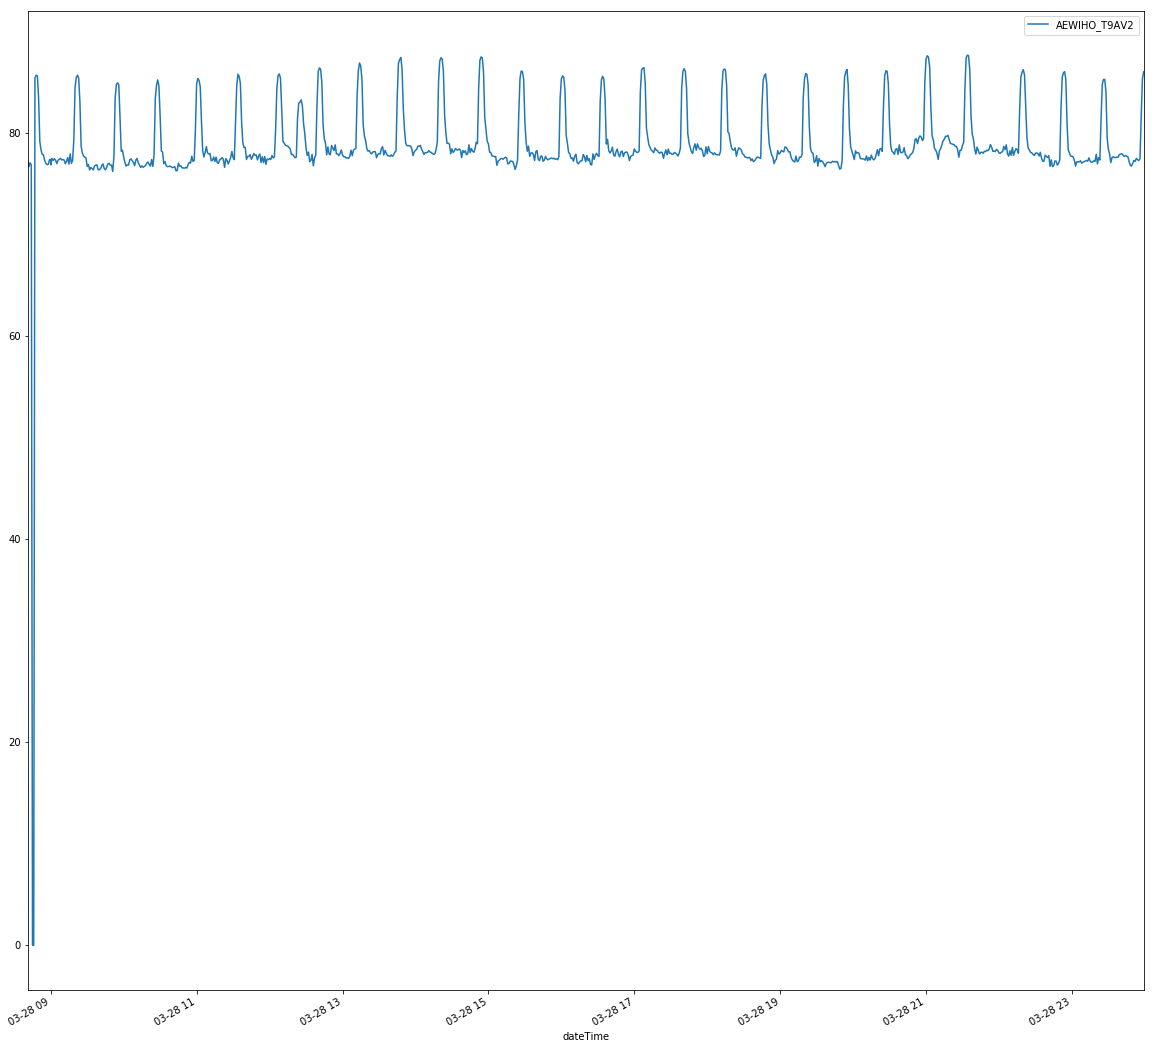

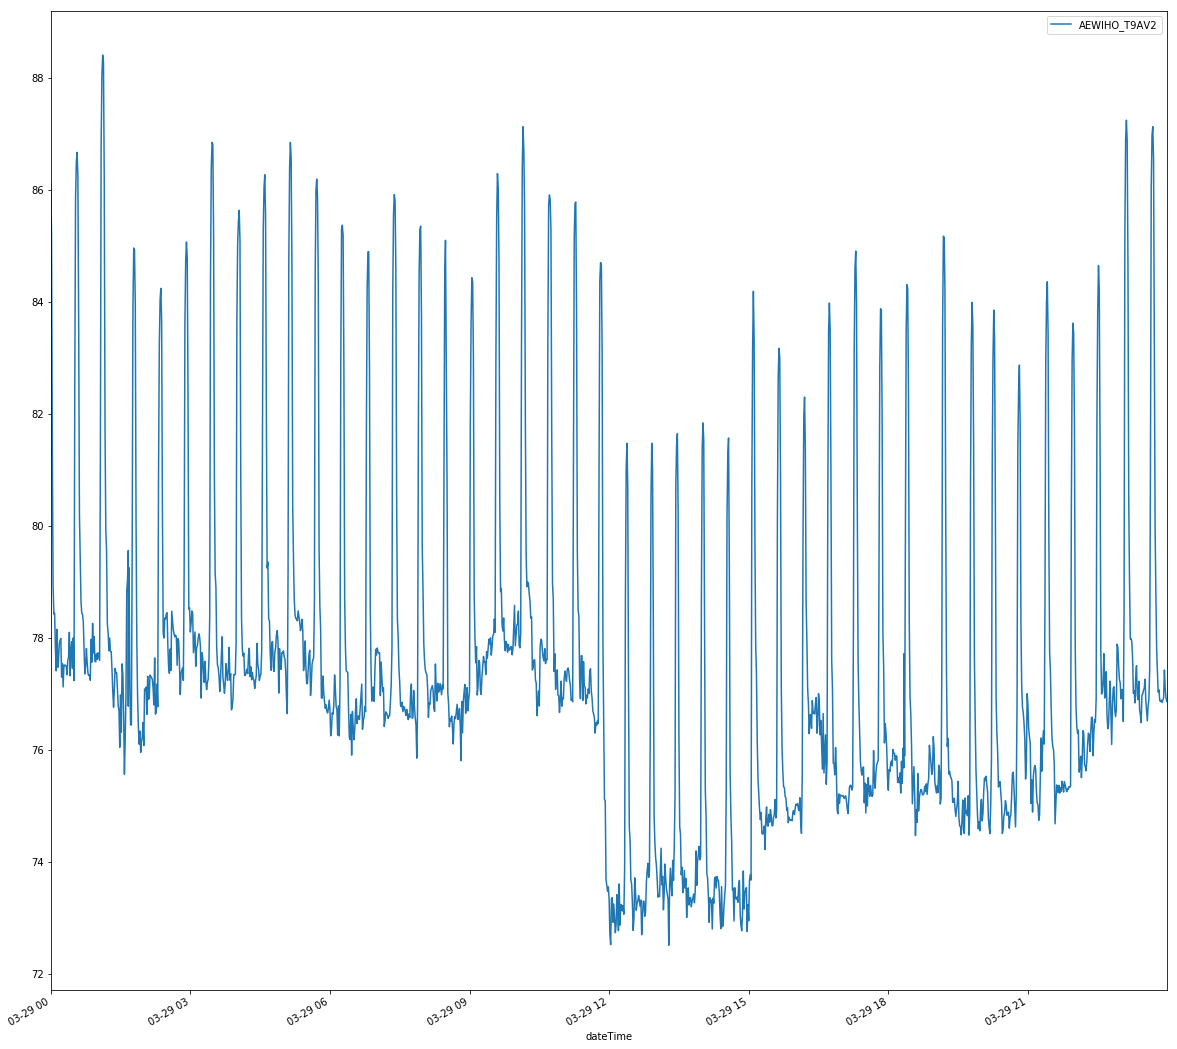

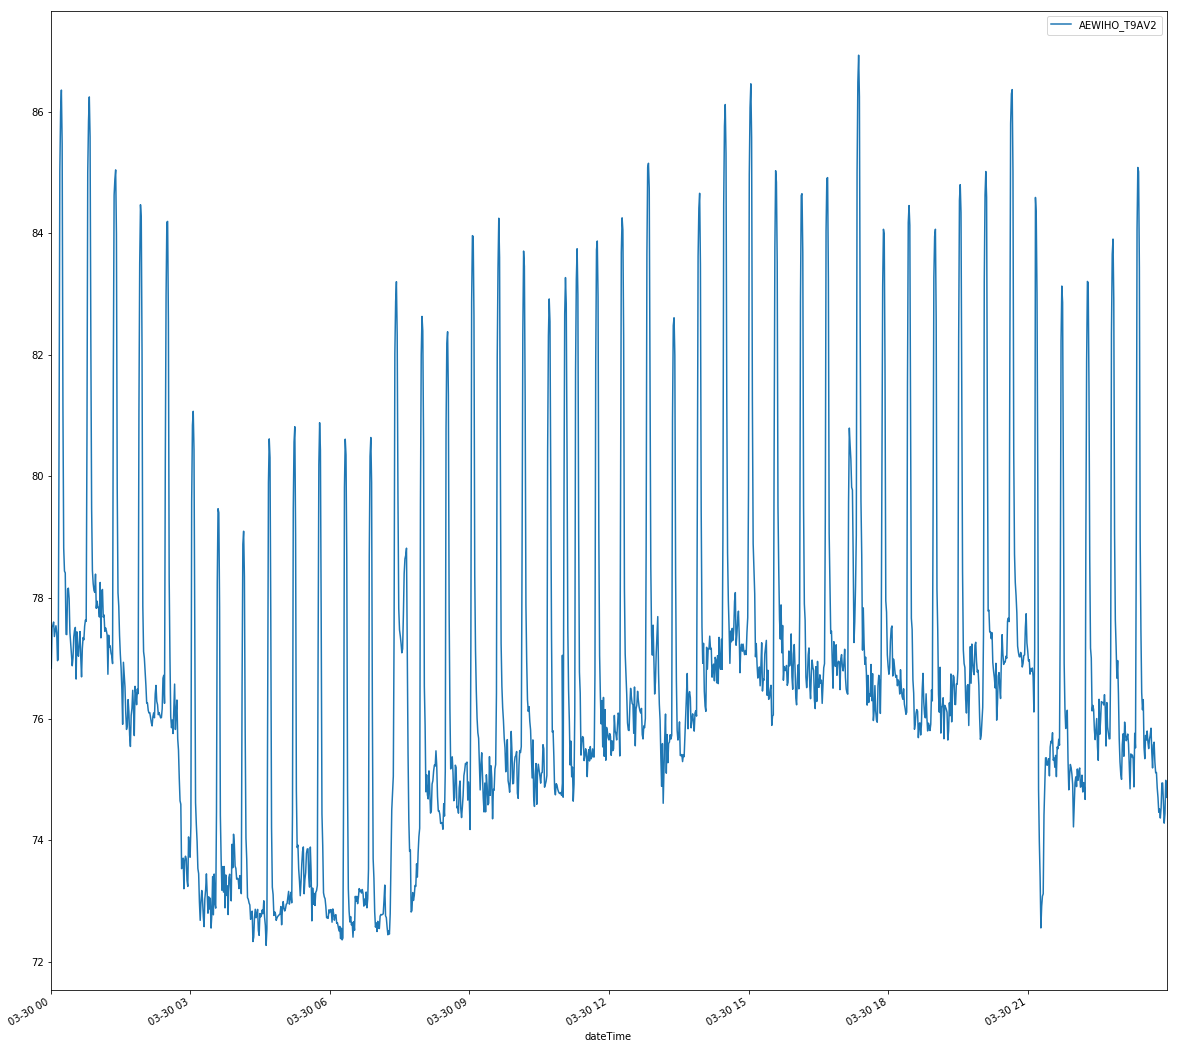

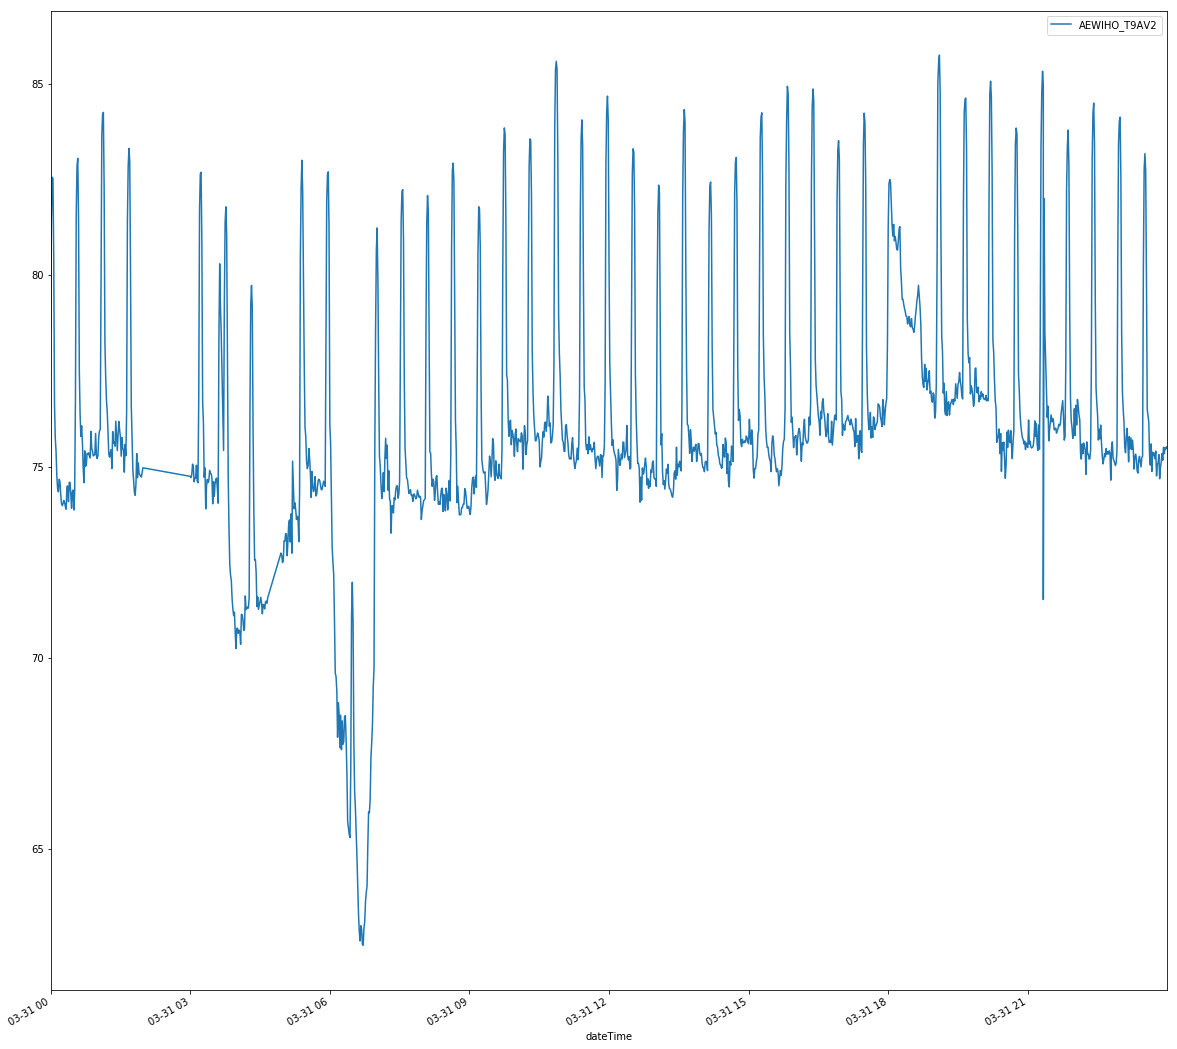

In [347]:
dict_of_dates = {k: v for k, v in tr.groupby('Date')}

import collections
prices  = collections.OrderedDict(dict_of_dates)

path_1 = 'E:/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/univariate_data_for_prediction/figure_from_code/graph_of_target_day_wise/'

for k in prices:
    k_sp = k.replace('/','_')
    my_f = dict_of_dates[k]
    my_f.iloc[:].plot(y=['AEWIHO_T9AV2'])
    plt.savefig(path_1+str(k_sp)+'_'+'date.jpg')
    plt.ioff()
#     print(my_f.iloc[:]['AEWIHO_T9AV2'])
    
    

In [ ]:
dict_of_dates = {k: v for k, v in tr.groupby('Date')}

import collections
prices  = collections.OrderedDict(dict_of_dates)

# path_1 = 'E:/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/univariate_data_for_prediction/figure_from_code/graph_of_target_day_wise/'

for k in prices:
    k_sp = k.replace('/','_')
    print(k,'\t',k_sp)

# import pprint
# pprint.pprint(dict_of_dates)

In [327]:
# tr_group = tr.groupby(pd.Grouper(freq='1Y')).sum()
# tr_group.head()

tr_1 = tr['2019-03-11':'2019-03-11']
tr_1.tail()
print(len(tr_1))

1192


In [ ]:
morning_shift = tr_1.between_time('06:00', '14:00')
day_shift = tr.between_time('14:01', '22:00')
night_shift = tr.between_time('22:01', '05:59')

In [108]:
len(morning_shift)

472

In [222]:
def change_dataframe(dataframe):
    present_data = dataframe
    return present_data
present_data = change_dataframe(tr)

In [234]:
type(pr_1)

pandas.core.frame.DataFrame

In [223]:
# present_data.plot(y=present_data.columns['AEWIHO_T9AV2'])

In [224]:
pr_1 = present_data.drop(multivariate_column_label[0], axis=1)

In [225]:
pr_1.head()

DEWIHOBT9_I0  AEDATZ_HONP0  AEDATZK_ASP0  AEDATZ_HO_V0  \
dateTime                                                                      
2019-03-11 03:14:00         100.0     97.304518     97.482960     46.119388   
2019-03-11 03:15:00         100.0     96.950979     97.167113     46.534541   
2019-03-11 03:16:00         100.0     96.722113     96.937628     46.555631   
2019-03-11 03:17:00         100.0     96.671992     96.868238     45.940449   
2019-03-11 03:18:00         100.0     96.717532     96.901785     44.218947   

                     AEDATZ_TZCP2  AEDATZKA_8P0  AEDATZ_HO_P1  AEDAHO_T9_V2  \
dateTime                                                                      
2019-03-11 03:14:00     98.275765     92.911299     97.357811     83.327361   
2019-03-11 03:15:00     97.658591     92.709599     97.563494     84.314814   
2019-03-11 03:16:00     95.779320     92.519508     97.431268     84.380943   
2019-03-11 03:17:00     96.898266     92.876853     97.252133     83.279853   
2019-03-11 03:18:00     97.680386     92.997927     97.289250     79.963124   

                     RWWIHOB_HWT0  RWWIHOB_MWT0  AEWIHO_T9AV2        Date  \
dateTime                                                                    
2019-03-11 03:14:00     94.076290     96.594824     79.178306  11/03/2019   
2019-03-11 03:15:00     94.003521     96.529931     81.659117  11/03/2019   
2019-03-11 03:16:00     93.851567     96.404936     86.055430  11/03/2019   
2019-03-11 03:17:00     93.727603     96.295169     87.113691  11/03/2019   
2019-03-11 03:18:00     93.643636     96.264723     87.266264  11/03/2019   

                         Time Weekday_name  weekday TypeofDAY  \
dateTime                                                        
2019-03-11 03:14:00  03:14:00       Monday        0   Weekday   
2019-03-11 03:15:00  03:15:00       Monday        0   Weekday   
2019-03-11 03:16:00  03:16:00       Monday        0   Weekday   
2019-03-11 03:17:00  03:17:00       Monday        0   Weekday   
2019-03-11 03:18:00  03:18:00       Monday        0   Weekday   

                     TypeofDAY_number  numric_time  
dateTime                                            
2019-03-11 03:14:00                 1      11640.0  
2019-03-11 03:15:00                 1      11700.0  
2019-03-11 03:16:00                 1      11760.0  
2019-03-11 03:17:00                 1      11820.0  
2019-03-11 03:18:00                 1      11880.0

In [226]:
zero_index=[]
zero_index=np.array(zero_index)
for index, value in pr_1.iterrows():
    for i , v in enumerate(value):
        if i == 0  and v == 0.0:
#             print('index: ',index)
            zero_index=np.append(zero_index,index)

print('size of zero_index: ',zero_index.size)

size of zero_index:  756


In [114]:
if zero_index.size > 0:
    pr_1_modify = pr_1.drop(zero_index,axis=0) # axis= 0 means row indiated. 1 means column indicated
else:
    pr_1_modify = pr_1

In [115]:
cols = [-1,-2,-3,-4,-5,-6,-7]
pr_1_modify_drop = pr_1_modify.drop(pr_1_modify.columns[cols], axis=1)

In [116]:
pr_1_modify_drop.head()

DEWIHOBT9_I0  AEDATZ_HONP0  AEDATZK_ASP0  AEDATZ_HO_V0  \
dateTime                                                                      
2019-03-11 03:14:00         100.0     97.304518     97.482960     46.119388   
2019-03-11 03:15:00         100.0     96.950979     97.167113     46.534541   
2019-03-11 03:16:00         100.0     96.722113     96.937628     46.555631   
2019-03-11 03:17:00         100.0     96.671992     96.868238     45.940449   
2019-03-11 03:18:00         100.0     96.717532     96.901785     44.218947   

                     AEDATZ_TZCP2  AEDATZKA_8P0  AEDATZ_HO_P1  AEDAHO_T9_V2  \
dateTime                                                                      
2019-03-11 03:14:00     98.275765     92.911299     97.357811     83.327361   
2019-03-11 03:15:00     97.658591     92.709599     97.563494     84.314814   
2019-03-11 03:16:00     95.779320     92.519508     97.431268     84.380943   
2019-03-11 03:17:00     96.898266     92.876853     97.252133     83.279853   
2019-03-11 03:18:00     97.680386     92.997927     97.289250     79.963124   

                     RWWIHOB_HWT0  RWWIHOB_MWT0  AEWIHO_T9AV2  
dateTime                                                       
2019-03-11 03:14:00     94.076290     96.594824     79.178306  
2019-03-11 03:15:00     94.003521     96.529931     81.659117  
2019-03-11 03:16:00     93.851567     96.404936     86.055430  
2019-03-11 03:17:00     93.727603     96.295169     87.113691  
2019-03-11 03:18:00     93.643636     96.264723     87.266264

In [117]:
multivariate_data_modify = pr_1_modify_drop

from numpy import nan
multivariate_data_drop_zero= multivariate_data_modify.replace(0,nan)
multivariate_data_drop_zero=multivariate_data_drop_zero.dropna(how='any',axis=0)

In [118]:
print(multivariate_data_modify.shape)
print(multivariate_data_drop_zero.shape)

(1192, 11)
(1186, 11)


In [119]:
multivariate_data_drop_zero_resample = multivariate_data_drop_zero.resample('1min').mean()
multivariate_data_drop_zero_interpolate = multivariate_data_drop_zero_resample.interpolate('linear')

print('shape of multivariate_data_drop_zero_resample: ', multivariate_data_drop_zero_resample.shape)
print('shape of multivariate_data_drop_zero_interpolate: ',multivariate_data_drop_zero_interpolate.shape)

shape of multivariate_data_drop_zero_resample:  (1246, 11)
shape of multivariate_data_drop_zero_interpolate:  (1246, 11)


In [120]:
# print(len(multivariate_column_label))
for idx, i in enumerate(multivariate_column_label):
    now_idx = idx+2
    
    if now_idx == len(multivariate_column_label):
        print('terminate')
        break
    print(multivariate_column_label[now_idx])
    drop_consecutive_same_value_zero = multivariate_data_drop_zero.loc[multivariate_data_drop_zero[multivariate_column_label[now_idx]].shift() != multivariate_data_drop_zero[multivariate_column_label[now_idx]]]
    drop_consecutive_same_value_interpolate = multivariate_data_drop_zero_interpolate.loc[multivariate_data_drop_zero_interpolate[multivariate_column_label[now_idx]].shift() != multivariate_data_drop_zero_interpolate[multivariate_column_label[now_idx]]]
    


AEDATZ_HONP0
AEDATZK_ASP0
AEDATZ_HO_V0
AEDATZ_TZCP2
AEDATZKA_8P0
AEDATZ_HO_P1
AEDAHO_T9_V2
RWWIHOB_HWT0
RWWIHOB_MWT0
AEWIHO_T9AV2
terminate


In [121]:
print('shape of drop_consecutive_same_value_zero: ', drop_consecutive_same_value_zero.shape)
print('shape of drop_consecutive_same_value_interpolate: ', drop_consecutive_same_value_interpolate.shape)

shape of drop_consecutive_same_value_zero:  (1185, 11)
shape of drop_consecutive_same_value_interpolate:  (1245, 11)


In [122]:
new_dataframe = drop_consecutive_same_value_zero.drop(['DEWIHOBT9_I0'], axis=1)
# new_dataframe = drop_consecutive_same_value_interpolate.drop(['DEWIHOBT9_I0'], axis=1)

In [123]:
new_dataframe.head()

AEDATZ_HONP0  AEDATZK_ASP0  AEDATZ_HO_V0  AEDATZ_TZCP2  \
dateTime                                                                      
2019-03-11 03:14:00     97.304518     97.482960     46.119388     98.275765   
2019-03-11 03:15:00     96.950979     97.167113     46.534541     97.658591   
2019-03-11 03:16:00     96.722113     96.937628     46.555631     95.779320   
2019-03-11 03:17:00     96.671992     96.868238     45.940449     96.898266   
2019-03-11 03:18:00     96.717532     96.901785     44.218947     97.680386   

                     AEDATZKA_8P0  AEDATZ_HO_P1  AEDAHO_T9_V2  RWWIHOB_HWT0  \
dateTime                                                                      
2019-03-11 03:14:00     92.911299     97.357811     83.327361     94.076290   
2019-03-11 03:15:00     92.709599     97.563494     84.314814     94.003521   
2019-03-11 03:16:00     92.519508     97.431268     84.380943     93.851567   
2019-03-11 03:17:00     92.876853     97.252133     83.279853     93.727603   
2019-03-11 03:18:00     92.997927     97.289250     79.963124     93.643636   

                     RWWIHOB_MWT0  AEWIHO_T9AV2  
dateTime                                         
2019-03-11 03:14:00     96.594824     79.178306  
2019-03-11 03:15:00     96.529931     81.659117  
2019-03-11 03:16:00     96.404936     86.055430  
2019-03-11 03:17:00     96.295169     87.113691  
2019-03-11 03:18:00     96.264723     87.266264

In [115]:
# start = 0
# end = 300

# loop = int(len(new_dataframe)/300)+1
# path = 'E:/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/univariate_data_for_prediction/figure_from_code/fig_target_night/'

# for i in range(loop):
#     if end < len(new_dataframe):
        
#         new_dataframe.iloc[start:end].plot(y=new_dataframe.columns[-1])
        
#         plt.savefig(path+str(start)+'_night.jpg')
#         start = end
#         end = end+300
#     else:
#         start = start
#         end = len(new_dataframe)
#         new_dataframe.iloc[start:end].plot(y=new_dataframe.columns[-1])
#         plt.savefig(path+'final_'+str(len(new_dataframe))+'_night.jpg')
        
# #     plt.rcParams['figure.figsize'] =(20,10)

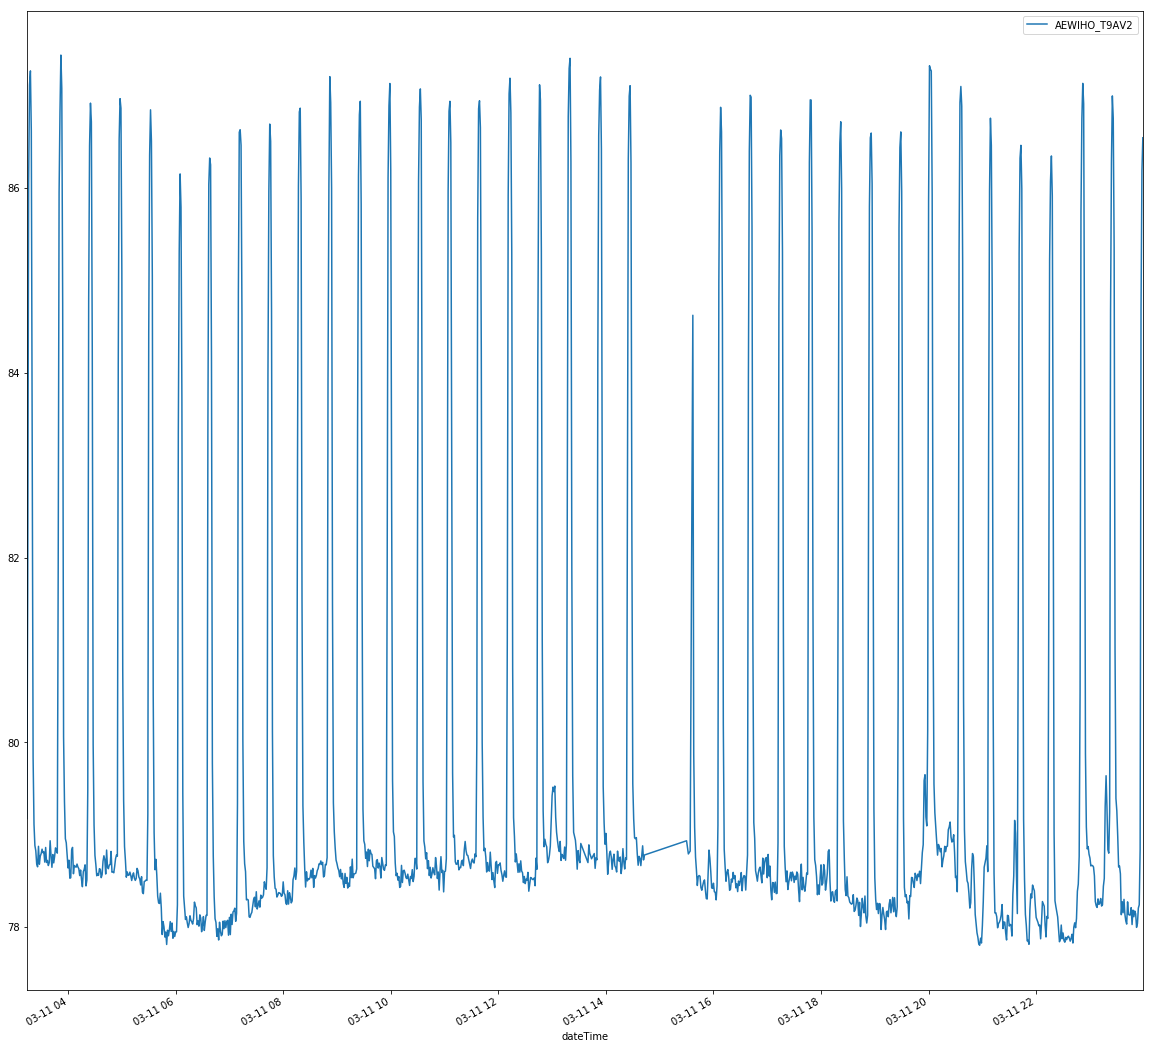

In [126]:
new_dataframe.iloc[0:].plot(y = new_dataframe.columns[-1], use_index=True)
plt.rcParams['figure.figsize'] =(20,20)

DatetimeIndex(['2019-03-11 06:00:00', '2019-03-11 06:01:00',
               '2019-03-11 06:02:00', '2019-03-11 06:03:00',
               '2019-03-11 06:04:00', '2019-03-11 06:05:00',
               '2019-03-11 06:06:00', '2019-03-11 06:07:00',
               '2019-03-11 06:08:00', '2019-03-11 06:09:00',
               '2019-03-11 06:10:00'],
              dtype='datetime64[ns]', freq='T')


(array([737129.25      , 737129.25069444, 737129.25138889, 737129.25208333,
        737129.25277778, 737129.25347222, 737129.25416667, 737129.25486111,
        737129.25555556, 737129.25625   , 737129.25694444]),
 <a list of 11 Text xticklabel objects>)

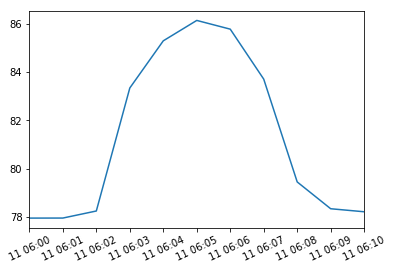

In [61]:
dateRange = pd.date_range(new_dataframe.index[0],new_dataframe.index[10], freq='1min')
print(dateRange)
plt.plot(dateRange,new_dataframe.iloc[0:11,-1])
plt.xlim(dateRange[0],dateRange[-1])
plt.xticks(rotation=25)

In [57]:
dateRange[-1]

Timestamp('2019-03-11 06:10:00', freq='T')

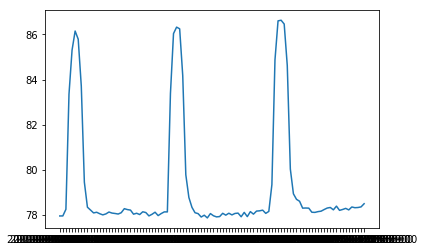

In [51]:
# start_1 = 700
# end_1 = start_1+300
# new_dataframe.iloc[start_1:end_1].plot(x = new_dataframe.index.format(), y=new_dataframe.columns[-1])
plt.plot(new_dataframe.iloc[0:100].index.format(), new_dataframe.iloc[0:100,-1])
plt.show()

In [52]:
print(max(new_dataframe.iloc[start_1:end_1][new_dataframe.columns[-1]]))

print(len(new_dataframe))

NameError: name 'start_1' is not defined

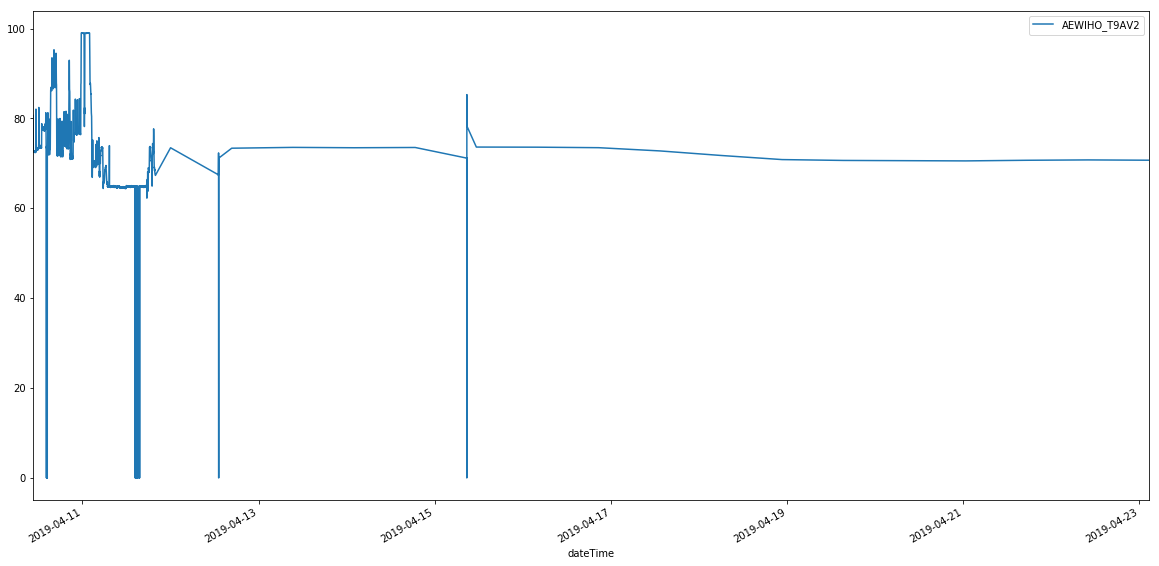

In [42]:
test_new.iloc[0:2000].plot(y=new_dataframe.columns[-1])

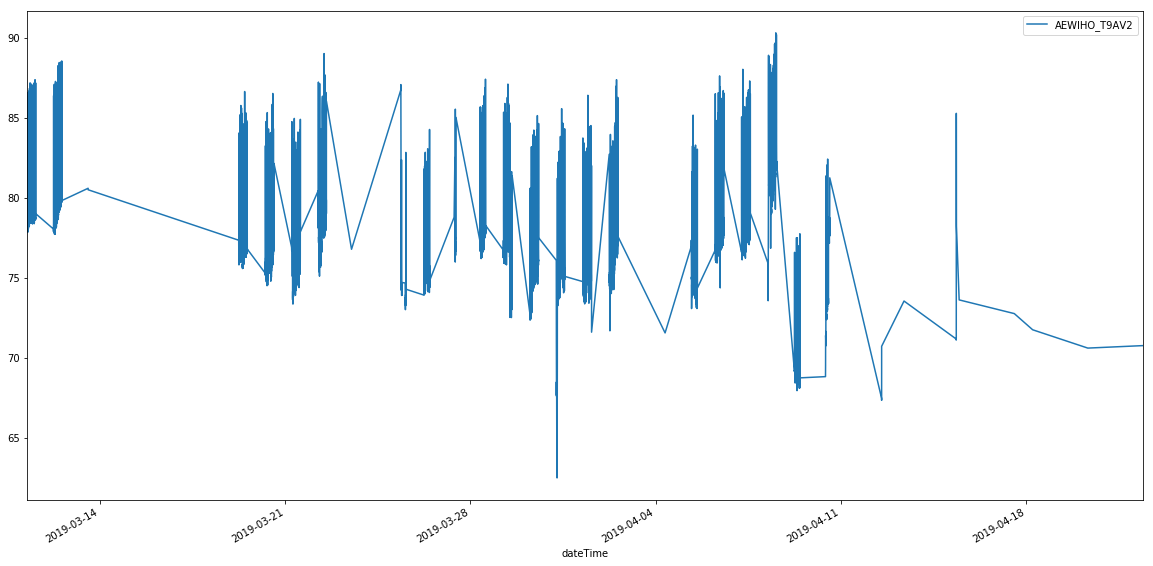

In [125]:
new_dataframe.plot(y=new_dataframe.columns[-1])

In [83]:
dataset = np.array(multivariate_data_drop_dummy)

In [88]:
def make_dataset(dataset):
    NumberOfElements=int(len(dataset)*0.95)
    print('Number of Elements for training: ',NumberOfElements)
    print('dataset length: ',len(dataset))

    train_input=dataset[0:NumberOfElements,0:-1]
    print('train_input shape: ',train_input.shape)
    train_output=dataset[0:NumberOfElements,-1]
    print('train_output shape: ',train_output.shape)

    test_input=dataset[NumberOfElements:len(dataset),0:-1]
    print('test_input shape: ',test_input.shape)
    test_output=dataset[NumberOfElements:len(dataset),-1]
    print('test_output shape: ',test_output.shape)
    
    return train_input, train_output, test_input, test_output

train_input, train_output, test_input, test_output = make_dataset(dataset)

Number of Elements for training:  23750
dataset length:  25000
train_input shape:  (23750, 4217)
train_output shape:  (23750,)
test_input shape:  (1250, 4217)
test_output shape:  (1250,)


In [89]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [90]:
train_model=LinearRegression(fit_intercept = True,normalize=False).fit(train_input,train_output)
print(train_model)

predicted_output=train_model.predict(test_input)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [91]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

In [92]:
print('Slope:' ,train_model.coef_)
print('Intercept:', train_model.intercept_)
print('r_2 statistic: %.2f' % r2_score(test_output,predicted_output))
print("Mean_absolute_error: %.2f" % mean_absolute_error(test_output,predicted_output))
print("Mean squared error: %.2f" % mean_squared_error(test_output,predicted_output))
RMSE=math.sqrt(mean_squared_error(test_output,predicted_output))
print('RMSE: ',RMSE)

Slope: [-1.54153301e-04  1.53520858e-04  3.30064895e-04 ...  8.47328899e-01
 -4.41166698e-01  6.74111258e-03]
Intercept: -3637509617.5842667
r_2 statistic: -5655784885564321.00
Mean_absolute_error: 795846096.18
Mean squared error: 1137626307040810496.00
RMSE:  1066595662.3954602


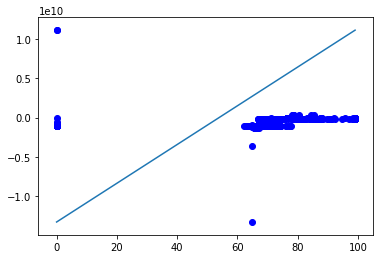

In [93]:
plt.plot((min(test_output),max(test_output)), (min(predicted_output),max(predicted_output)))
plt.scatter(test_output,predicted_output, color = 'blue')

In [94]:
correlation = multivariate_data_drop_dummy.corr()

In [97]:
correlation.shape

(4218, 4218)

In [98]:
correlation

AEAGHOAWE2T1  AEAGHOAWE2A0  AEAGHOAWE2T0  AEAGHOAWE1A0  \
AEAGHOAWE2T1      1.000000     -0.303830      0.489314     -0.523163   
AEAGHOAWE2A0     -0.303830      1.000000     -0.297908      0.700643   
AEAGHOAWE2T0      0.489314     -0.297908      1.000000     -0.346358   
AEAGHOAWE1A0     -0.523163      0.700643     -0.346358      1.000000   
AEAGHOAWE1T1     -0.033536     -0.274987      0.140335     -0.111472   
AEAGHOAWE1T0      0.022996     -0.381483      0.198709     -0.366092   
AEAGHOAWE3T0      0.072521     -0.211495      0.328605     -0.211698   
AEAGHOAWE3A0     -0.215851      0.541166     -0.251264      0.411375   
AEAGHOAWE3T1     -0.105673     -0.217601      0.138760     -0.123282   
AEAGHOAWE_A2      0.411040     -0.456640      0.289497     -0.473962   
AEAGHOAWE_A1     -0.341338      0.690769     -0.317732      0.671735   
AEAGHOAWE_A0      0.013434     -0.066701      0.048215     -0.060147   
AEAGHOAWE_T3      0.060492     -0.120711      0.421358     -0.073138   
AEAGTHHPF2T0     -0.130405      0.265625     -0.256854      0.282872   
AEAGHOA_S2G0     -0.054521     -0.014410     -0.203423     -0.010814   
AEAGHOAWE_T2      0.260722     -0.142379      0.274394     -0.094659   
AEAGHOAWE_T1      0.400704     -0.452962      0.446142     -0.475834   
AEAGHOB_GHA0     -0.021325      0.014813     -0.000770      0.003302   
AEAGHOB_GHT0      0.162519     -0.098147      0.117771     -0.135802   
AEAGHOBWE2T0      0.337707     -0.148718      0.234666     -0.212705   
AEAGHOBWE2A0     -0.097910     -0.014998      0.008341      0.053638   
AEAGHOBWE2T2      0.252662     -0.038066      0.186860     -0.070845   
AEAGHOBWE1T0      0.121872     -0.038444      0.092830     -0.062144   
AEAGHOBWE1T2      0.314531     -0.100379      0.228935     -0.139503   
AEAGHOBWE1A0     -0.009361     -0.022468      0.043050      0.018750   
AEAGHOBWE3T0      0.067494     -0.051268      0.035023     -0.051174   
AEAGHOBWE3T2     -0.029324      0.009154     -0.074079     -0.020408   
AEAGHOBWE3A0     -0.009843      0.026056      0.034138      0.057686   
AEAGHOBWE_T1      0.138108     -0.012744      0.079227     -0.057163   
AEAGHOBWE_T2      0.156447     -0.034061      0.043201     -0.060543   
...                    ...           ...           ...           ...   
AEWIHOC___T0     -0.091664     -0.001695      0.293513      0.019867   
AEWIHOCWF_A1      0.009667      0.000577      0.153119      0.026153   
AEWIHOAWF_V0           NaN           NaN           NaN           NaN   
AEWIHOAKVSV0      0.345522     -0.442818      0.188870     -0.489319   
RWWIHOAWF_A0      0.095537     -0.137859      0.076397     -0.186783   
RWWIHOBWF_A0      0.138981     -0.127262      0.073116     -0.170341   
RWWIHOC___V1      0.017604     -0.041629      0.406779     -0.001948   
RWWIHOAT8_V0      0.007027     -0.010586      0.024028     -0.002361   
RWWIHOBT8_V0           NaN           NaN           NaN           NaN   
RWWIHOAT9_V0           NaN           NaN           NaN           NaN   
RWWIHOBT9_V0      0.162184     -0.037621     -0.073885     -0.058925   
RWWIHOAT10V0      0.335786     -0.434876      0.196357     -0.474496   
RWWIHOBT10V0     -0.205422      0.352578     -0.283407      0.392131   
RWWIHOUEABV0     -0.232268      0.066154      0.084631      0.087320   
RWWIHOUT8_V0      0.006749     -0.009744      0.022391     -0.002159   
RWWIHOUT8_V1           NaN           NaN           NaN           NaN   
RWWIHOUT9_V0           NaN           NaN           NaN           NaN   
RWWIHOUT9_V1     -0.138659      0.035090      0.084000      0.036289   
RWWIHOUT10V0     -0.225935      0.098738      0.090436      0.116692   
RWWIHOUT10V1           NaN           NaN           NaN           NaN   
RWWIHOT7_RV0      0.236960     -0.063215     -0.121065     -0.086232   
RWWIHOT8_RV0     -0.032537      0.016018     -0.023340      0.027351   
RWWIHOT9_RV0     -0.095749      0.004235      0.110244      0.050947   
RWWIHOT10RV0      0.225867     -0.421228      0.323236

In [101]:
correlation_reset = correlation.reset_index()

In [126]:
correlation_reset

index  AEAGHOAWE2T1  AEAGHOAWE2A0  AEAGHOAWE2T0  AEAGHOAWE1A0  \
0     AEAGHOAWE2T1      1.000000     -0.303830      0.489314     -0.523163   
1     AEAGHOAWE2A0     -0.303830      1.000000     -0.297908      0.700643   
2     AEAGHOAWE2T0      0.489314     -0.297908      1.000000     -0.346358   
3     AEAGHOAWE1A0     -0.523163      0.700643     -0.346358      1.000000   
4     AEAGHOAWE1T1     -0.033536     -0.274987      0.140335     -0.111472   
5     AEAGHOAWE1T0      0.022996     -0.381483      0.198709     -0.366092   
6     AEAGHOAWE3T0      0.072521     -0.211495      0.328605     -0.211698   
7     AEAGHOAWE3A0     -0.215851      0.541166     -0.251264      0.411375   
8     AEAGHOAWE3T1     -0.105673     -0.217601      0.138760     -0.123282   
9     AEAGHOAWE_A2      0.411040     -0.456640      0.289497     -0.473962   
10    AEAGHOAWE_A1     -0.341338      0.690769     -0.317732      0.671735   
11    AEAGHOAWE_A0      0.013434     -0.066701      0.048215     -0.060147   
12    AEAGHOAWE_T3      0.060492     -0.120711      0.421358     -0.073138   
13    AEAGTHHPF2T0     -0.130405      0.265625     -0.256854      0.282872   
14    AEAGHOA_S2G0     -0.054521     -0.014410     -0.203423     -0.010814   
15    AEAGHOAWE_T2      0.260722     -0.142379      0.274394     -0.094659   
16    AEAGHOAWE_T1      0.400704     -0.452962      0.446142     -0.475834   
17    AEAGHOB_GHA0     -0.021325      0.014813     -0.000770      0.003302   
18    AEAGHOB_GHT0      0.162519     -0.098147      0.117771     -0.135802   
19    AEAGHOBWE2T0      0.337707     -0.148718      0.234666     -0.212705   
20    AEAGHOBWE2A0     -0.097910     -0.014998      0.008341      0.053638   
21    AEAGHOBWE2T2      0.252662     -0.038066      0.186860     -0.070845   
22    AEAGHOBWE1T0      0.121872     -0.038444      0.092830     -0.062144   
23    AEAGHOBWE1T2      0.314531     -0.100379      0.228935     -0.139503   
24    AEAGHOBWE1A0     -0.009361     -0.022468      0.043050      0.018750   
25    AEAGHOBWE3T0      0.067494     -0.051268      0.035023     -0.051174   
26    AEAGHOBWE3T2     -0.029324      0.009154     -0.074079     -0.020408   
27    AEAGHOBWE3A0     -0.009843      0.026056      0.034138      0.057686   
28    AEAGHOBWE_T1      0.138108     -0.012744      0.079227     -0.057163   
29    AEAGHOBWE_T2      0.156447     -0.034061      0.043201     -0.060543   
...            ...           ...           ...           ...           ...   
4188  AEWIHOC___T0     -0.091664     -0.001695      0.293513      0.019867   
4189  AEWIHOCWF_A1      0.009667      0.000577      0.153119      0.026153   
4190  AEWIHOAWF_V0           NaN           NaN           NaN           NaN   
4191  AEWIHOAKVSV0      0.345522     -0.442818      0.188870     -0.489319   
4192  RWWIHOAWF_A0      0.095537     -0.137859      0.076397     -0.186783   
4193  RWWIHOBWF_A0      0.138981     -0.127262      0.073116     -0.170341   
4194  RWWIHOC___V1      0.017604     -0.041629      0.406779     -0.001948   
4195  RWWIHOAT8_V0      0.007027     -0.010586      0.024028     -0.002361   
4196  RWWIHOBT8_V0           NaN           NaN           NaN           NaN   
4197  RWWIHOAT9_V0           NaN           NaN           NaN           NaN   
4198  RWWIHOBT9_V0      0.162184     -0.037621     -0.073885     -0.058925   
4199  RWWIHOAT10V0      0.335786     -0.434876      0.196357     -0.474496   
4200  RWWIHOBT10V0     -0.205422      0.352578     -0.283407      0.392131   
4201  RWWIHOUEABV0     -0.232268      0.066154      0.084631      0.087320   
4202  RWWIHOUT8_V0      0.006749     -0.009744      0.022391     -0.002159   
4203  RWWIHOUT8_V1           NaN           NaN           NaN           NaN   
4204  RWWIHOUT9_V0           NaN           NaN           NaN           NaN   
4205  RWWIHOUT9_V1     -0.138659      0.035090      0.084000      0.036289   
4206  RWWIHOUT10V0     -0.225935      0.098738      0.090436      0.116692   
4207  RWWIHOUT10V1           NaN   

In [130]:
high_correlated_array_with_target = []
for index_corr_reset, val_corr_reset in enumerate(correlation_reset['AEWIHO_T9AV2']):
    if val_corr_reset>0.7:
        required_column = correlation_reset.loc[index_corr_reset]['index']
        high_correlated_array_with_target = np.append(high_correlated_array_with_target,required_column)

In [131]:
high_correlated_array_with_target

array(['AEWIGHG9_AG1', 'AEWIGHG9_AG2', 'AEWIGHG9_AG3', 'AEWIGHG9__T0',
       'AEWIHO_T9AV2'], dtype='<U32')

In [136]:
# making new dataframe using the column which came from the high correlated array

print(type(high_correlated_array_with_target))
print(high_correlated_array_with_target.shape)

new_frame = multivariate_data_drop_dummy.iloc[0:10][high_correlated_array_with_target]

<class 'numpy.ndarray'>
(5,)


In [138]:
new_frame.head()

AEWIGHG9_AG1  AEWIGHG9_AG2  AEWIGHG9_AG3  AEWIGHG9__T0  \
dateTime                                                                      
2019-03-11 03:14:00     97.229202     97.224403     96.777397     92.719615   
2019-03-11 03:15:00     97.566803     97.566803     97.113998     92.530794   
2019-03-11 03:16:00     97.566803     97.571602     97.108704     92.426648   
2019-03-11 03:17:00     97.566803     97.582703     97.112000     92.579243   
2019-03-11 03:18:00     97.563904     97.555199     97.114899     92.628148   

                     AEWIHO_T9AV2  
dateTime                           
2019-03-11 03:14:00     79.178306  
2019-03-11 03:15:00     81.659117  
2019-03-11 03:16:00     86.055430  
2019-03-11 03:17:00     87.113691  
2019-03-11 03:18:00     87.266264